In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython.display as display


### 
Campaign_1

1. 자녀가 없는 비율이 많음 (배우자 여부는 비슷)
2. 소득이 많은 편
3. Catalog 구입이 상대적으로 많은 편
4. Store 구입이 상대적으로 많은 편
5. 웹사이트 방문 횟수는 상대적으로 적은 편
6. 웹사이트 구매 횟수는 많은 편
7. 육류, 와인, 과일, 생선, 당류, 골드 소비량은 많은 편
8. Reponse 비율 50%, Cmp1 50%, Cmp3 30% 나머지도 ### 조금 더 있음


Campaign_2

1. Kid 비율은 적은편, 그러나 십대 자녀 비율은 비슷
2. 소득은 상대적으로 많음
3. CatalogPurchase, StorePurchase가 조금 더 많음
4. 고기 소비량은 비슷
5. 와인 소비량은 훨씬 많음
6. 나머지는 소비량 비슷
7. Cmp2 50%, Response 70%, ### Cmp2 75%
, Cmp2 60%

Campaign_3
눈에 띄는 차이가 ### 없음
Reponse 50%, 나머진 비슷


Campaign_4
1. Kid 자녀가 더 적은 편
2. 소득이 상대적으로 더 많음
3. CatalogPurchase, StorePurchase가 조금 더 많음
4. 와인 소비량 많음
5. 나머지 소비량은 비슷
6. Cmp3 ### 0%, Response 40%, 나머지도 대략 30~40%


Campaign_5
1. 자녀 비율이 적음
2. 소득이 더 많은 편
3. Catalogpurchase, Storepurchase 많음
4. 웹사이트 구매횟수는 더 많음
5. 웹사이트 방문횟수는 더 적음
6. 전체적인 소비량###  더 많음
7. Response 55%, 나머지는 10~40% 가량 더 많음

Response
1. 자녀 비율이 조금 더 적고
2. 싱글 비율이 조금 더 있고
3. PHD비율이 조금 더 있고
4. 소득이 조금 더 많은 편 
5. Catalog Purchase, Store Purchase 조금더 만ㅁㅎ고 
6. 방문횟수는 비슷하나 webpurchase가 더 많음
7. 육류,


### 종합
1. 일반적으론 자녀비율이 적고
2. 소득이 조금 더 많고
3. Catalog Purchase, Store Purchase, Webpurchase가 더 많으며
4. 웹페이지 방문횟수는 적고
5. 소비량 역시 대체적으로 많고 (특히 와인)
6. 다른 Campaign에도 반응할 확률이 더 큼
7. Education은 Basic이 거의 없음. 나머지는 거의 비슷한 편


## 고객 Segmentation
1. 종합반응을 통해, campaign에 반응할 확률이 높은 고객군과 그렇지 않은 군으로 나눠보기 (Campaign 변수 사용 X)


### Response 예측 시 전략
1. Recency, Complain, Education, Age 제외
2. Education이 Basic일 경우 Response 0으로 유도
3. Income이 8만 이상일 시 Response로 유도
4. 육류, 와인 소비량이 상위에 속하면 Response로 유도
5. 다른 캠페인에 offer를 받았다면 Reponse로 유도
6. 고객 segmentation 이용?
 와인 소비량은 더 많으나 나머진 크게 차이 안남
8. Campaign 2 제외하고 더 많은 비율

In [18]:
df1 = pd.read_csv('/kaggle/input/arketing-campaign/marketing_campaign.csv', sep = ';')
df1['Age'] = 2014 - df1['Year_Birth']
df2 = df1.drop(columns = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_Revenue', 'Z_CostContact'])
df2['Marital_Status'] = df2['Marital_Status'].replace({'Divorced' : 'Single', 'Widow' : 'Single',\
                                                      'Alone' : 'Single', 'Together' : 'Couple', 
                                                    'Married':'Couple'})
df2 = df2[(df2['Marital_Status'] != 'Absurd') & (df2['Marital_Status'] != 'YOLO')]
df2['Education'] = df2['Education'].replace({'2n Cycle' : 'Master'})
df2 = df2[df2['Income'] < 180000]

In [96]:
df2.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [97]:
for col in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
    print('{} : {}'.format(col, df2[col].agg(['min', 'max']) ))

NumWebPurchases : min     0
max    27
Name: NumWebPurchases, dtype: int64
NumCatalogPurchases : min     0
max    28
Name: NumCatalogPurchases, dtype: int64
NumStorePurchases : min     0
max    13
Name: NumStorePurchases, dtype: int64
NumWebVisitsMonth : min     0
max    20
Name: NumWebVisitsMonth, dtype: int64


In [132]:
def categorical_plot(df, group_col, category_col, fontsize, axes):
    
    proportions = (
        df.groupby([group_col, category_col]).size()
        .groupby(level = 0)
        .apply(lambda x: x / x.sum())
        .unstack(fill_value = 0)
    )
    
    proportions.plot(
        kind = 'bar',
        stacked = True,
        ax = axes,
        cmap = 'tab20',
        alpha = 0.85
    )
    
    axes.set_xticks([0, 1])
    axes.set_xticklabels(['Not Accept', 'Accept'], rotation = 0, fontsize = fontsize)
    axes.set_title(f'{category_col} Proportions by {group_col}', fontsize = fontsize)
    axes.set_xlabel(group_col, fontsize = fontsize)
    axes.set_ylabel('Proportion (%)', fontsize = fontsize)
    axes.legend(title = category_col, loc = 'upper right')
    axes.set_ylim(0, 1)
    axes.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))



def bins_stacked_bar(df, group_col, category_col, bin_size, fontsize, axes):
    min_val, max_val = df[category_col].min(), df[category_col].max()

    bins = np.linspace(min_val, max_val, bin_size)
    labels = [ f'{int(bins[i])} ~ {int(bins[i+1])}' for i in range(len(bins) - 1)]
    df['bins'] = pd.cut(df[category_col], bins = bins, labels = labels, include_lowest = True, right = False  )    


    proportions = (
        df.groupby([group_col, 'bins'], observed = True).size()
        .groupby(level = 0)
        .apply(lambda x: x / x.sum())
        .unstack(fill_value = 0)
    )
    
    proportions.plot(
        kind = 'bar',
        stacked = True,
        ax = axes,
        cmap = 'tab20',
        alpha = 0.85
    )
    
    axes.set_xticks([0, 1])
    axes.set_xticklabels(['Not Accept', 'Accept'], rotation = 0, fontsize = fontsize)
    axes.set_title(f'{category_col} Proportions by {group_col}', fontsize = fontsize)
    axes.set_xlabel(group_col, fontsize = fontsize)
    axes.set_ylabel('Proportion (%)', fontsize = fontsize)
    axes.legend(title = category_col, loc = 'upper right', bbox_to_anchor = [1.2, 1])
    axes.set_ylim(0, 1)
    axes.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))

def compare_groups_1(df, group_col, col1, col2, col3, col4, col5, col6, fontsize ):

    fig, axes = plt.subplots(3, 2, figsize = (14,21))

    categorical_plot(df, group_col, col1, fontsize, axes[0, 0])
    categorical_plot(df, group_col, col2, fontsize, axes[0, 1])
    categorical_plot(df, group_col, col3, fontsize, axes[1, 0])
    categorical_plot(df, group_col, col4, fontsize, axes[1, 1])
    categorical_plot(df, group_col, col5, fontsize, axes[2, 0])
    bins_stacked_bar(df, group_col, col6, 9, fontsize, axes[2,1])

    plt.tight_layout()
    plt.show()

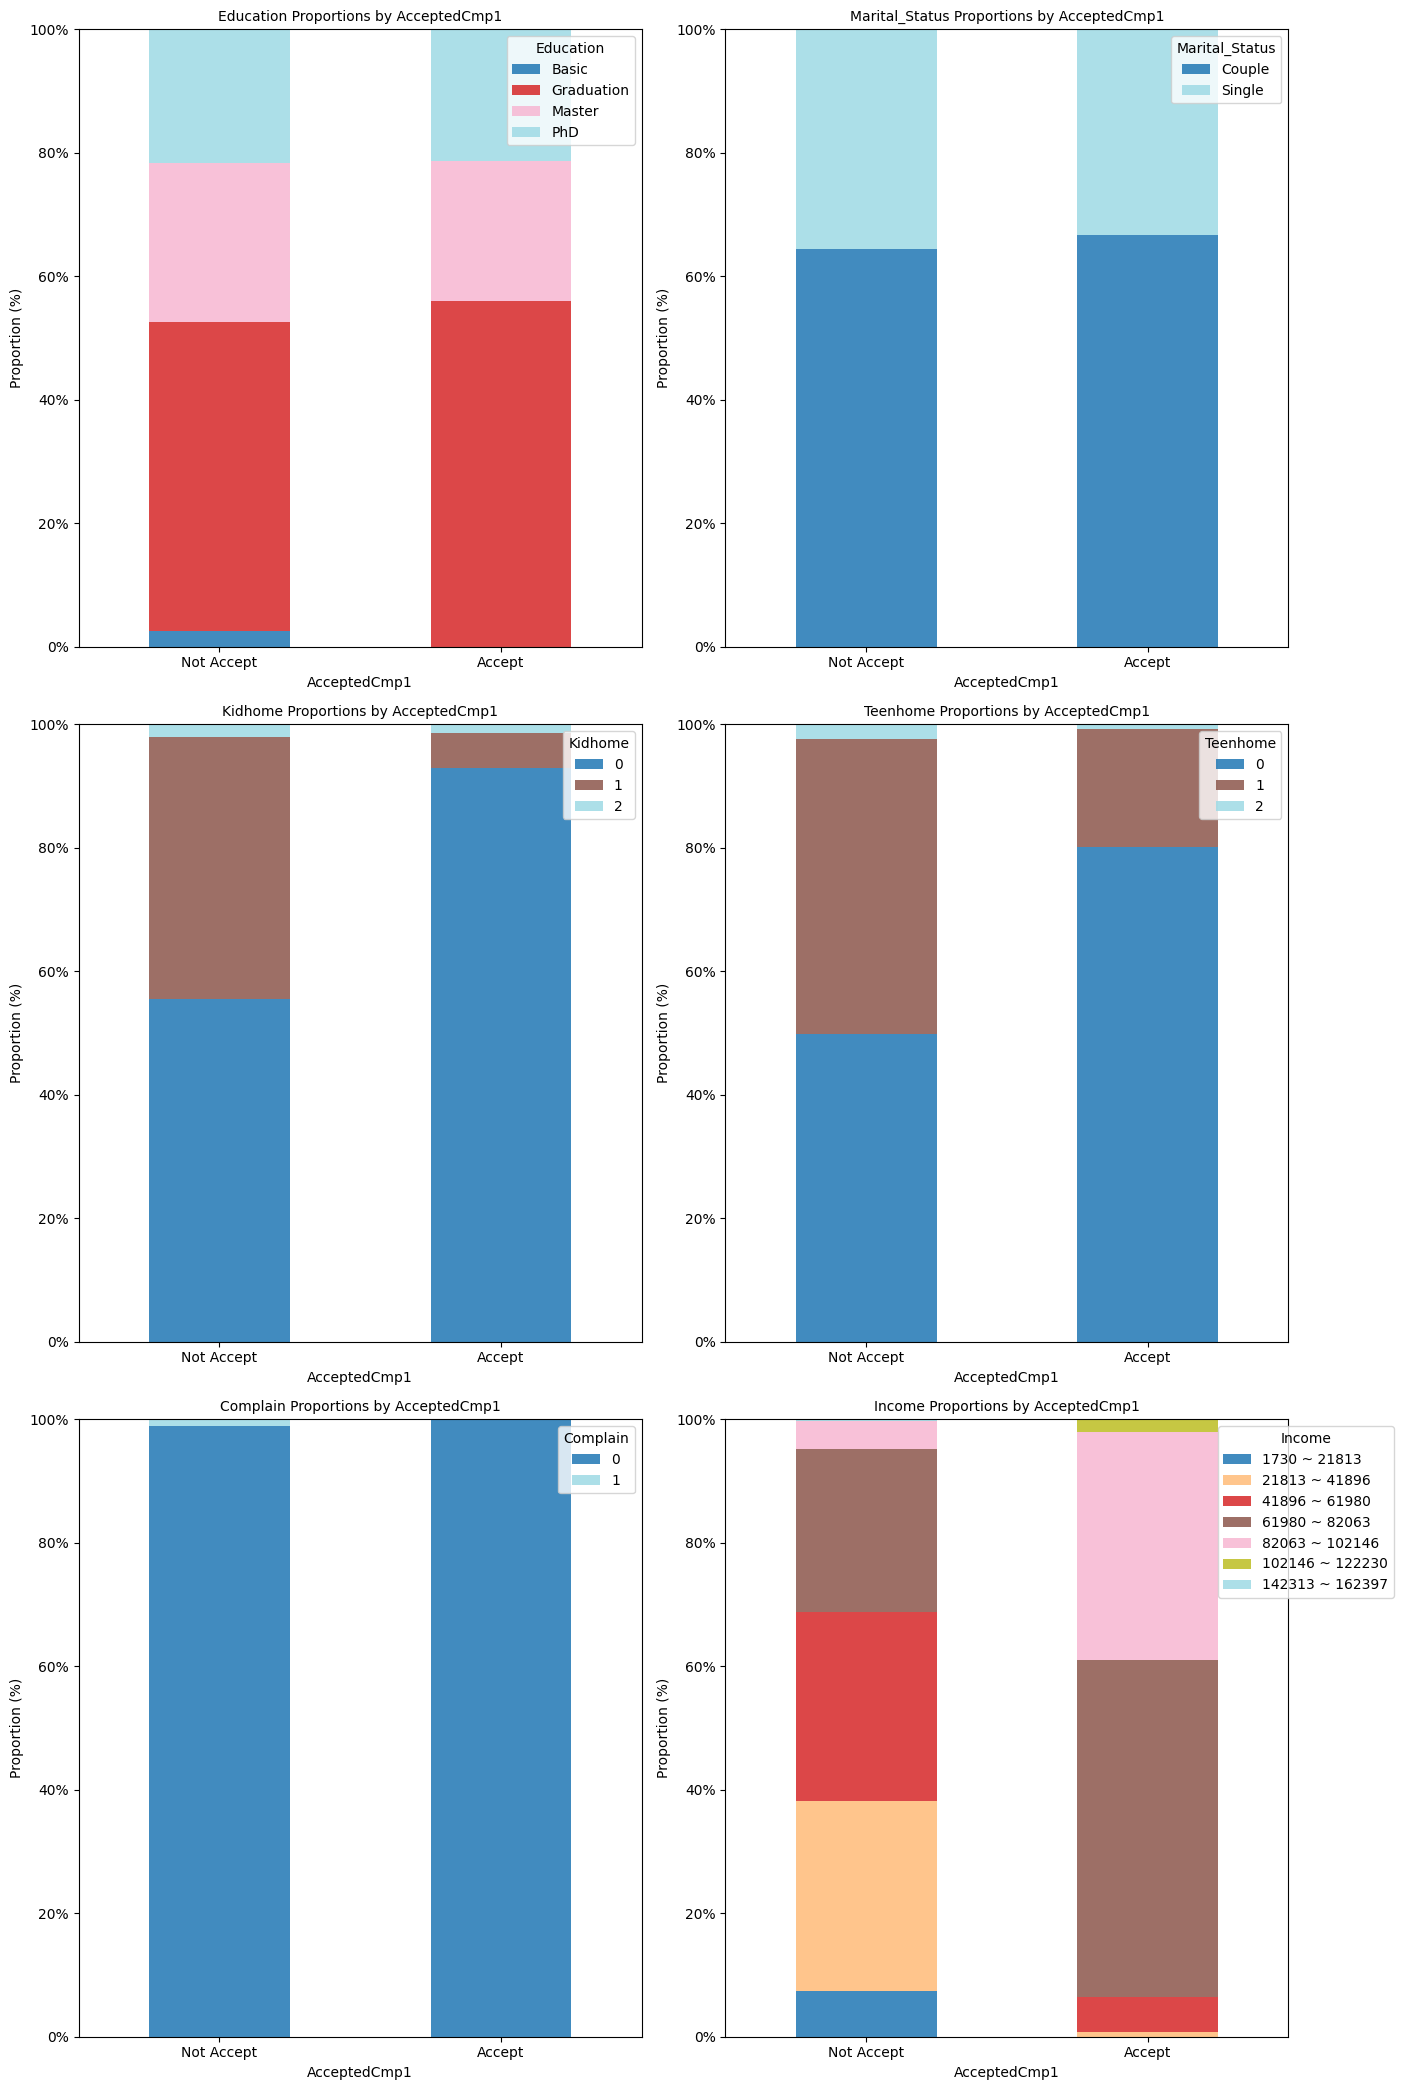

In [133]:
compare_groups_1(df2, 'AcceptedCmp1', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',\
               'Complain', 'Income', 10)


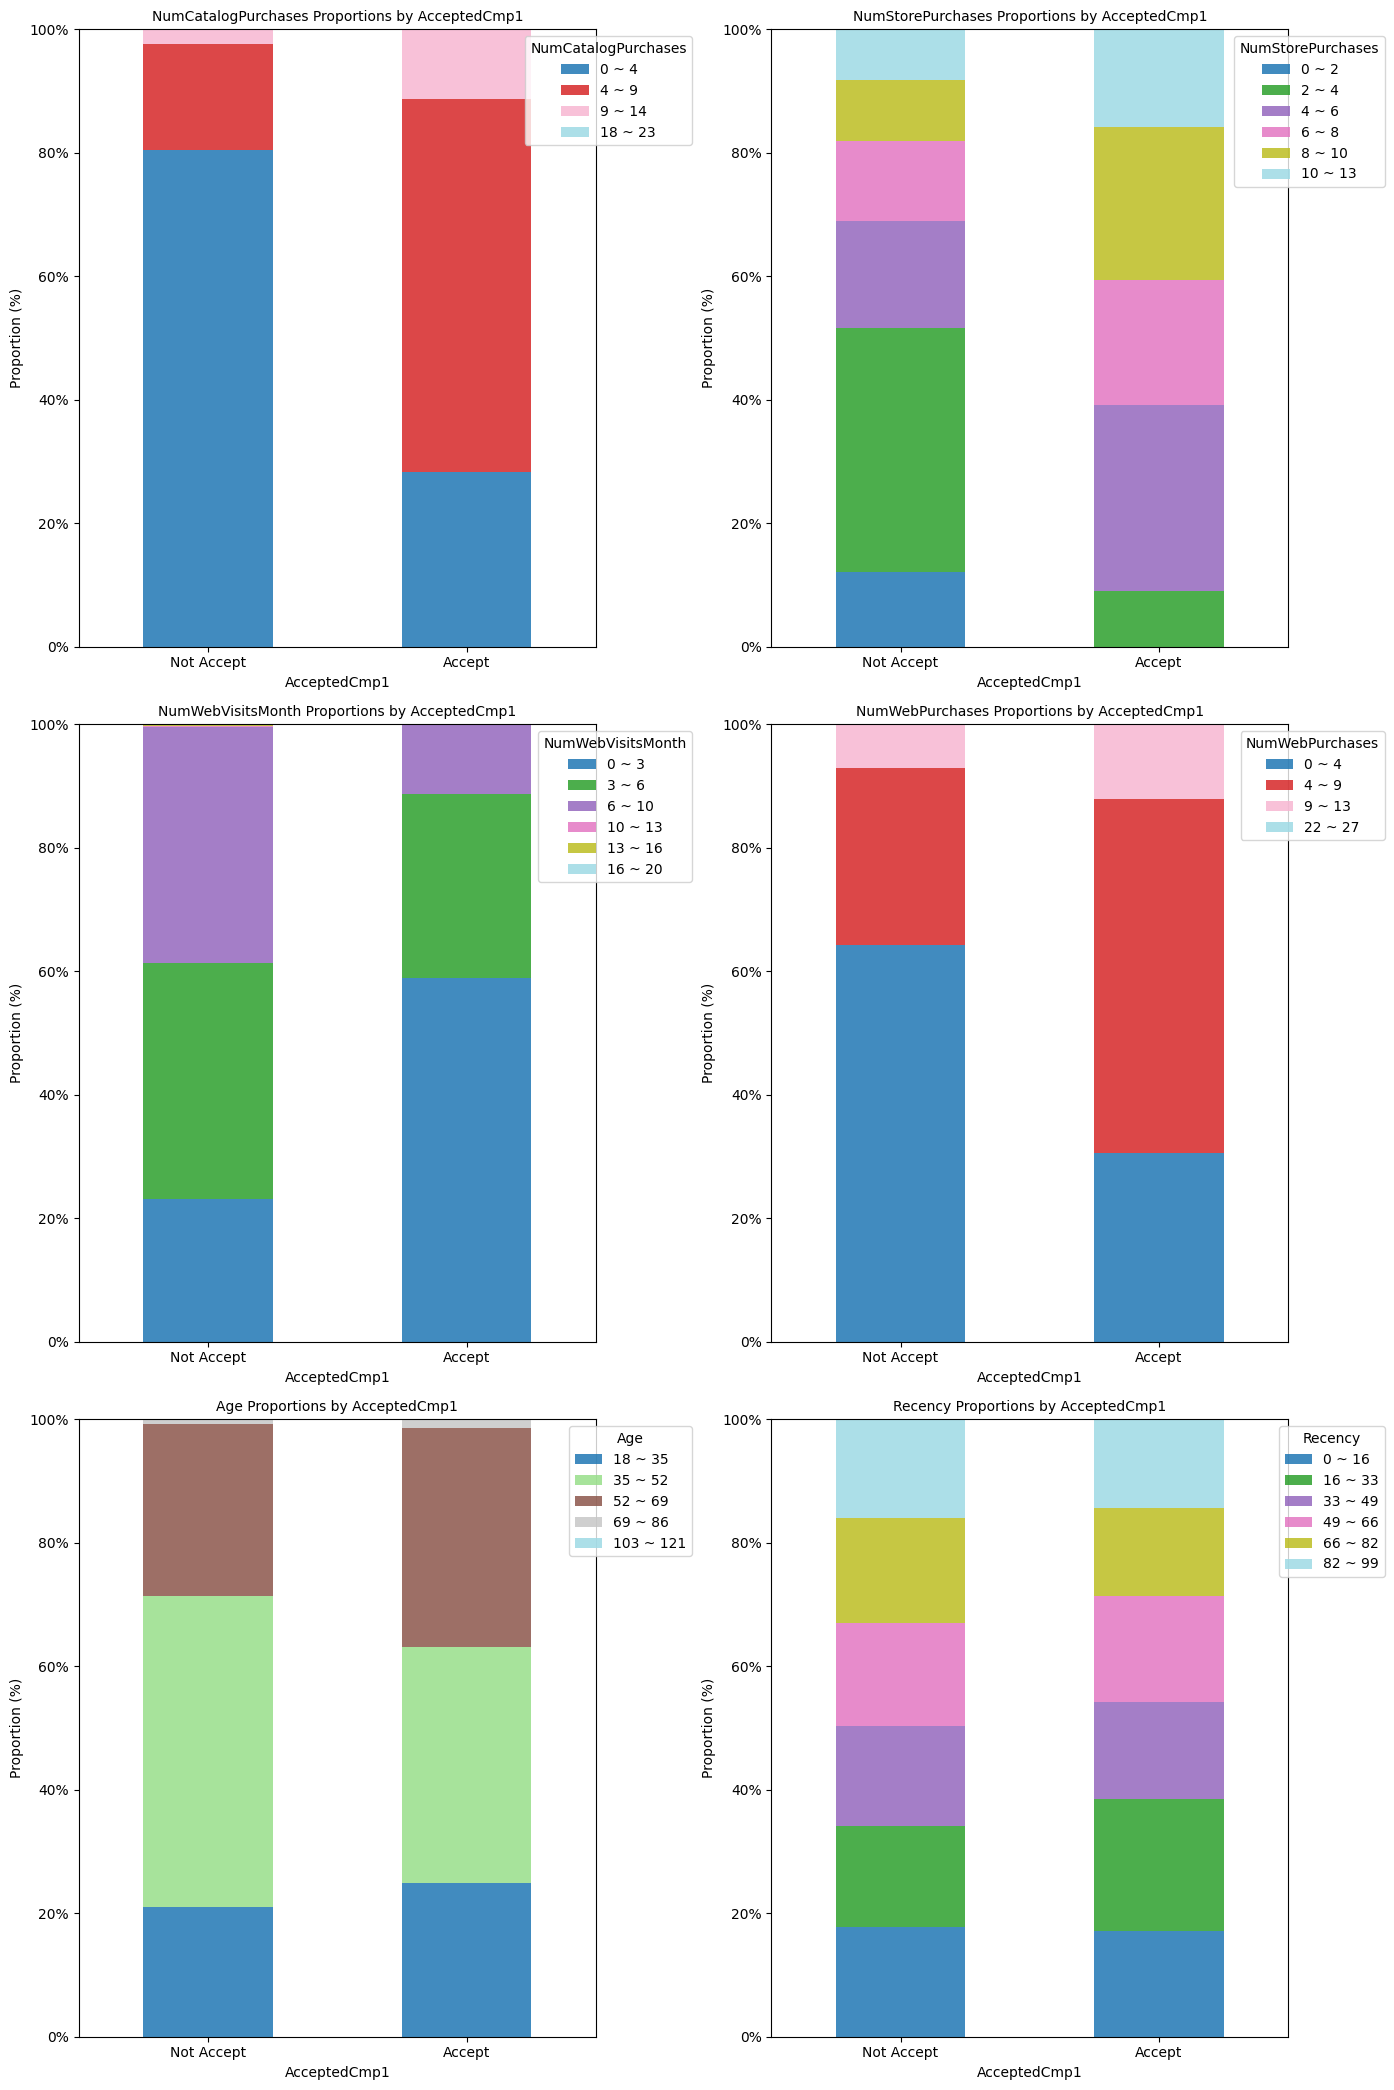

In [131]:
def compare_groups_2(df, group_col, col1, col2, col3, col4, col5, col6, fontsize ):

    fig, axes = plt.subplots(3, 2, figsize = (14,21))

    bins_stacked_bar(df, group_col, col1, 7, fontsize, axes[0,0])
    bins_stacked_bar(df, group_col, col2, 7, fontsize, axes[0,1])
    bins_stacked_bar(df, group_col, col3, 7, fontsize, axes[1,0])
    bins_stacked_bar(df, group_col, col4, 7, fontsize, axes[1,1])
    bins_stacked_bar(df, group_col, col5, 7, fontsize, axes[2,0])
    bins_stacked_bar(df, group_col, col6, 7, fontsize, axes[2,1])

    plt.tight_layout()
    plt.show()

compare_groups_2(df2, 'AcceptedCmp1', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
               'NumWebPurchases', 'Age', 'Recency', 10)

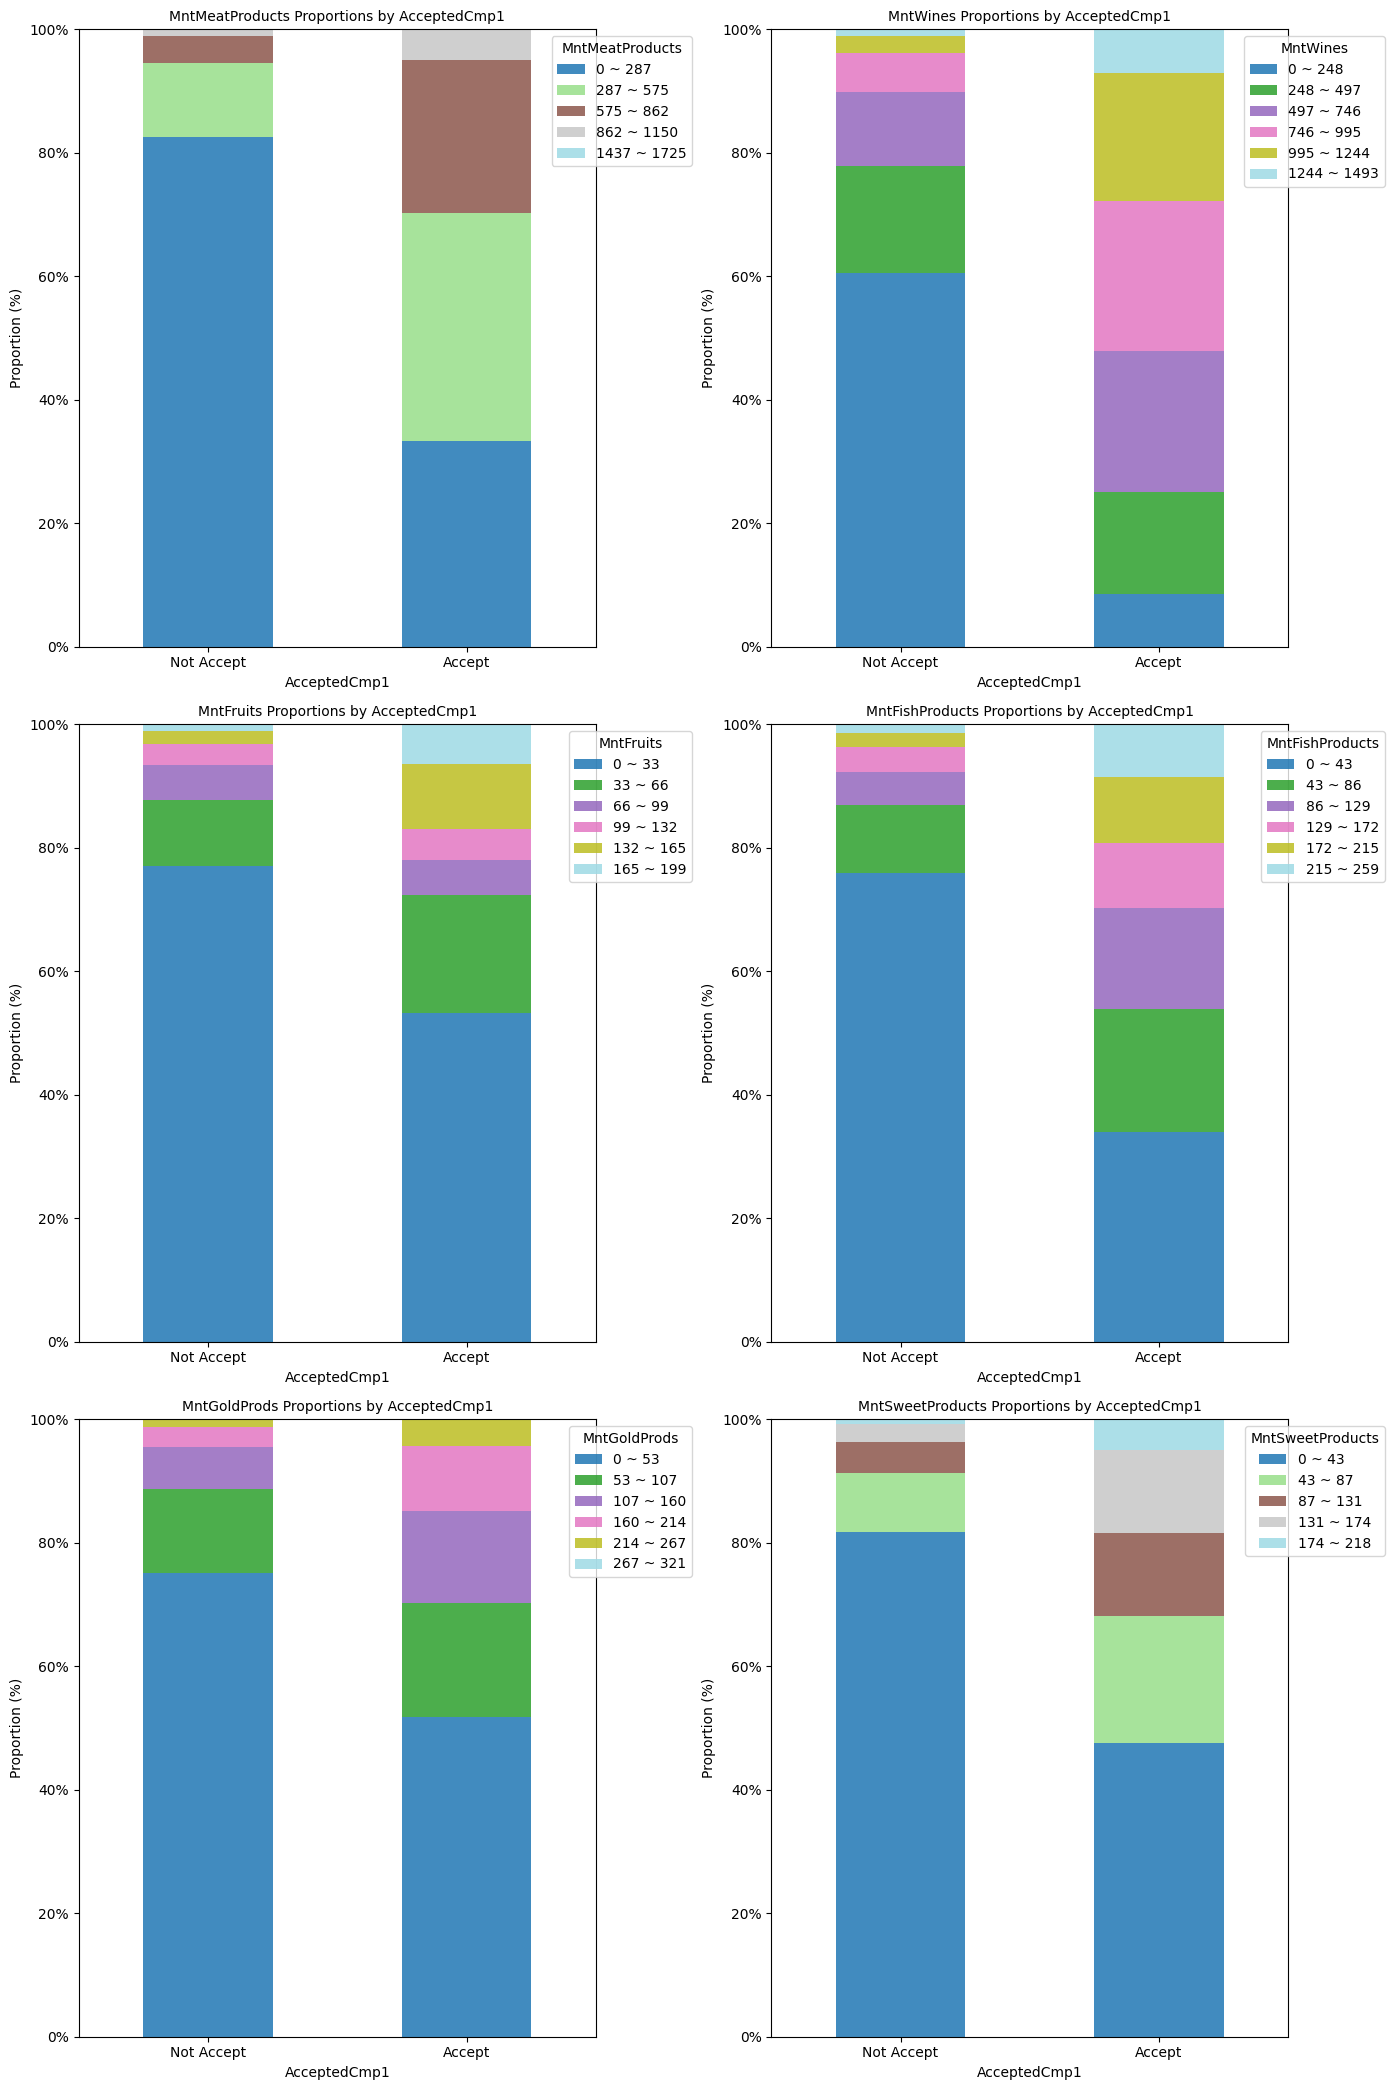

In [134]:
compare_groups_2(df2, 'AcceptedCmp1', 'MntMeatProducts', 'MntWines', 'MntFruits',\
                 'MntFishProducts', 'MntGoldProds' , 'MntSweetProducts', 10)

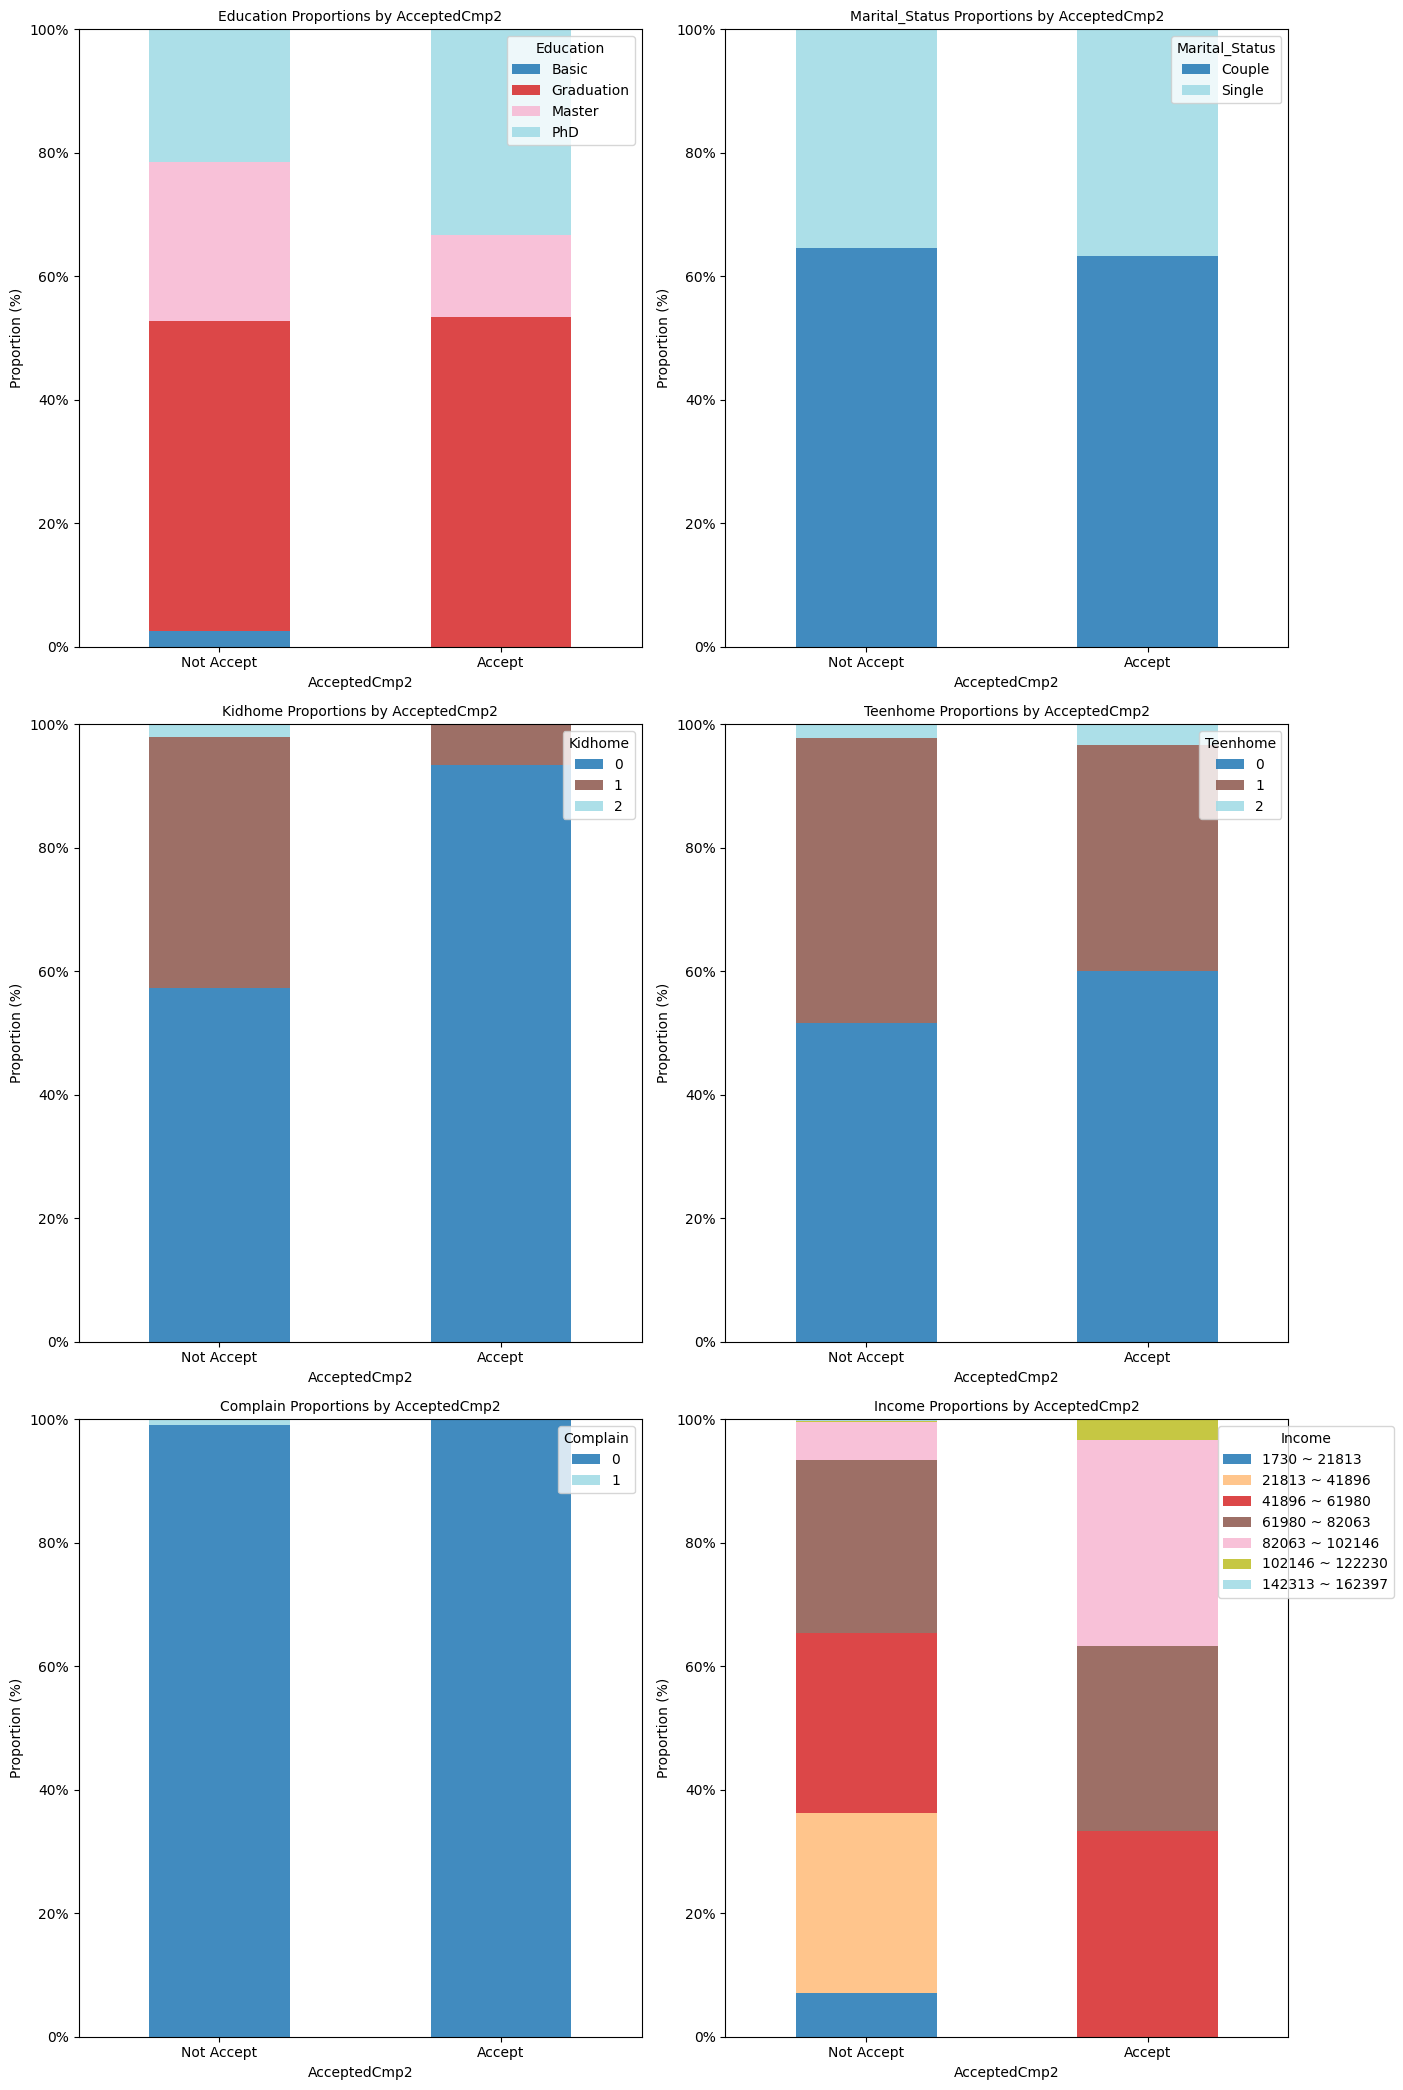

In [135]:
compare_groups_1(df2, 'AcceptedCmp2', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',\
               'Complain', 'Income', 10)


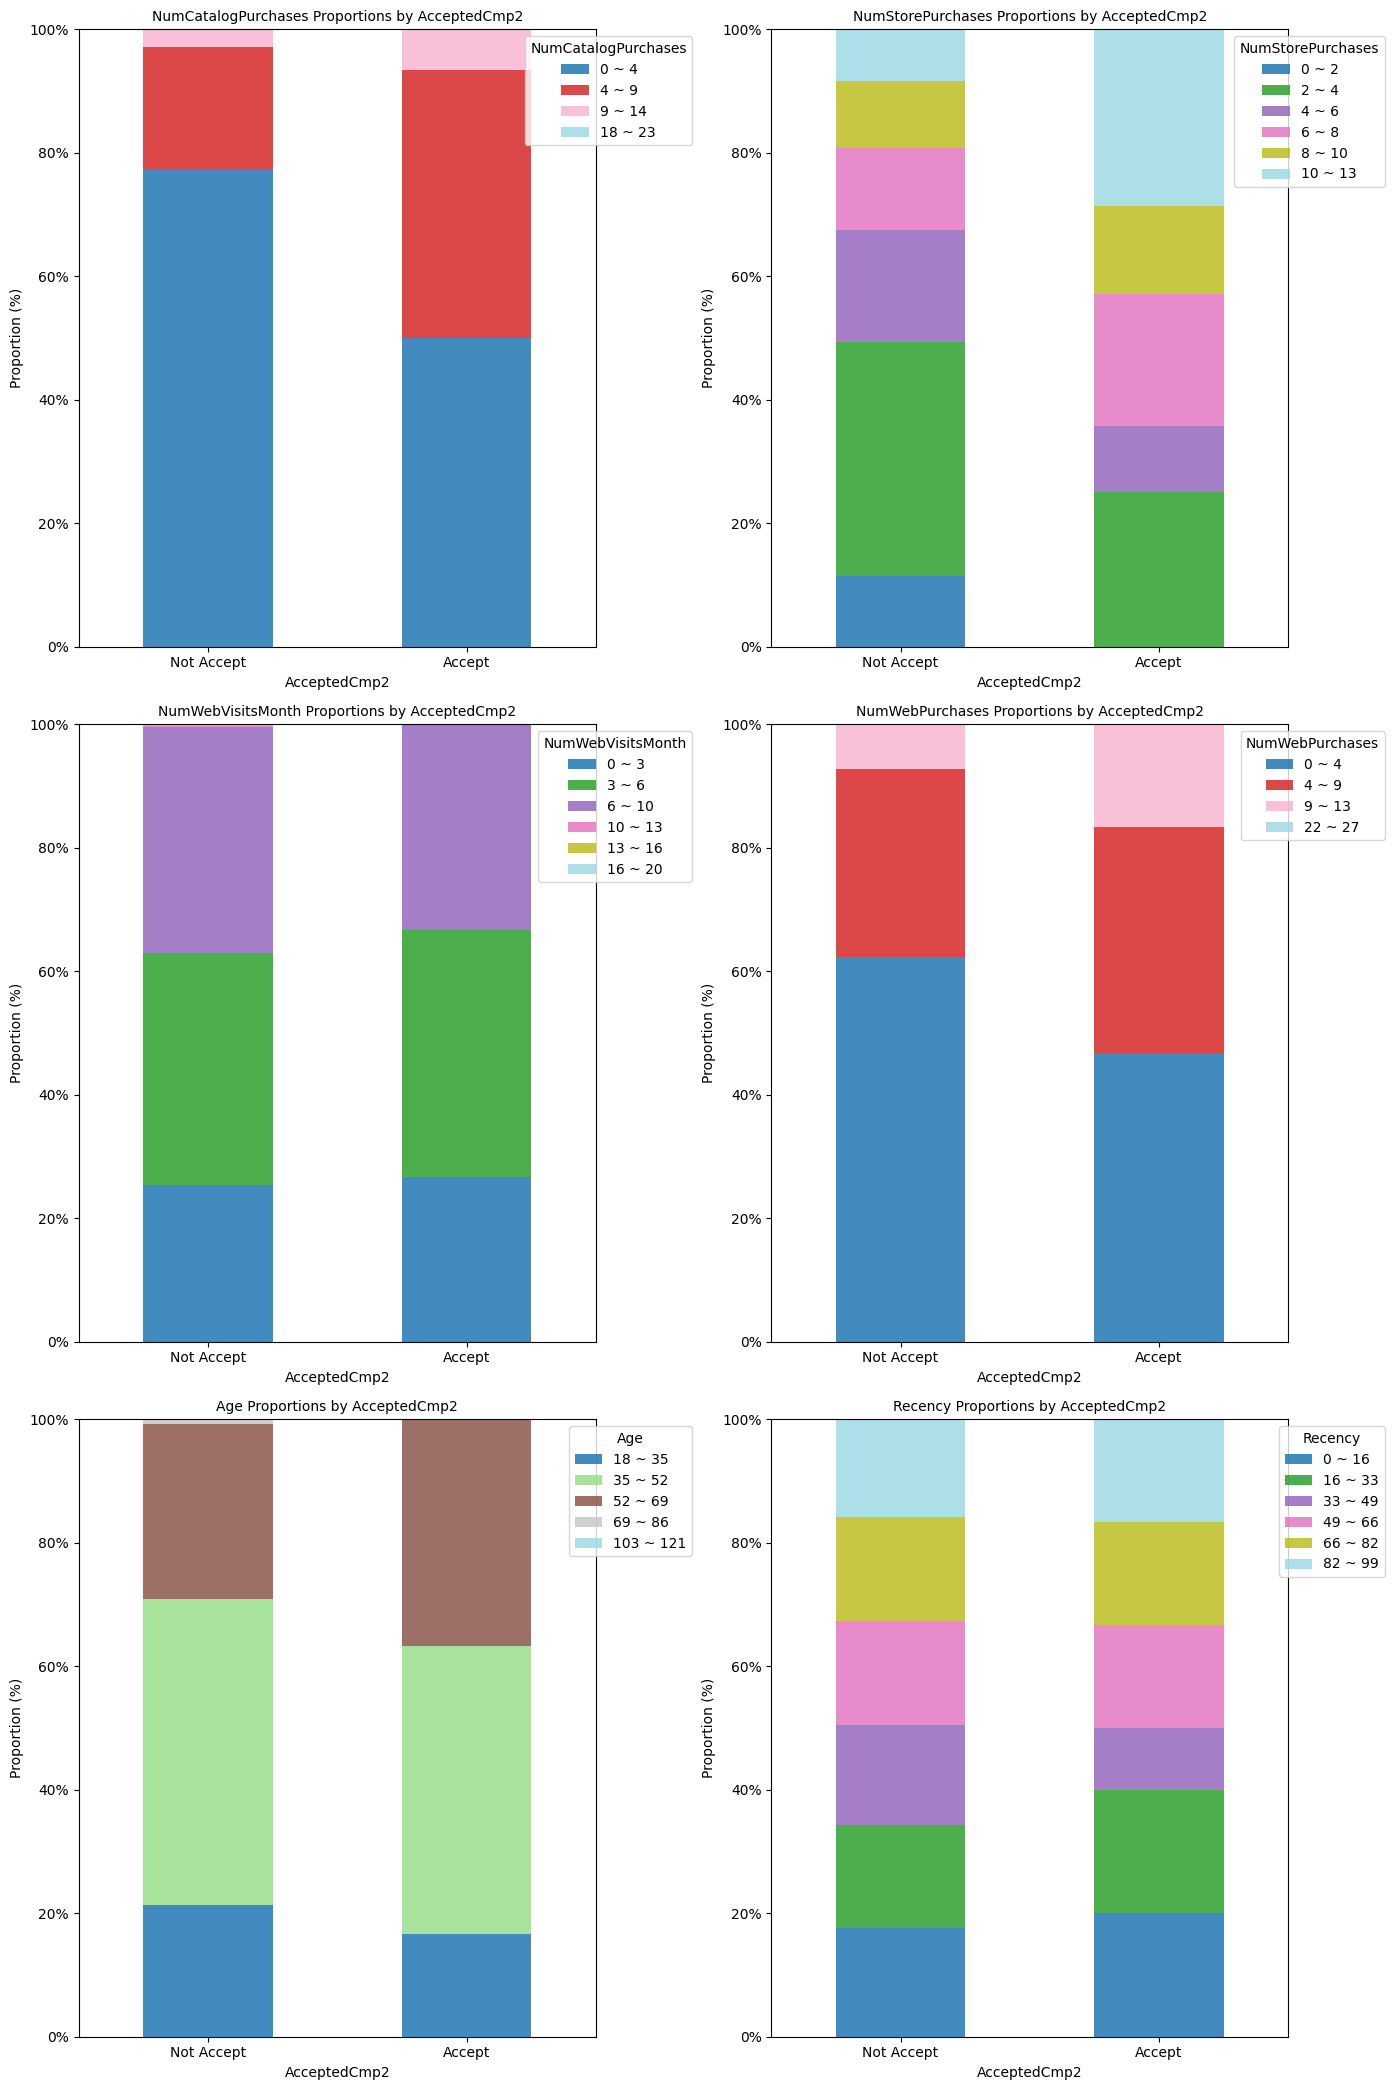

In [137]:
compare_groups_2(df2, 'AcceptedCmp2', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
               'NumWebPurchases', 'Age', 'Recency', 10)

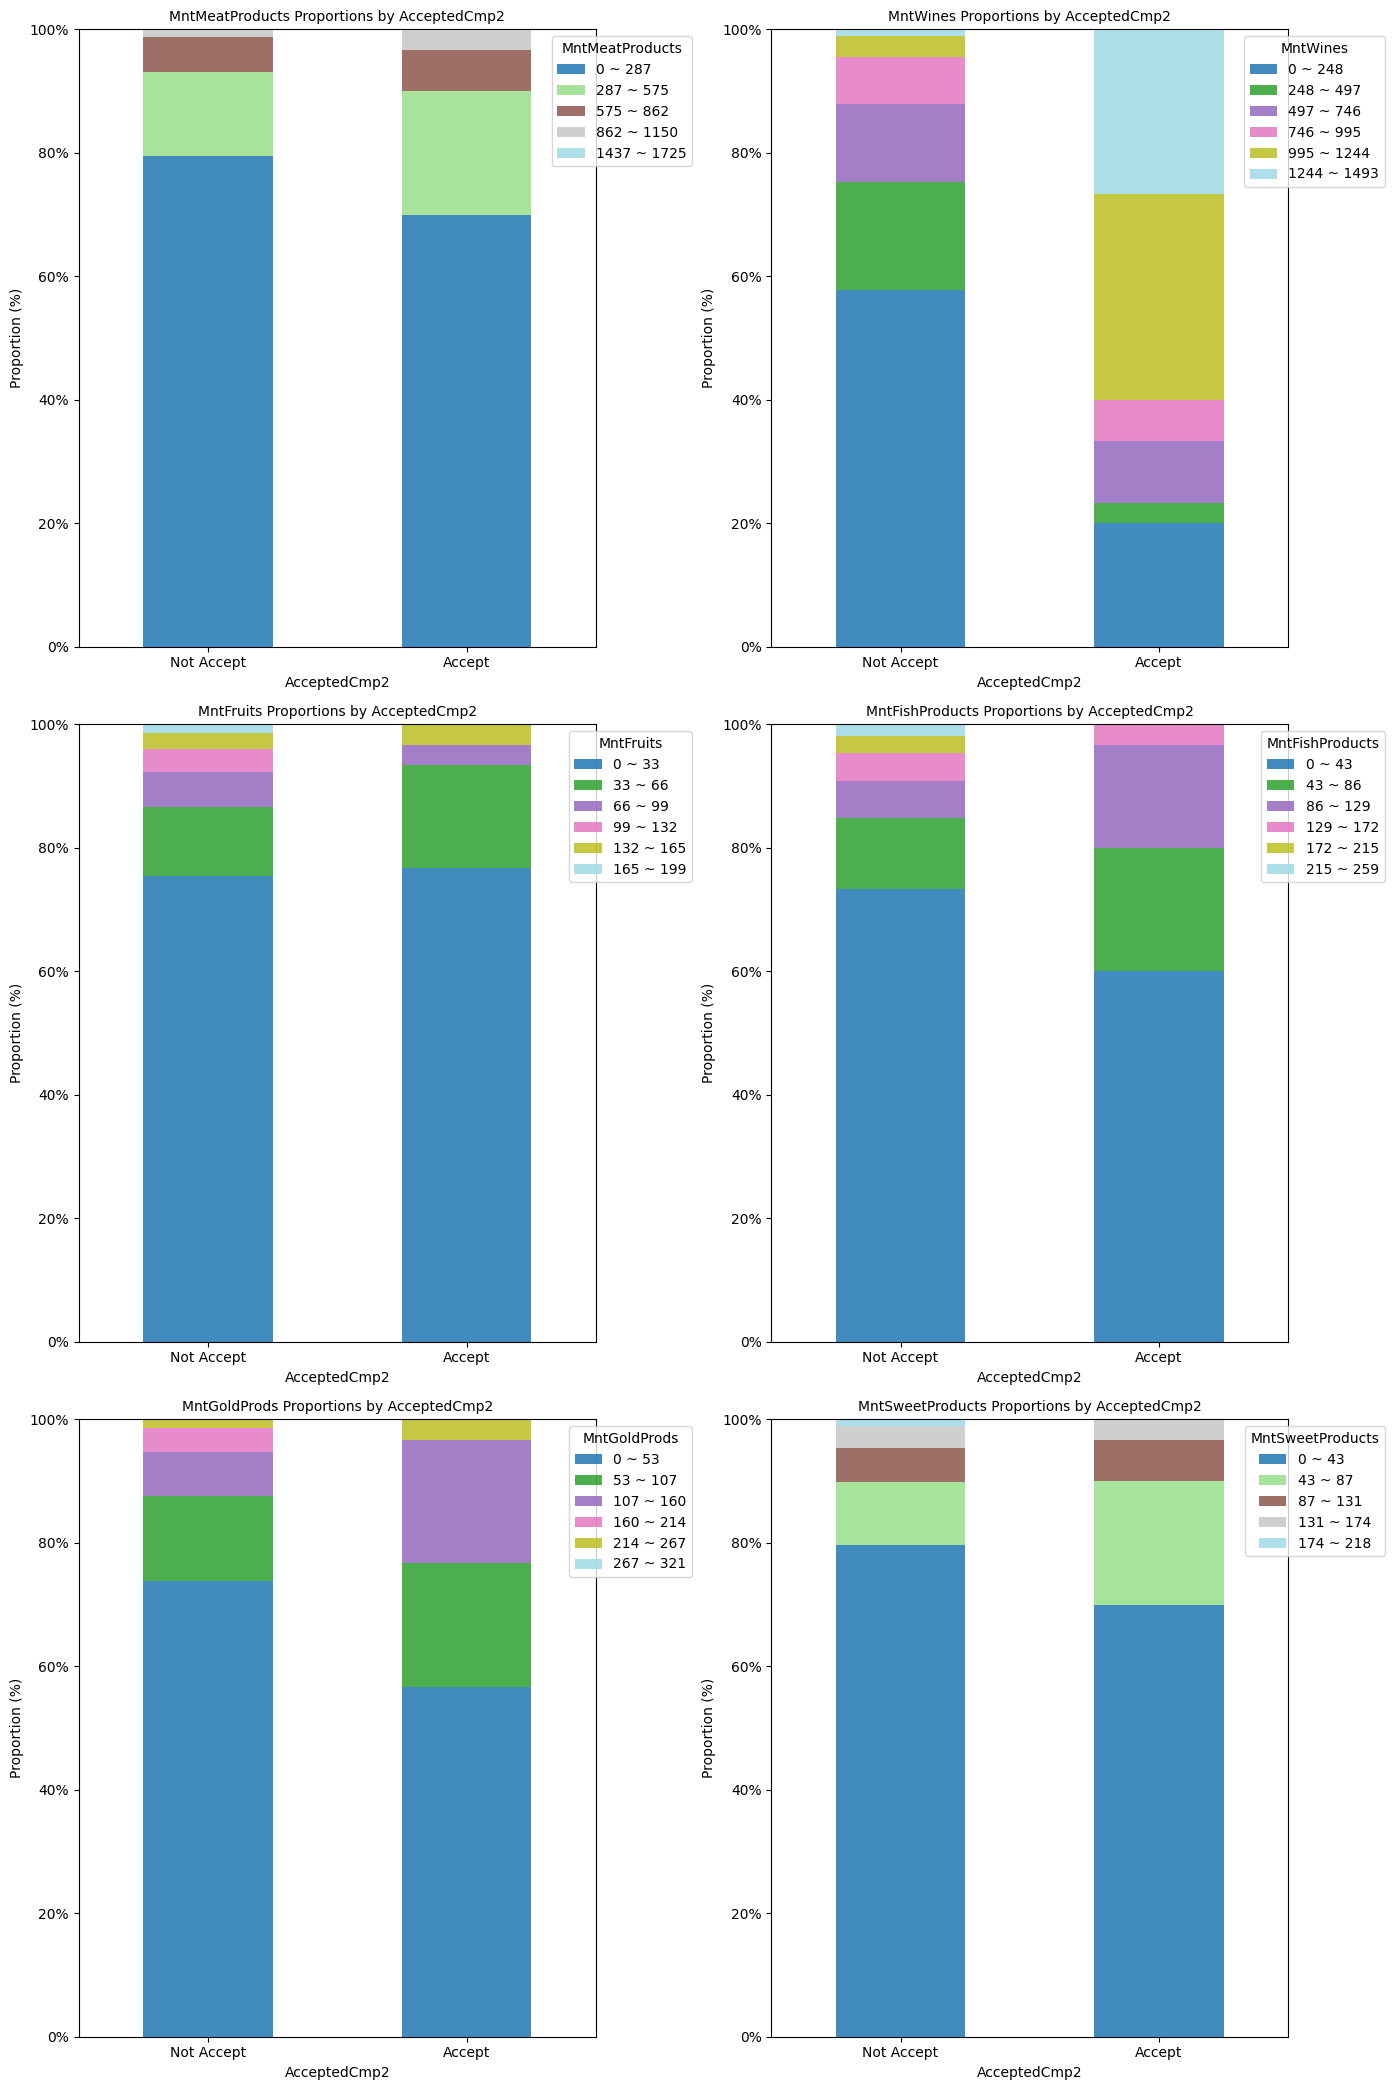

In [138]:

compare_groups_2(df2, 'AcceptedCmp2', 'MntMeatProducts', 'MntWines', 'MntFruits',\
                 'MntFishProducts', 'MntGoldProds' , 'MntSweetProducts', 10)

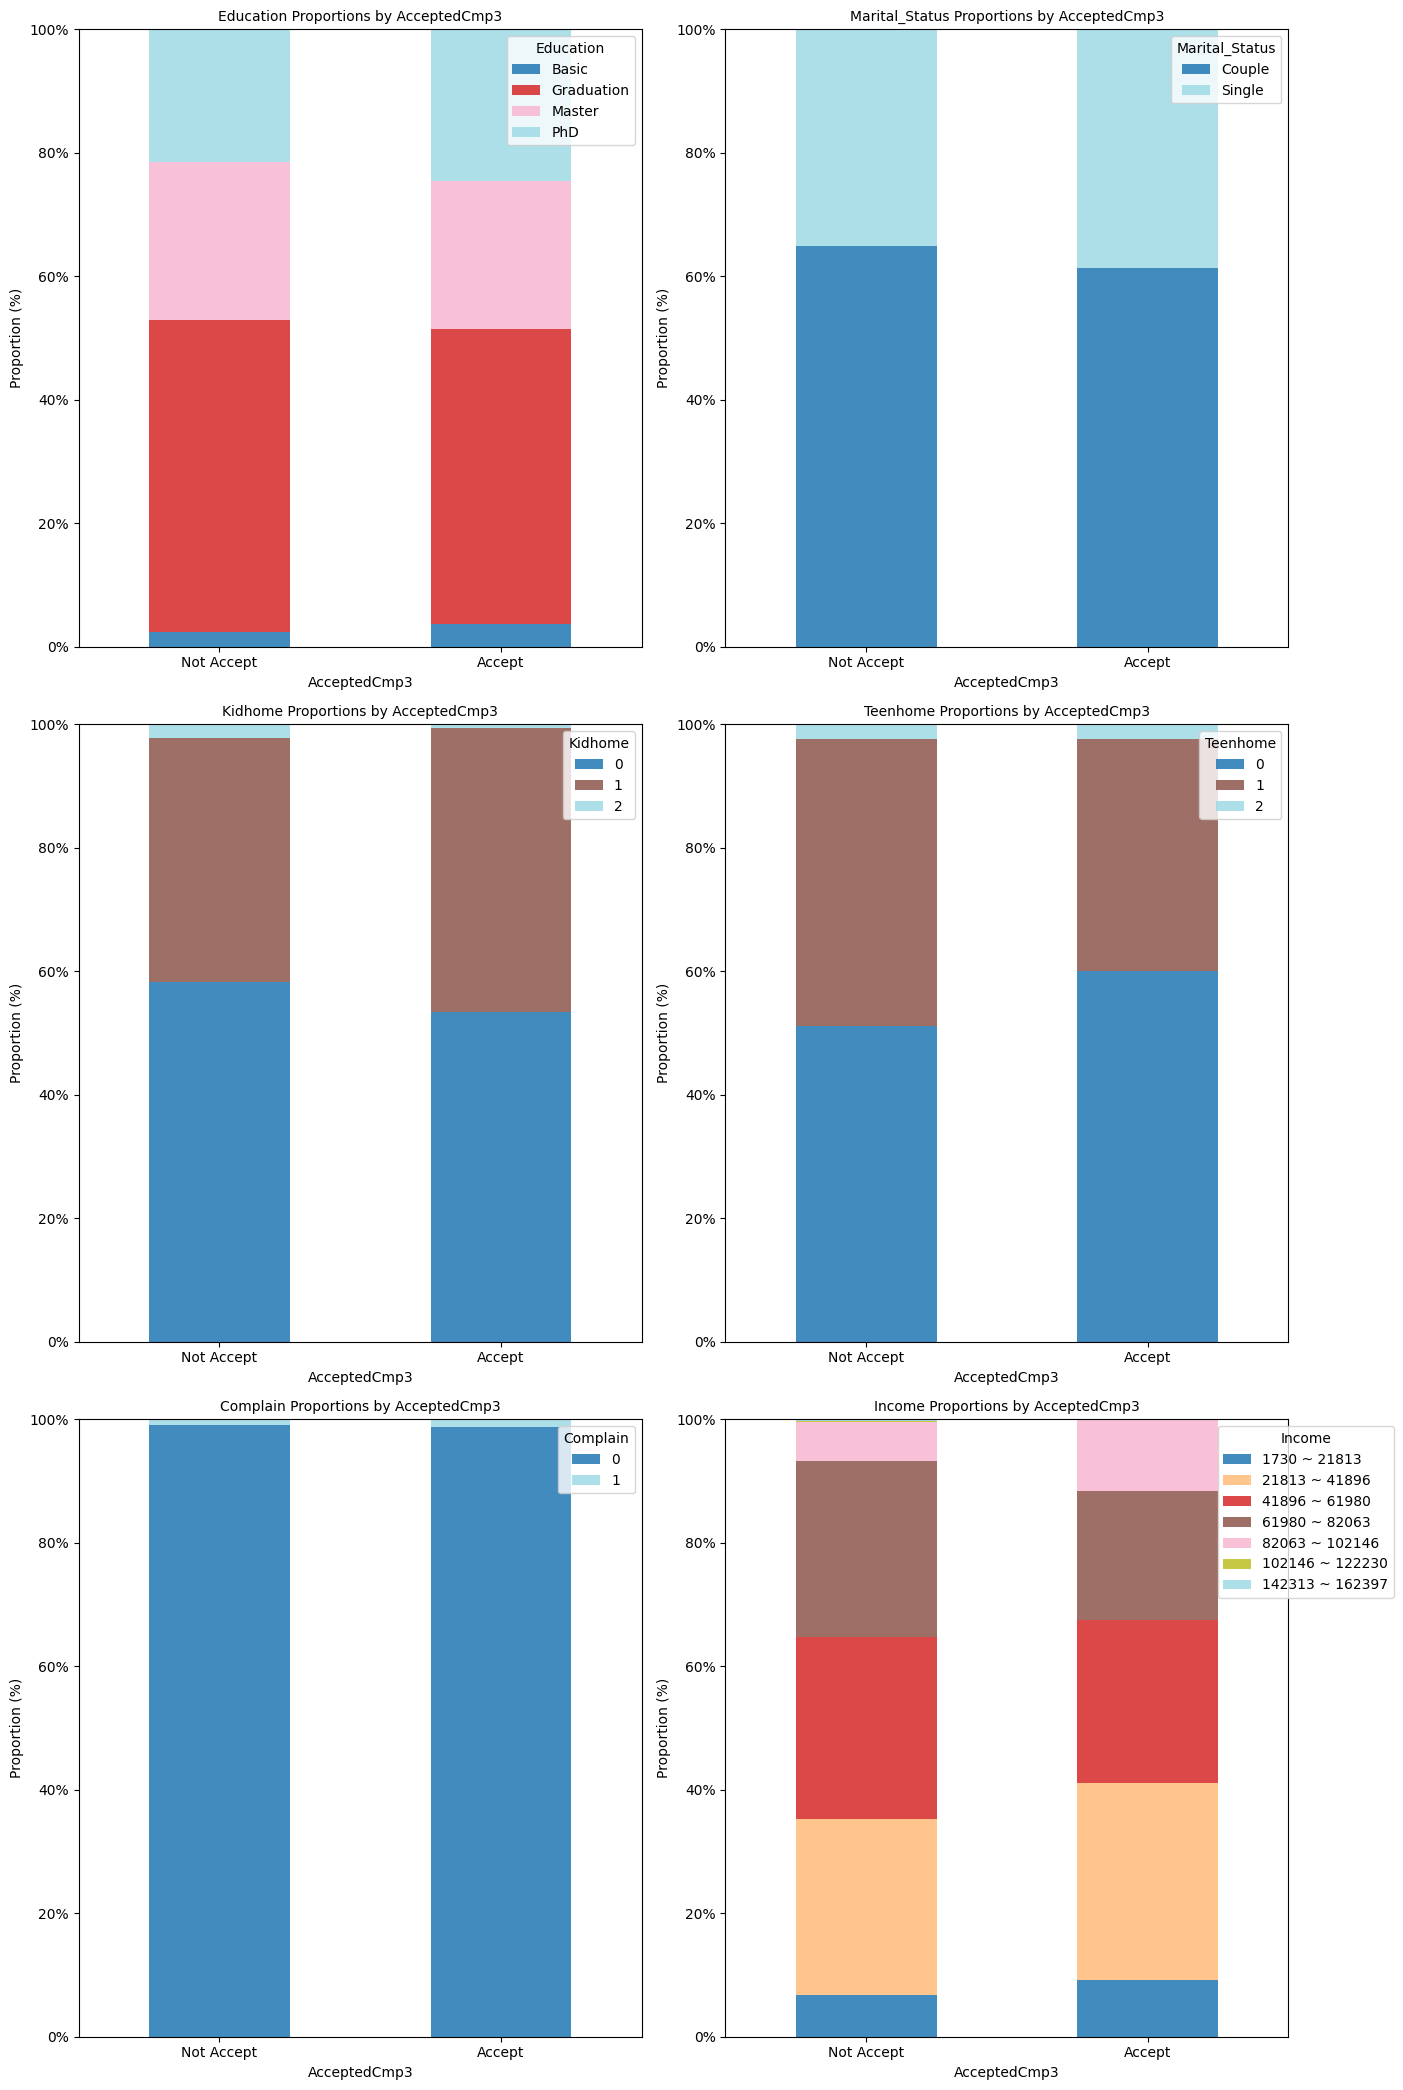

In [139]:
compare_groups_1(df2, 'AcceptedCmp3', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',\
               'Complain', 'Income', 10)

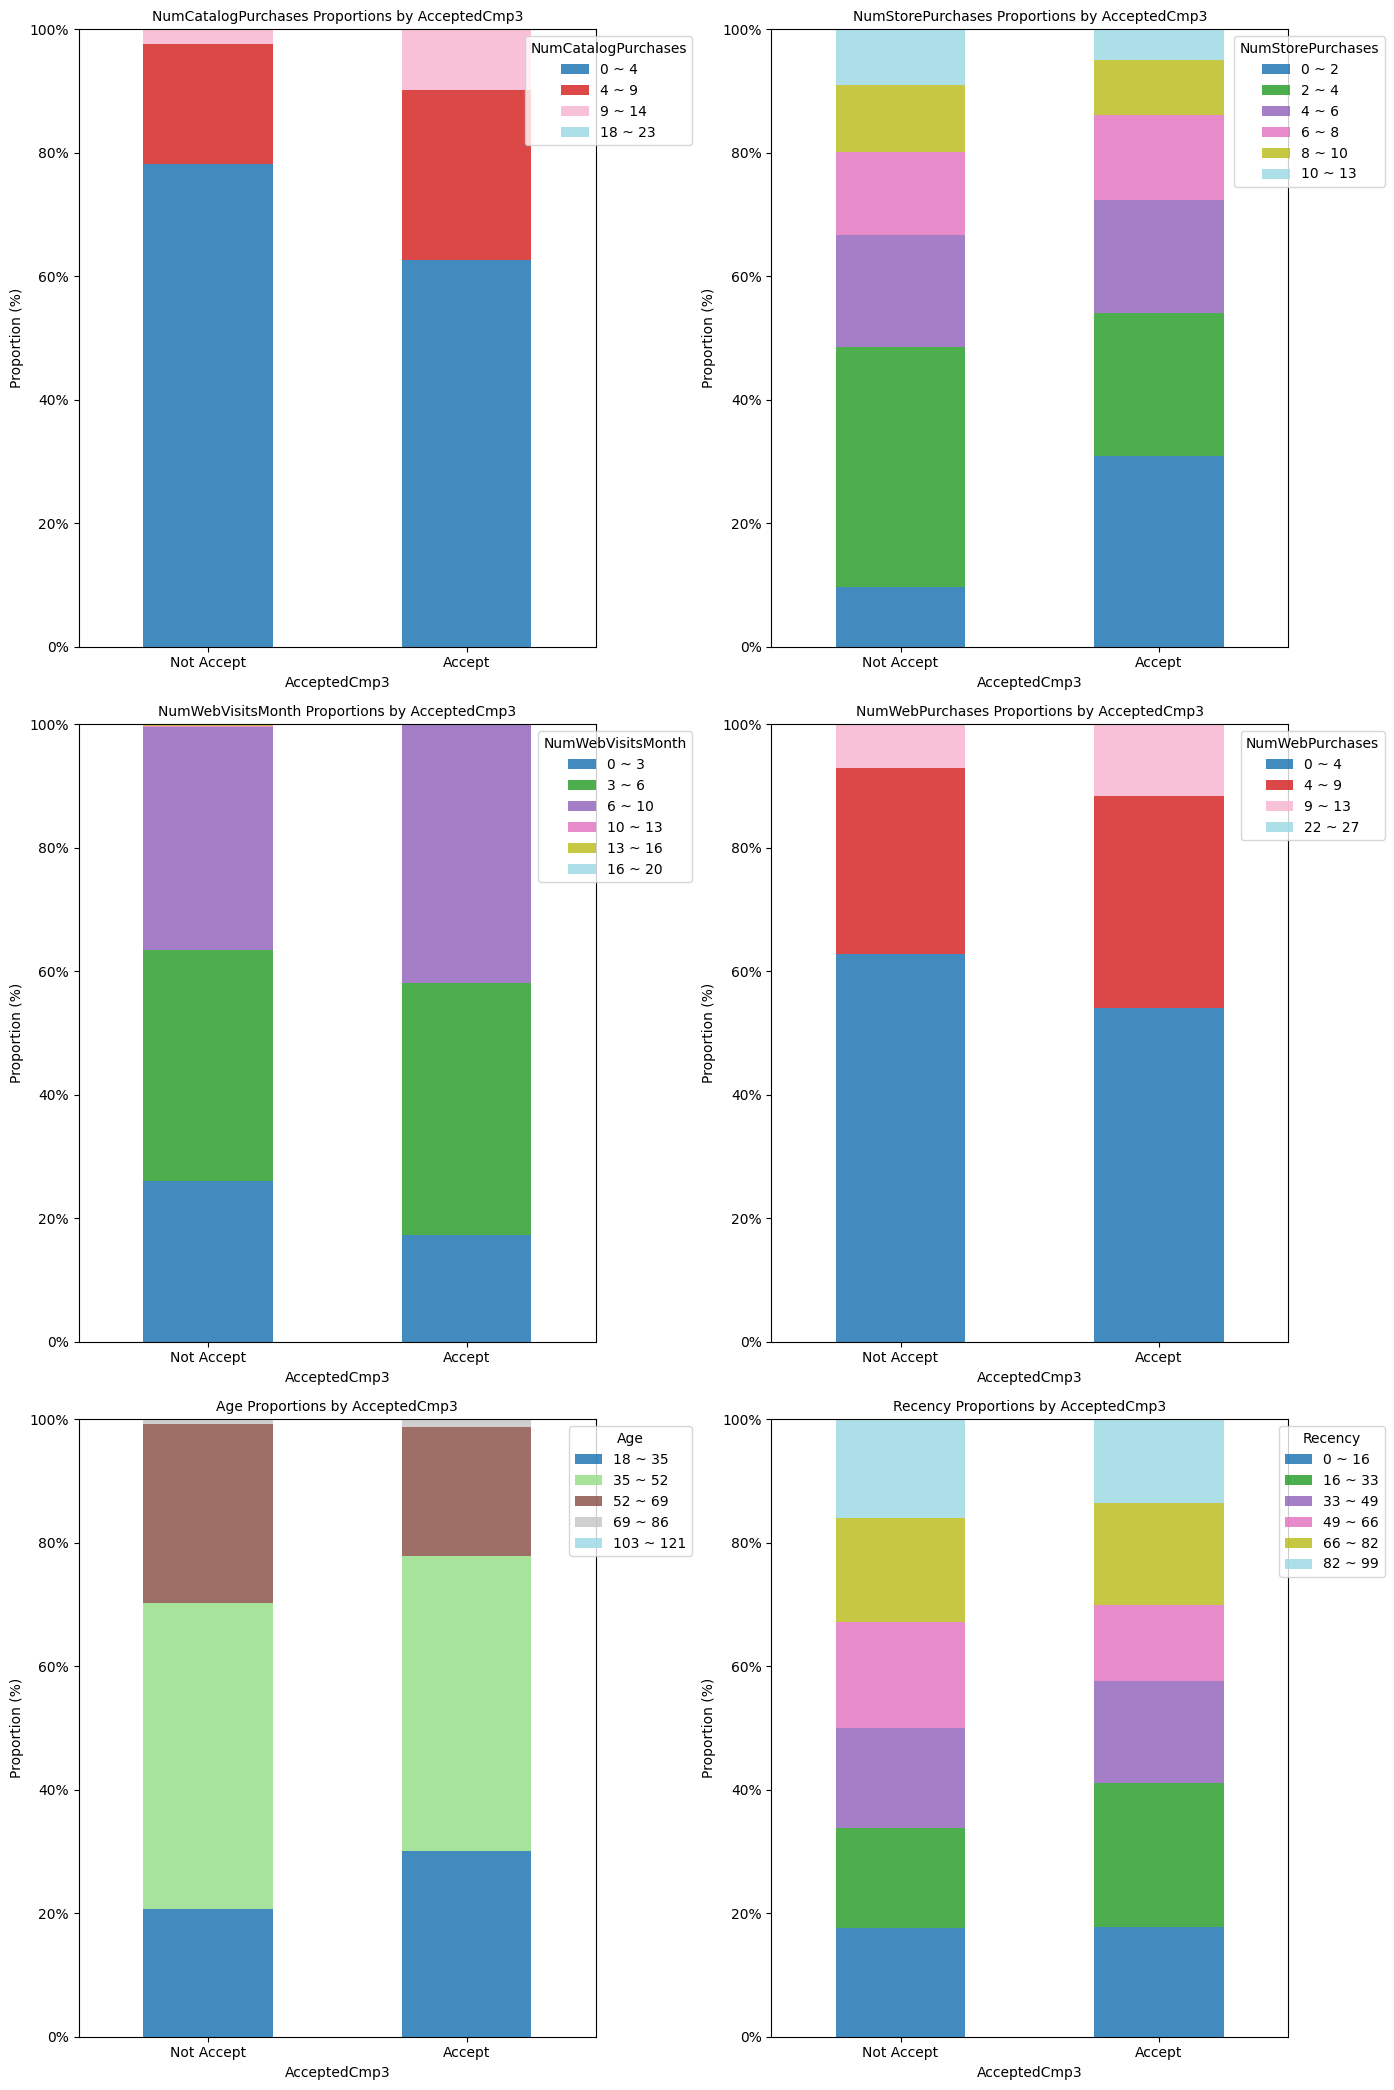

In [140]:
compare_groups_2(df2, 'AcceptedCmp3', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
               'NumWebPurchases', 'Age', 'Recency', 10)

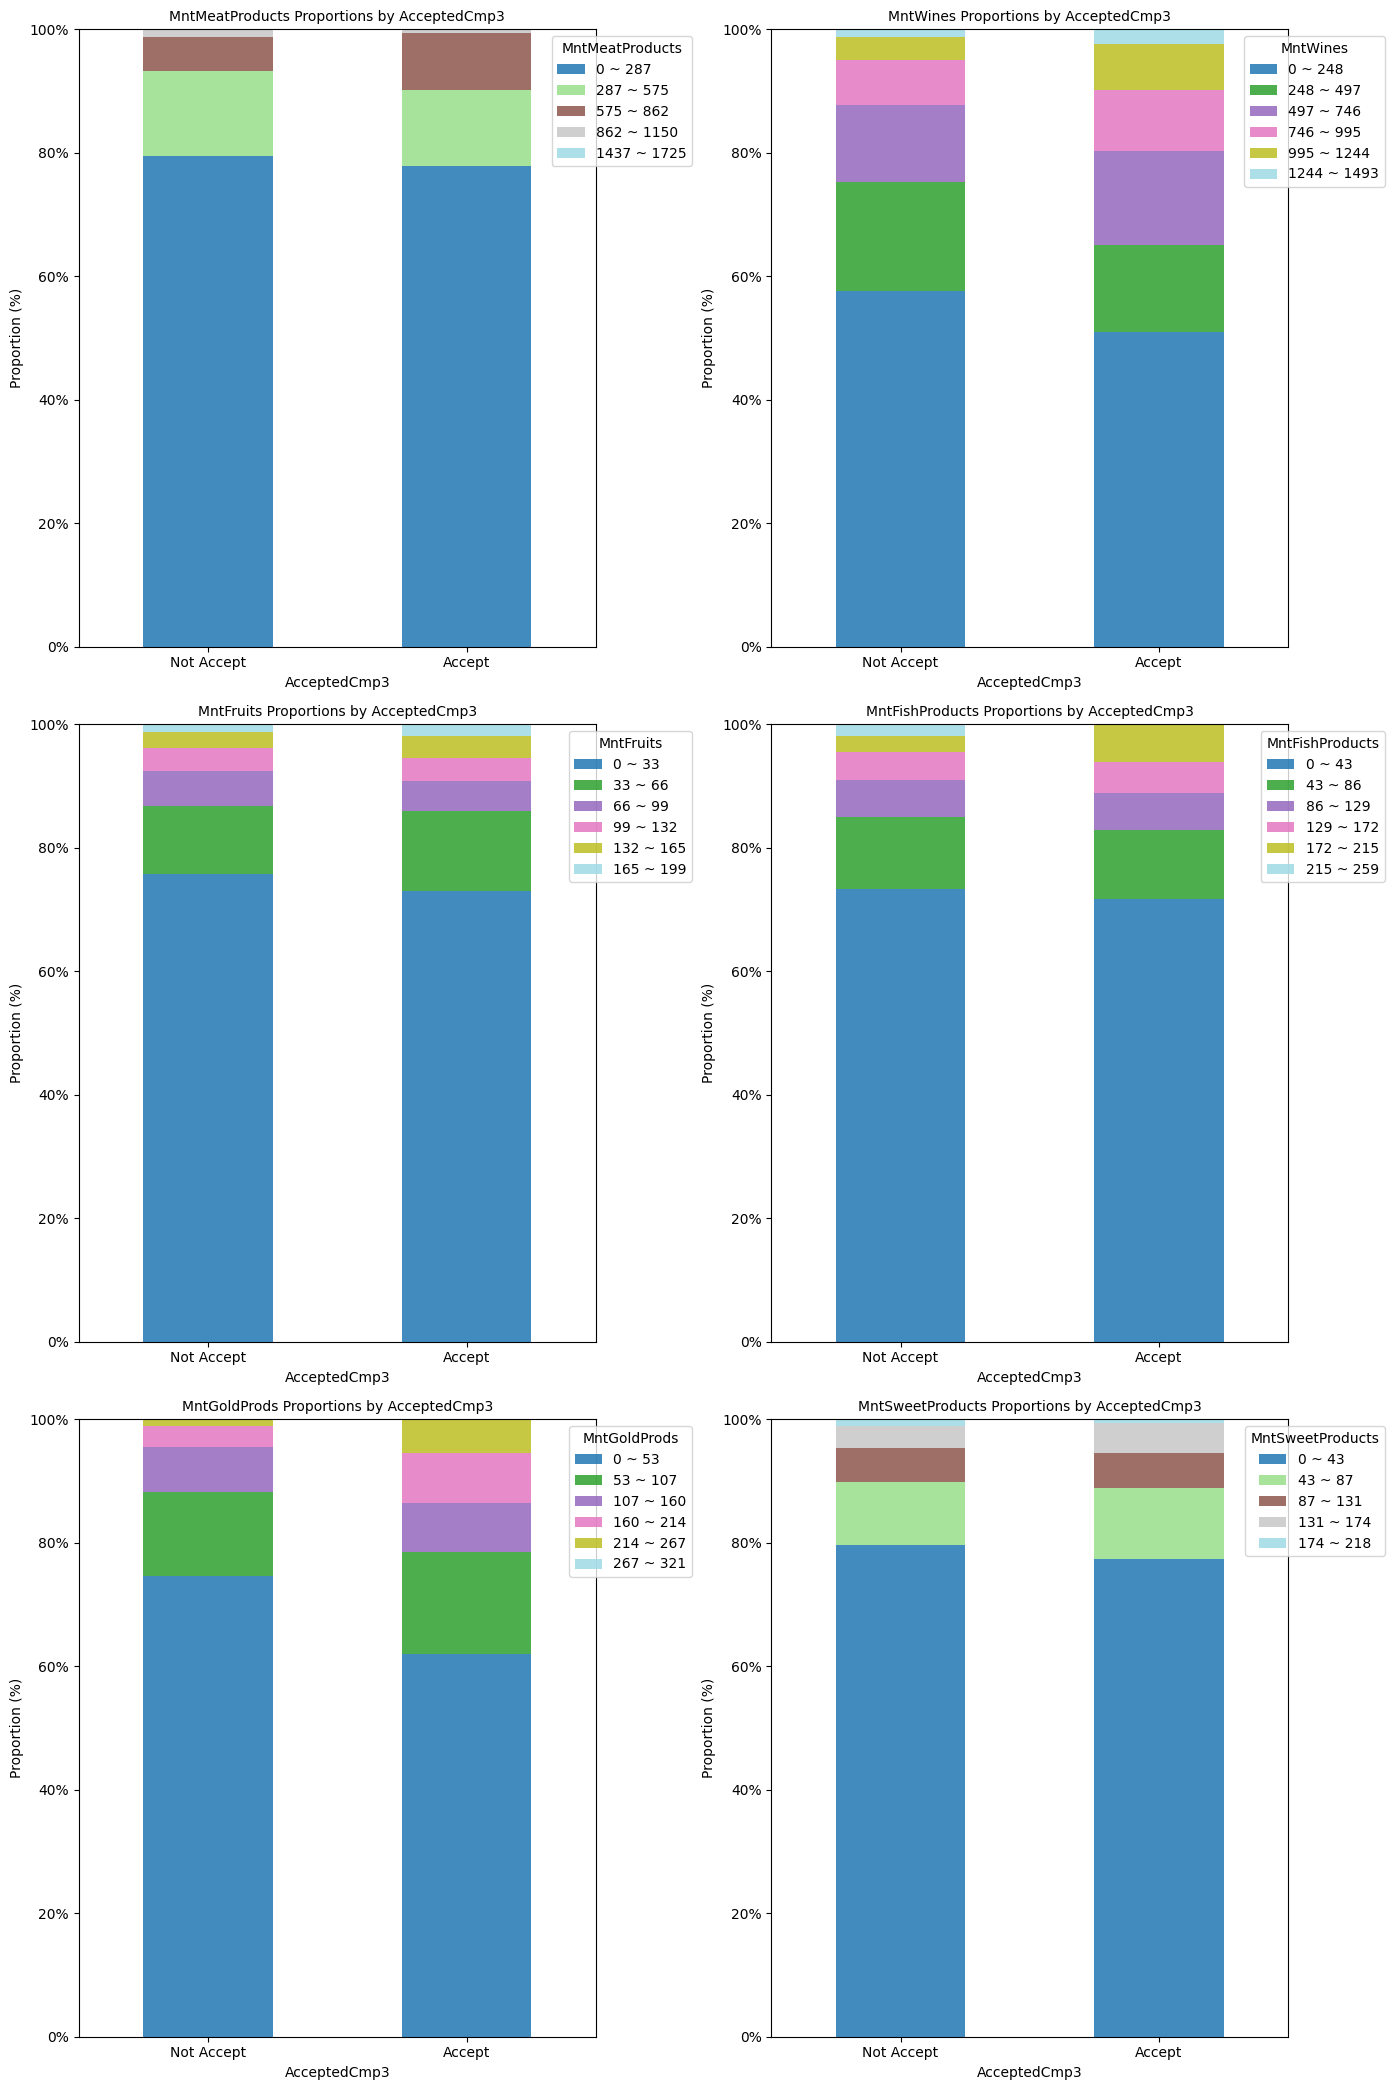

In [141]:

compare_groups_2(df2, 'AcceptedCmp3', 'MntMeatProducts', 'MntWines', 'MntFruits',\
                 'MntFishProducts', 'MntGoldProds' , 'MntSweetProducts', 10)

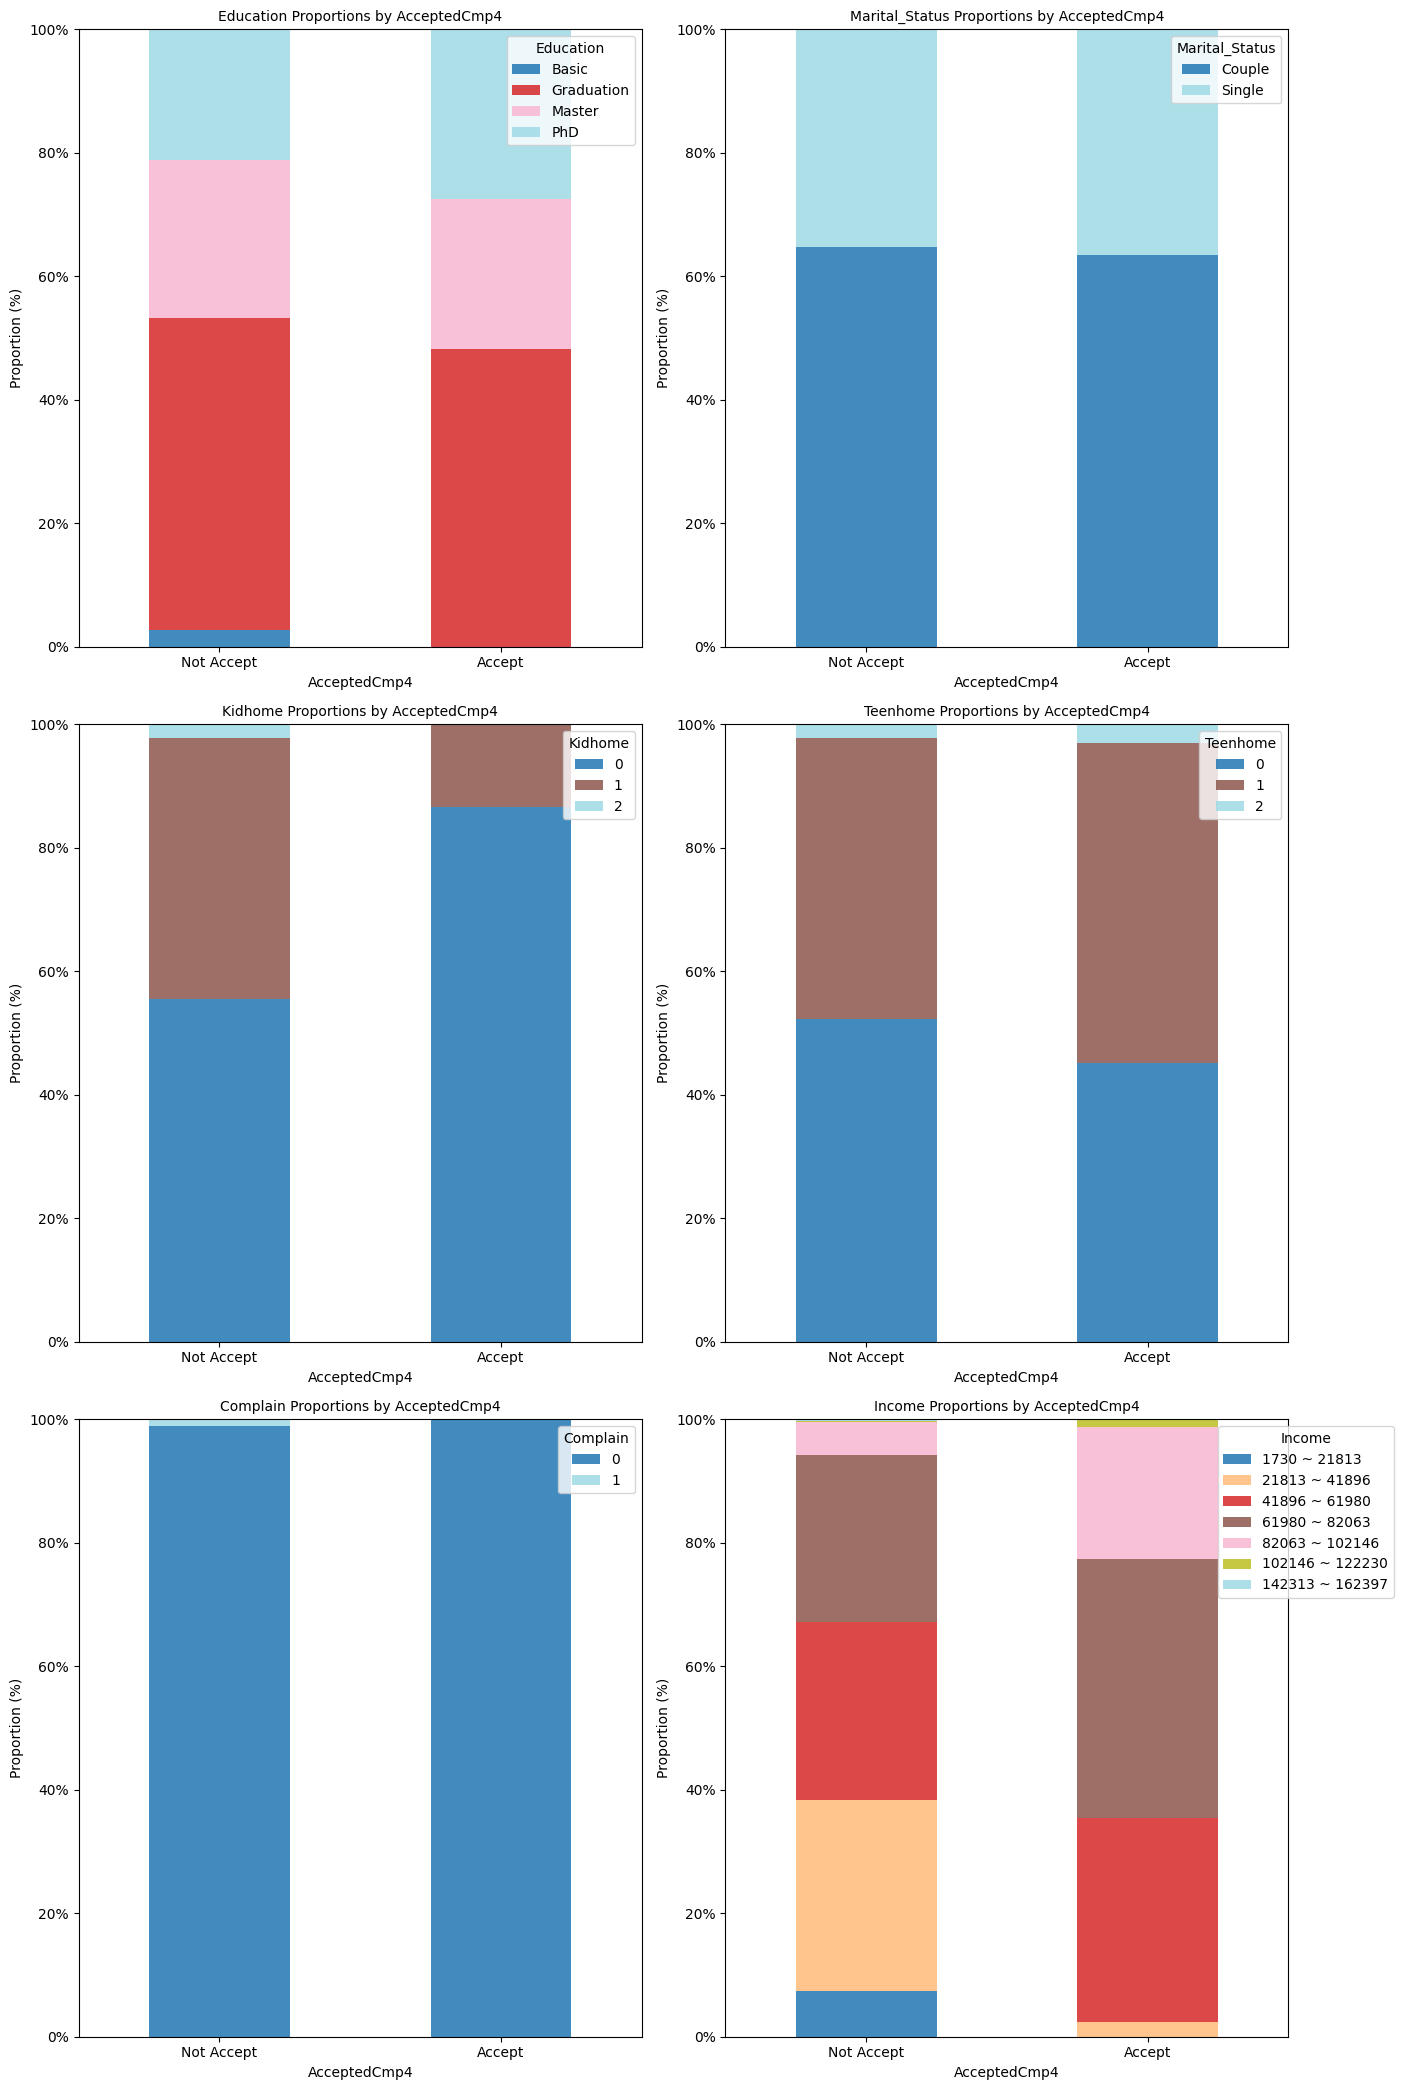

In [142]:
compare_groups_1(df2, 'AcceptedCmp4', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',\
               'Complain', 'Income', 10)

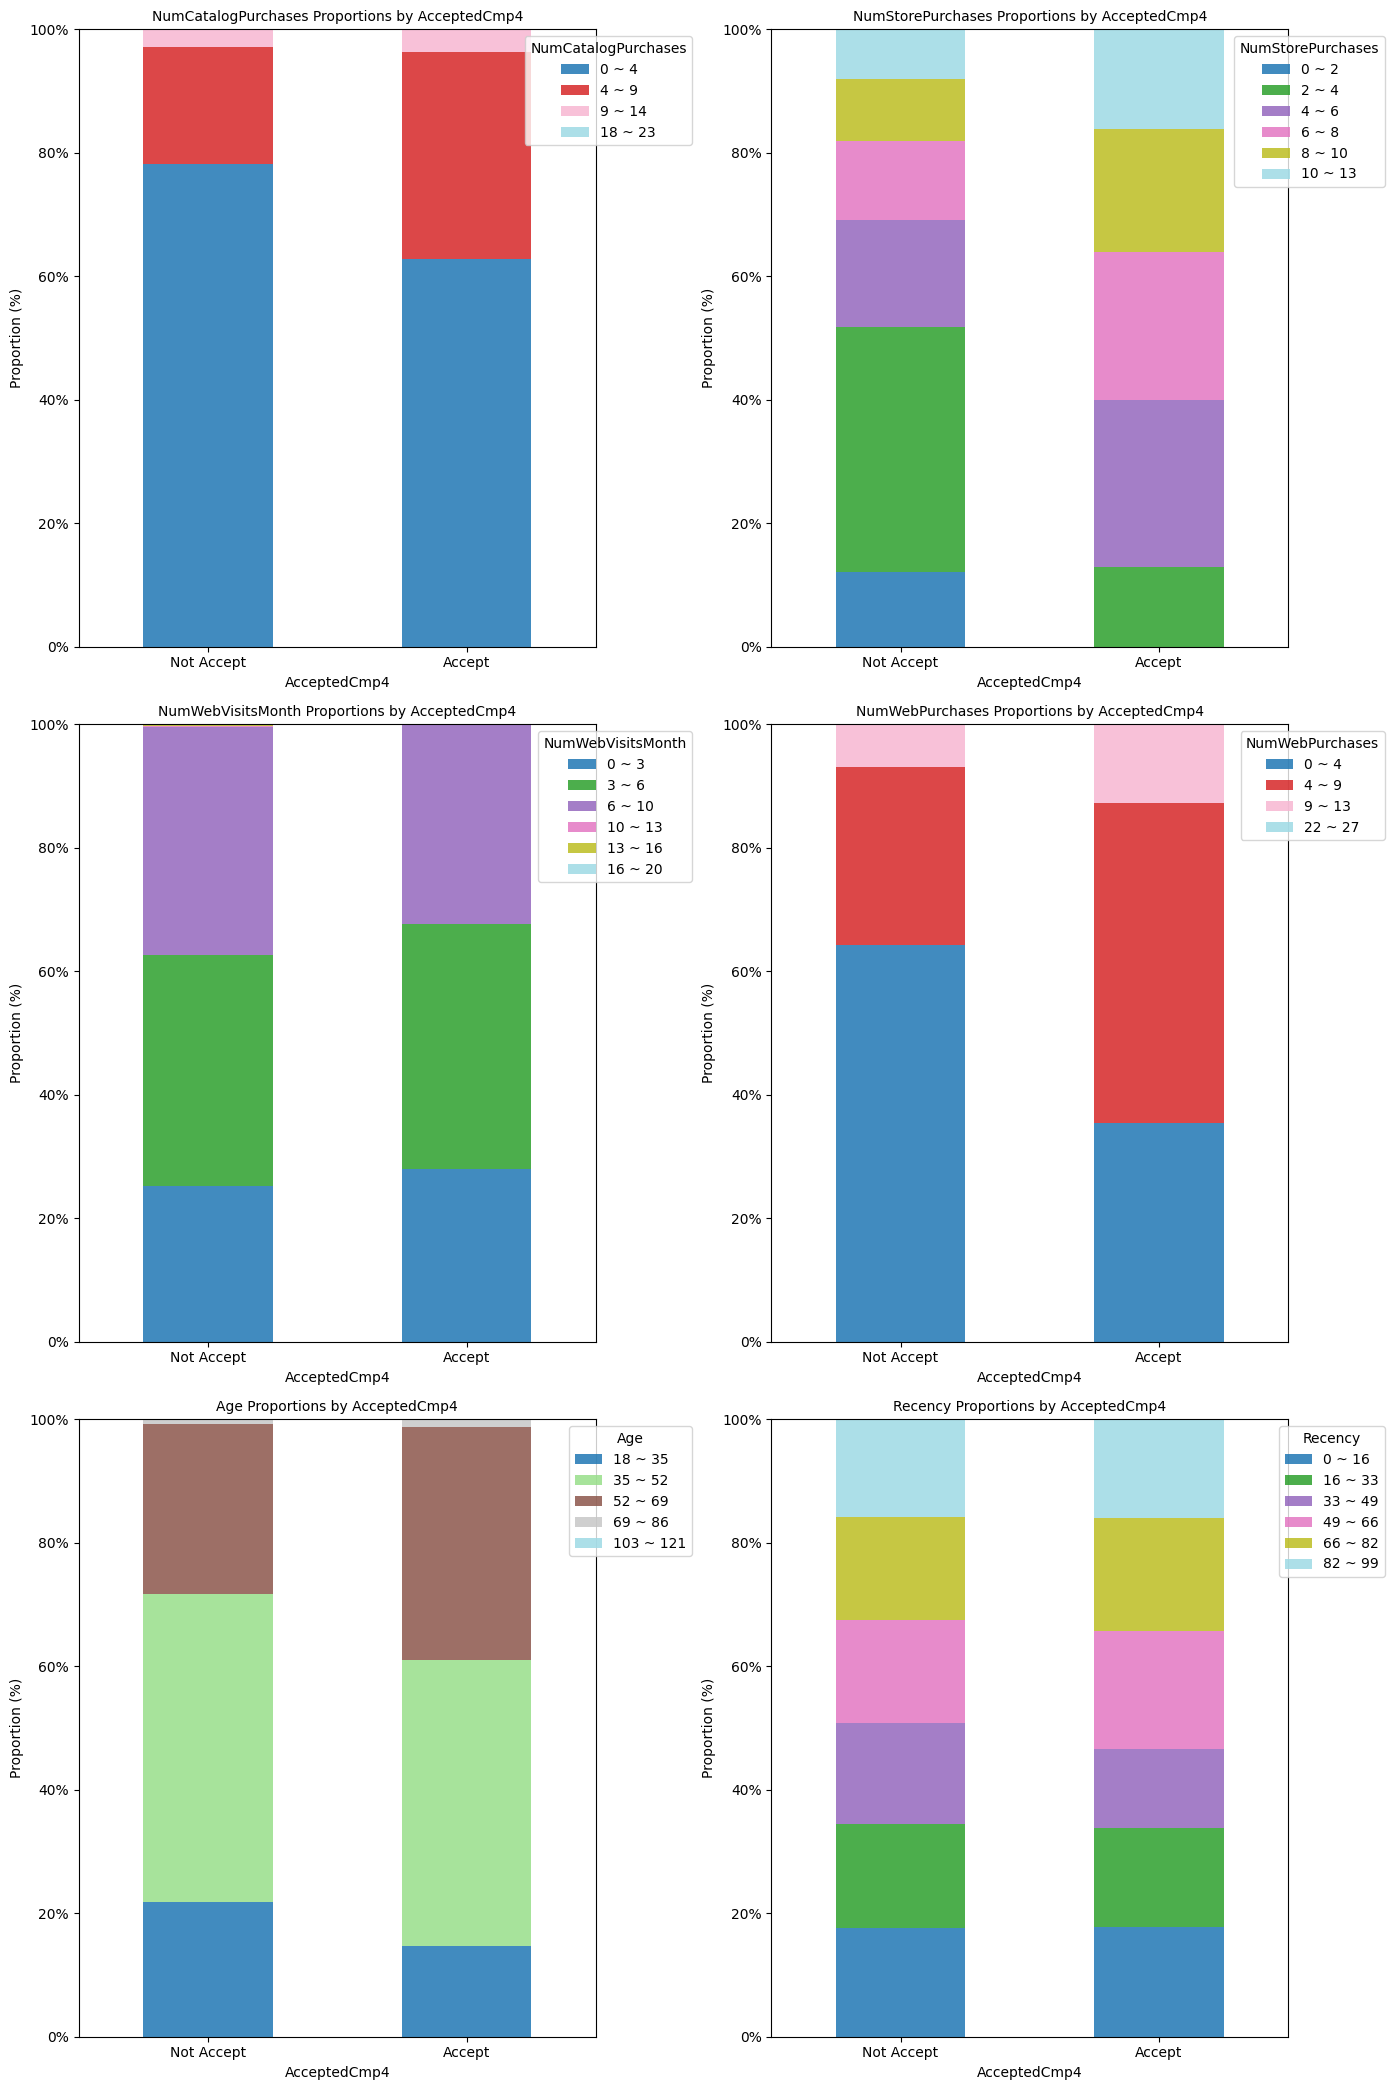

In [143]:
compare_groups_2(df2, 'AcceptedCmp4', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
               'NumWebPurchases', 'Age', 'Recency', 10)

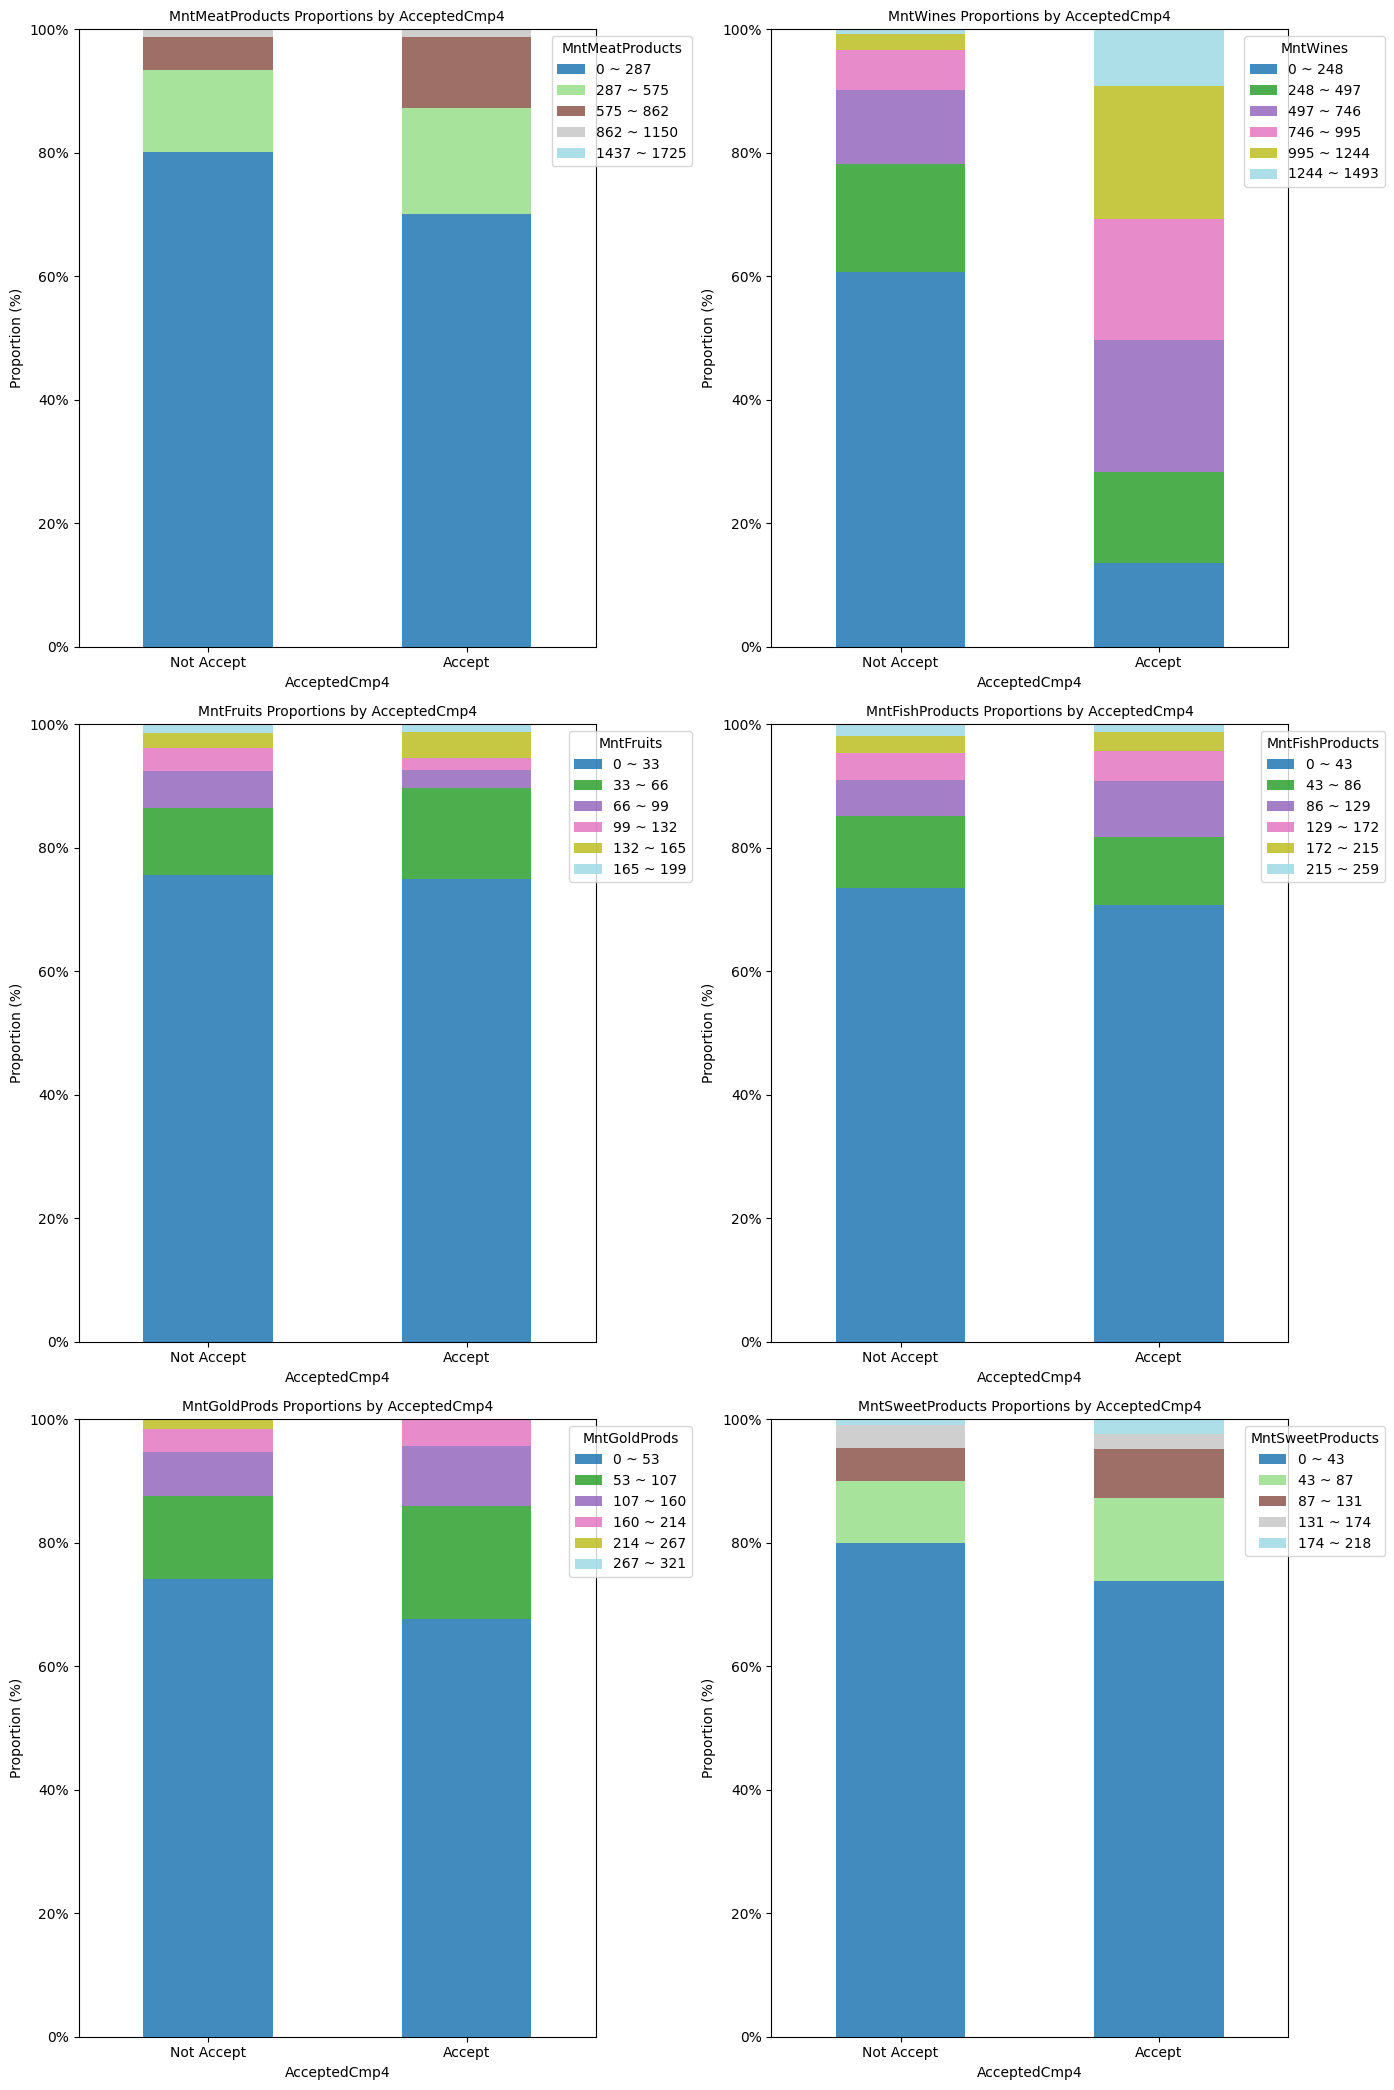

In [144]:

compare_groups_2(df2, 'AcceptedCmp4', 'MntMeatProducts', 'MntWines', 'MntFruits',\
                 'MntFishProducts', 'MntGoldProds' , 'MntSweetProducts', 10)

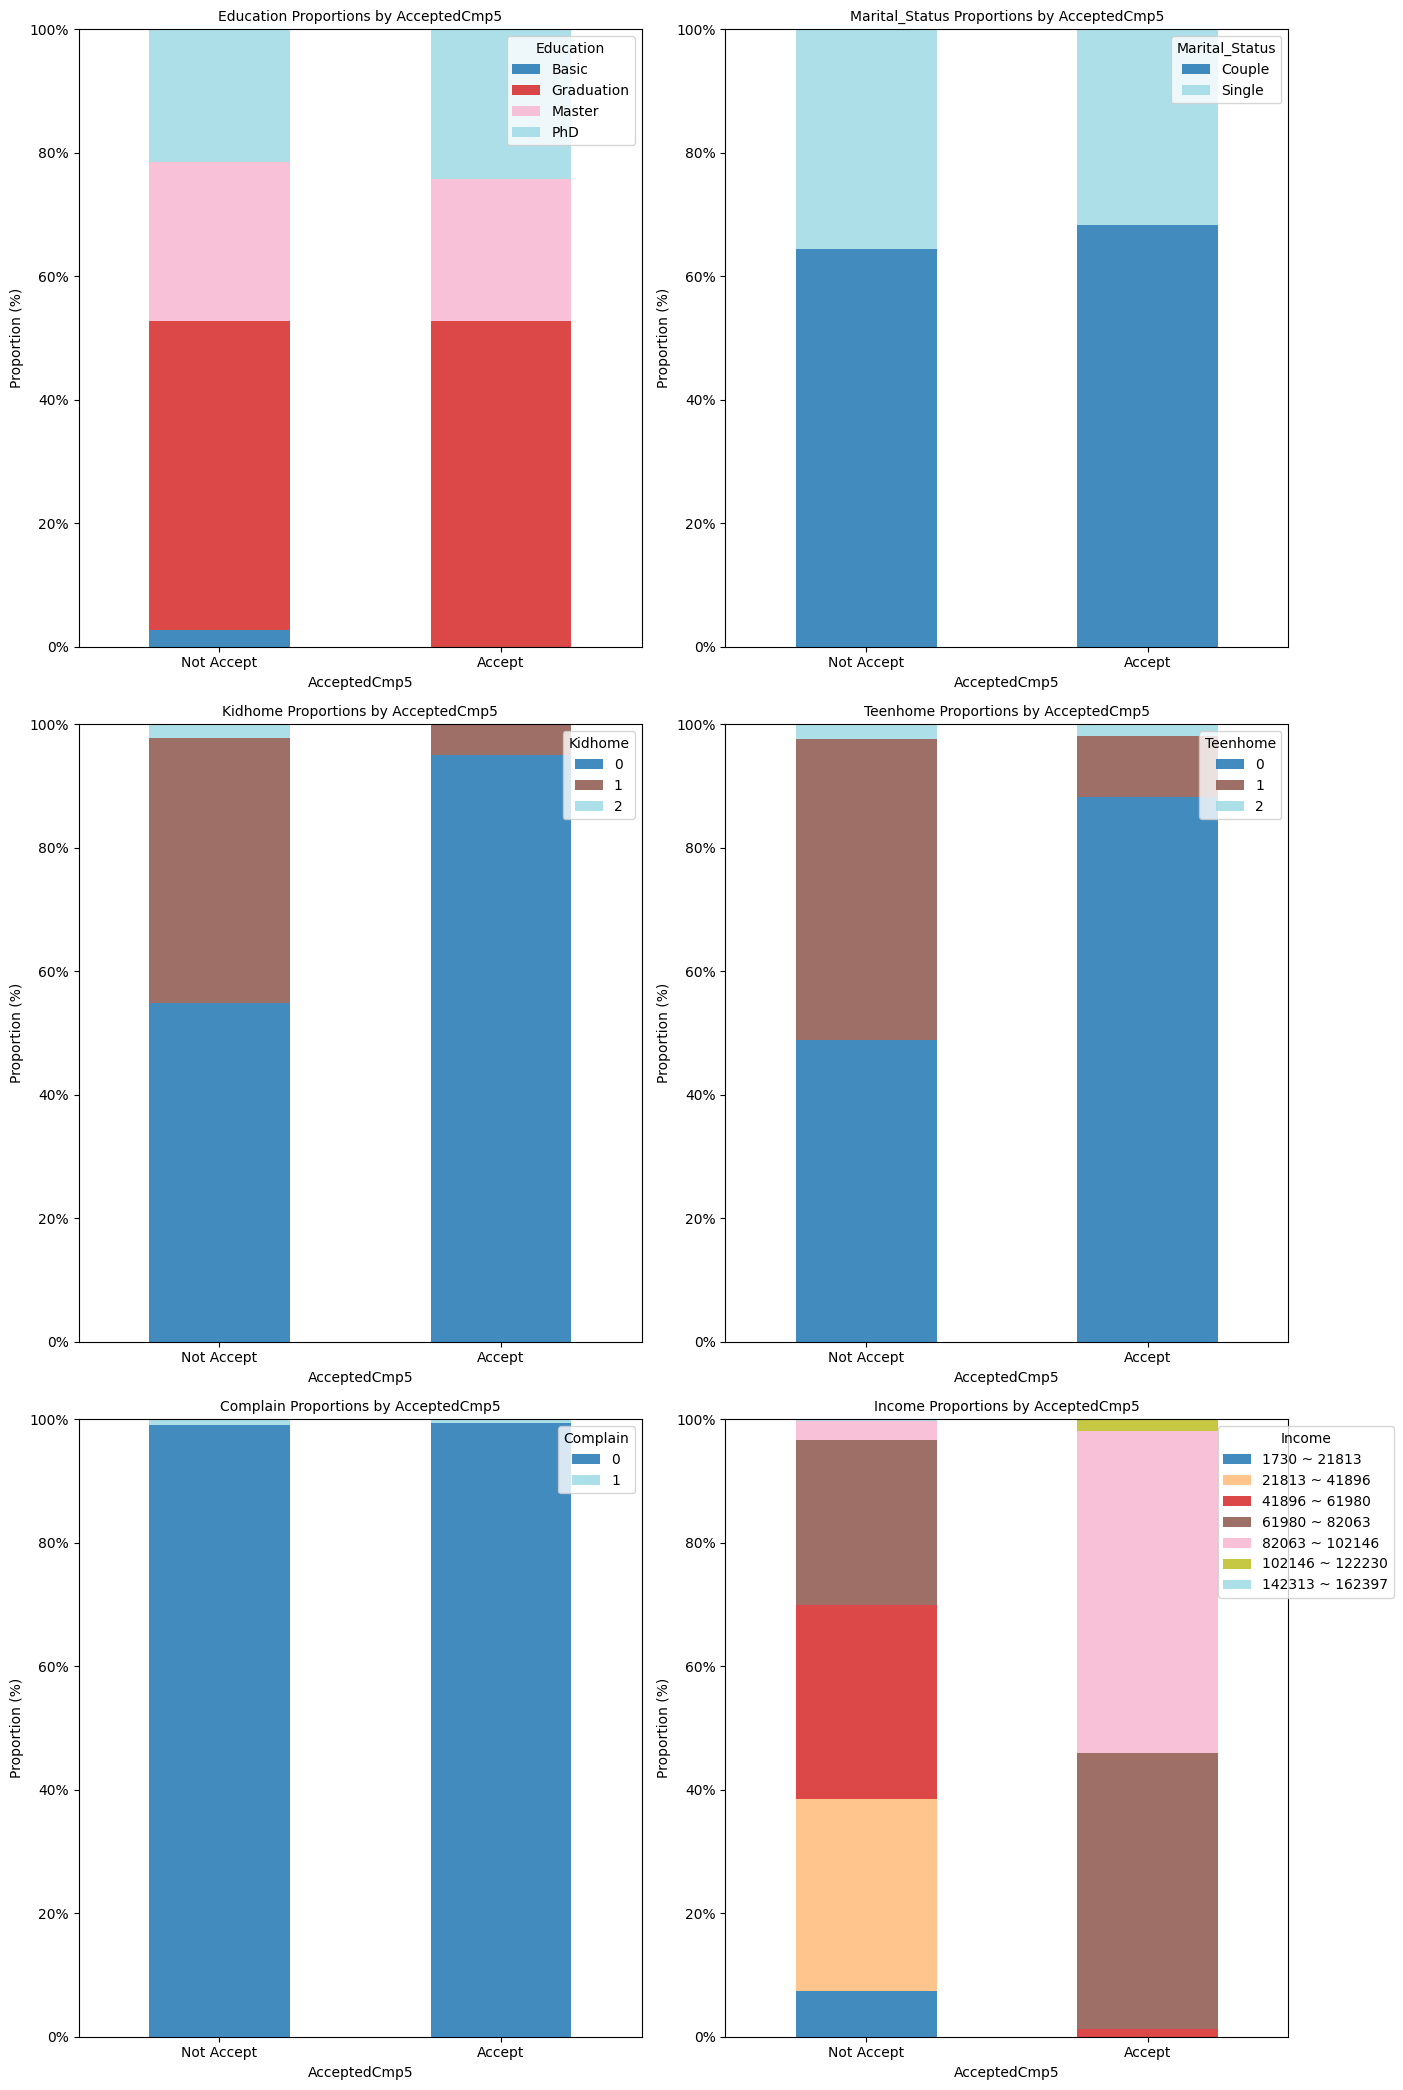

In [145]:
compare_groups_1(df2, 'AcceptedCmp5', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',\
               'Complain', 'Income', 10)


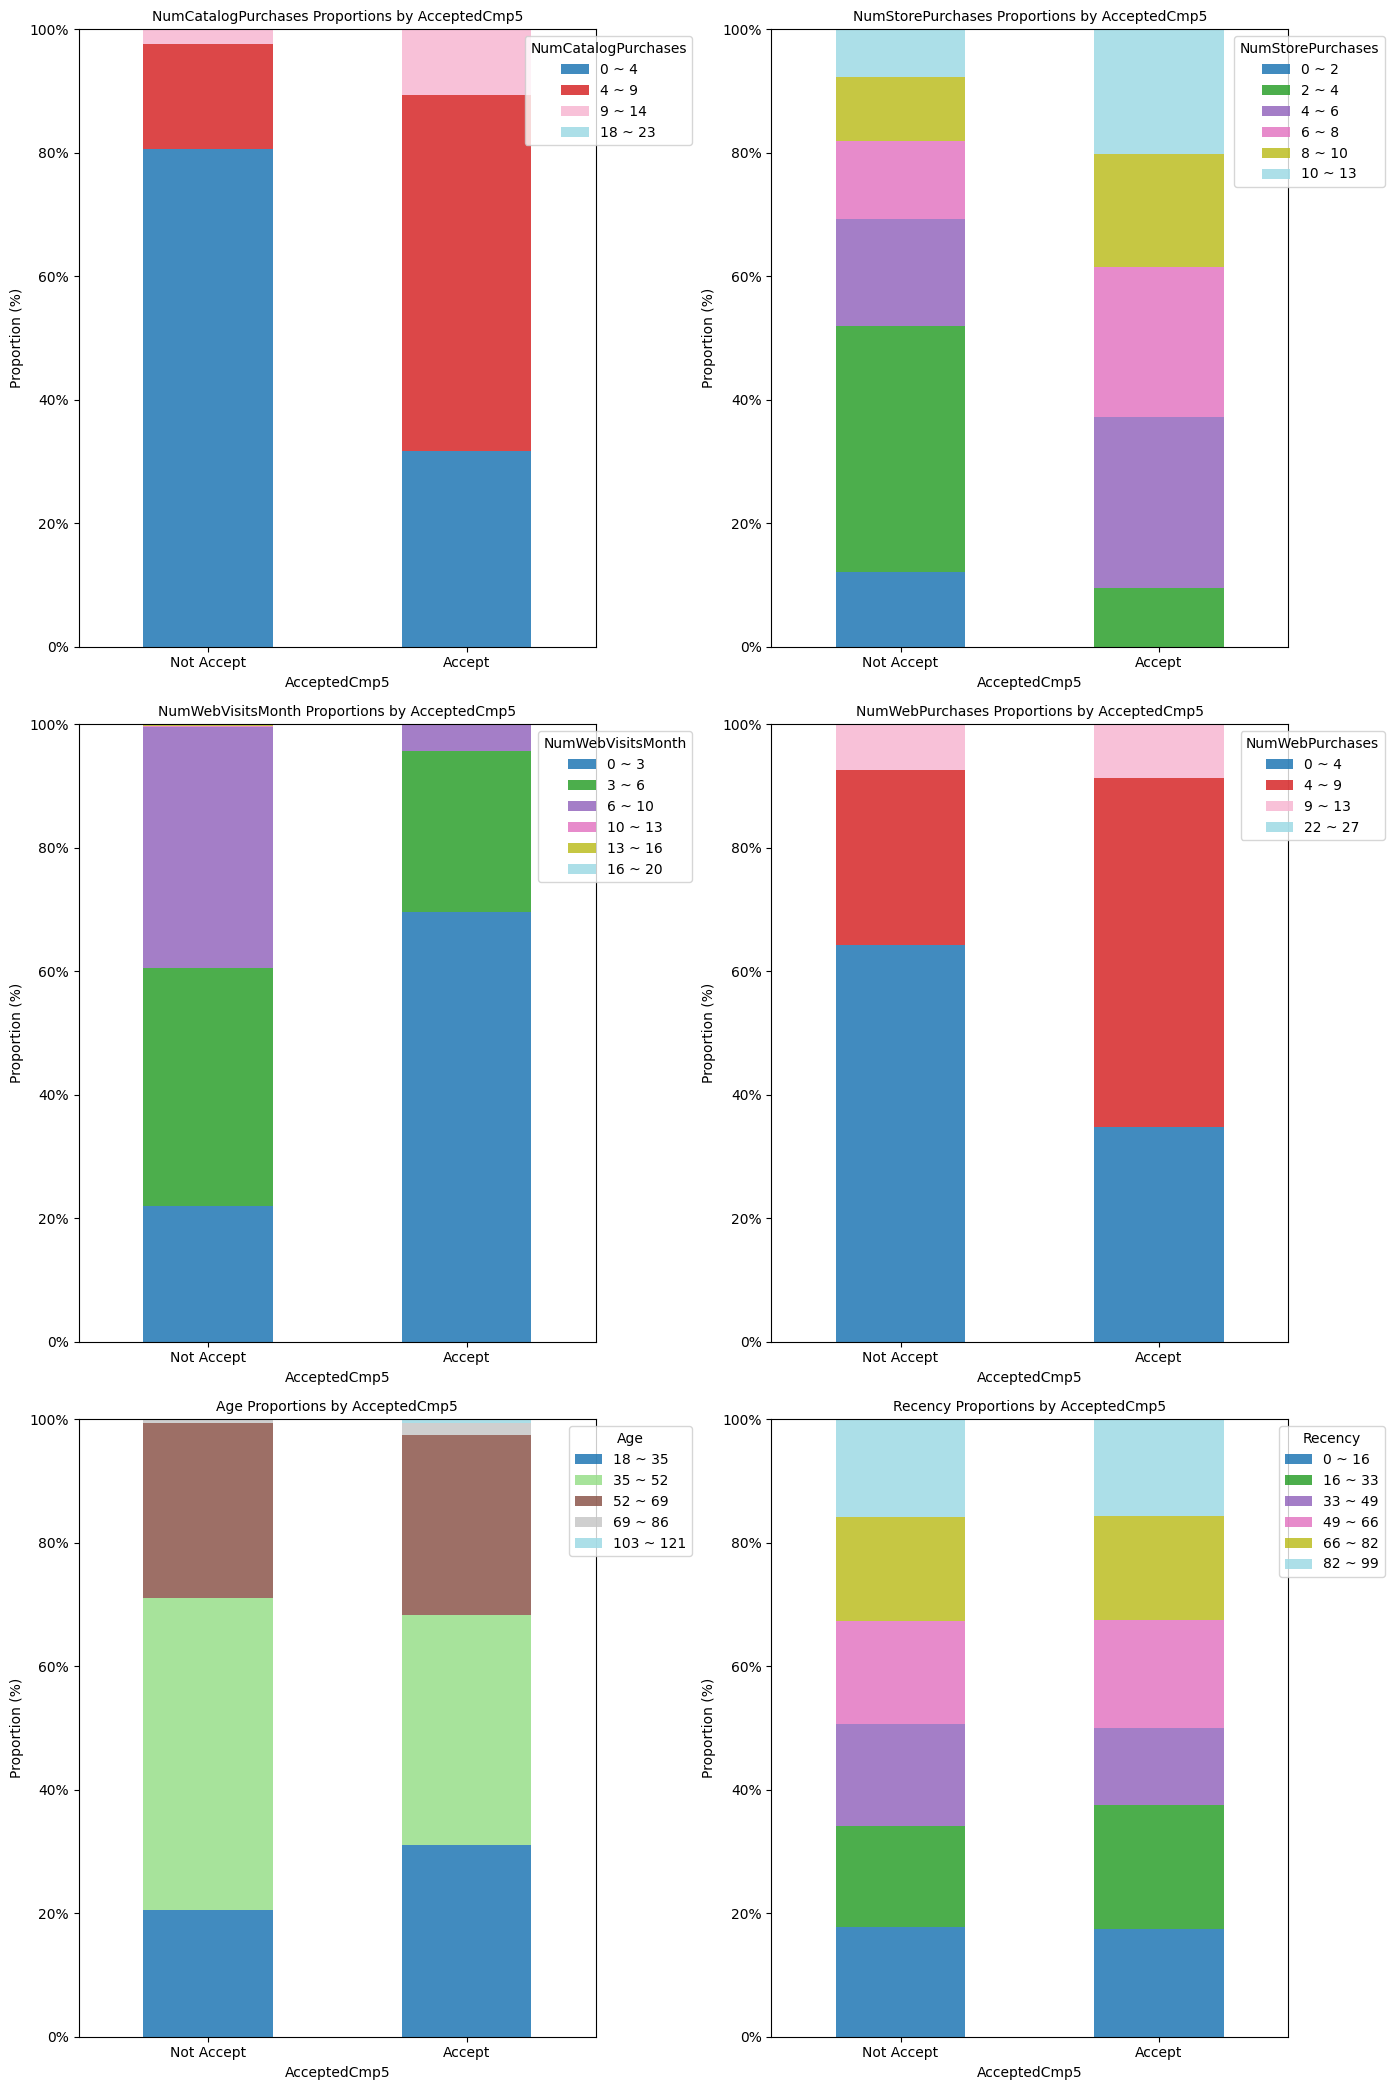

In [146]:
compare_groups_2(df2, 'AcceptedCmp5', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
               'NumWebPurchases', 'Age', 'Recency', 10)

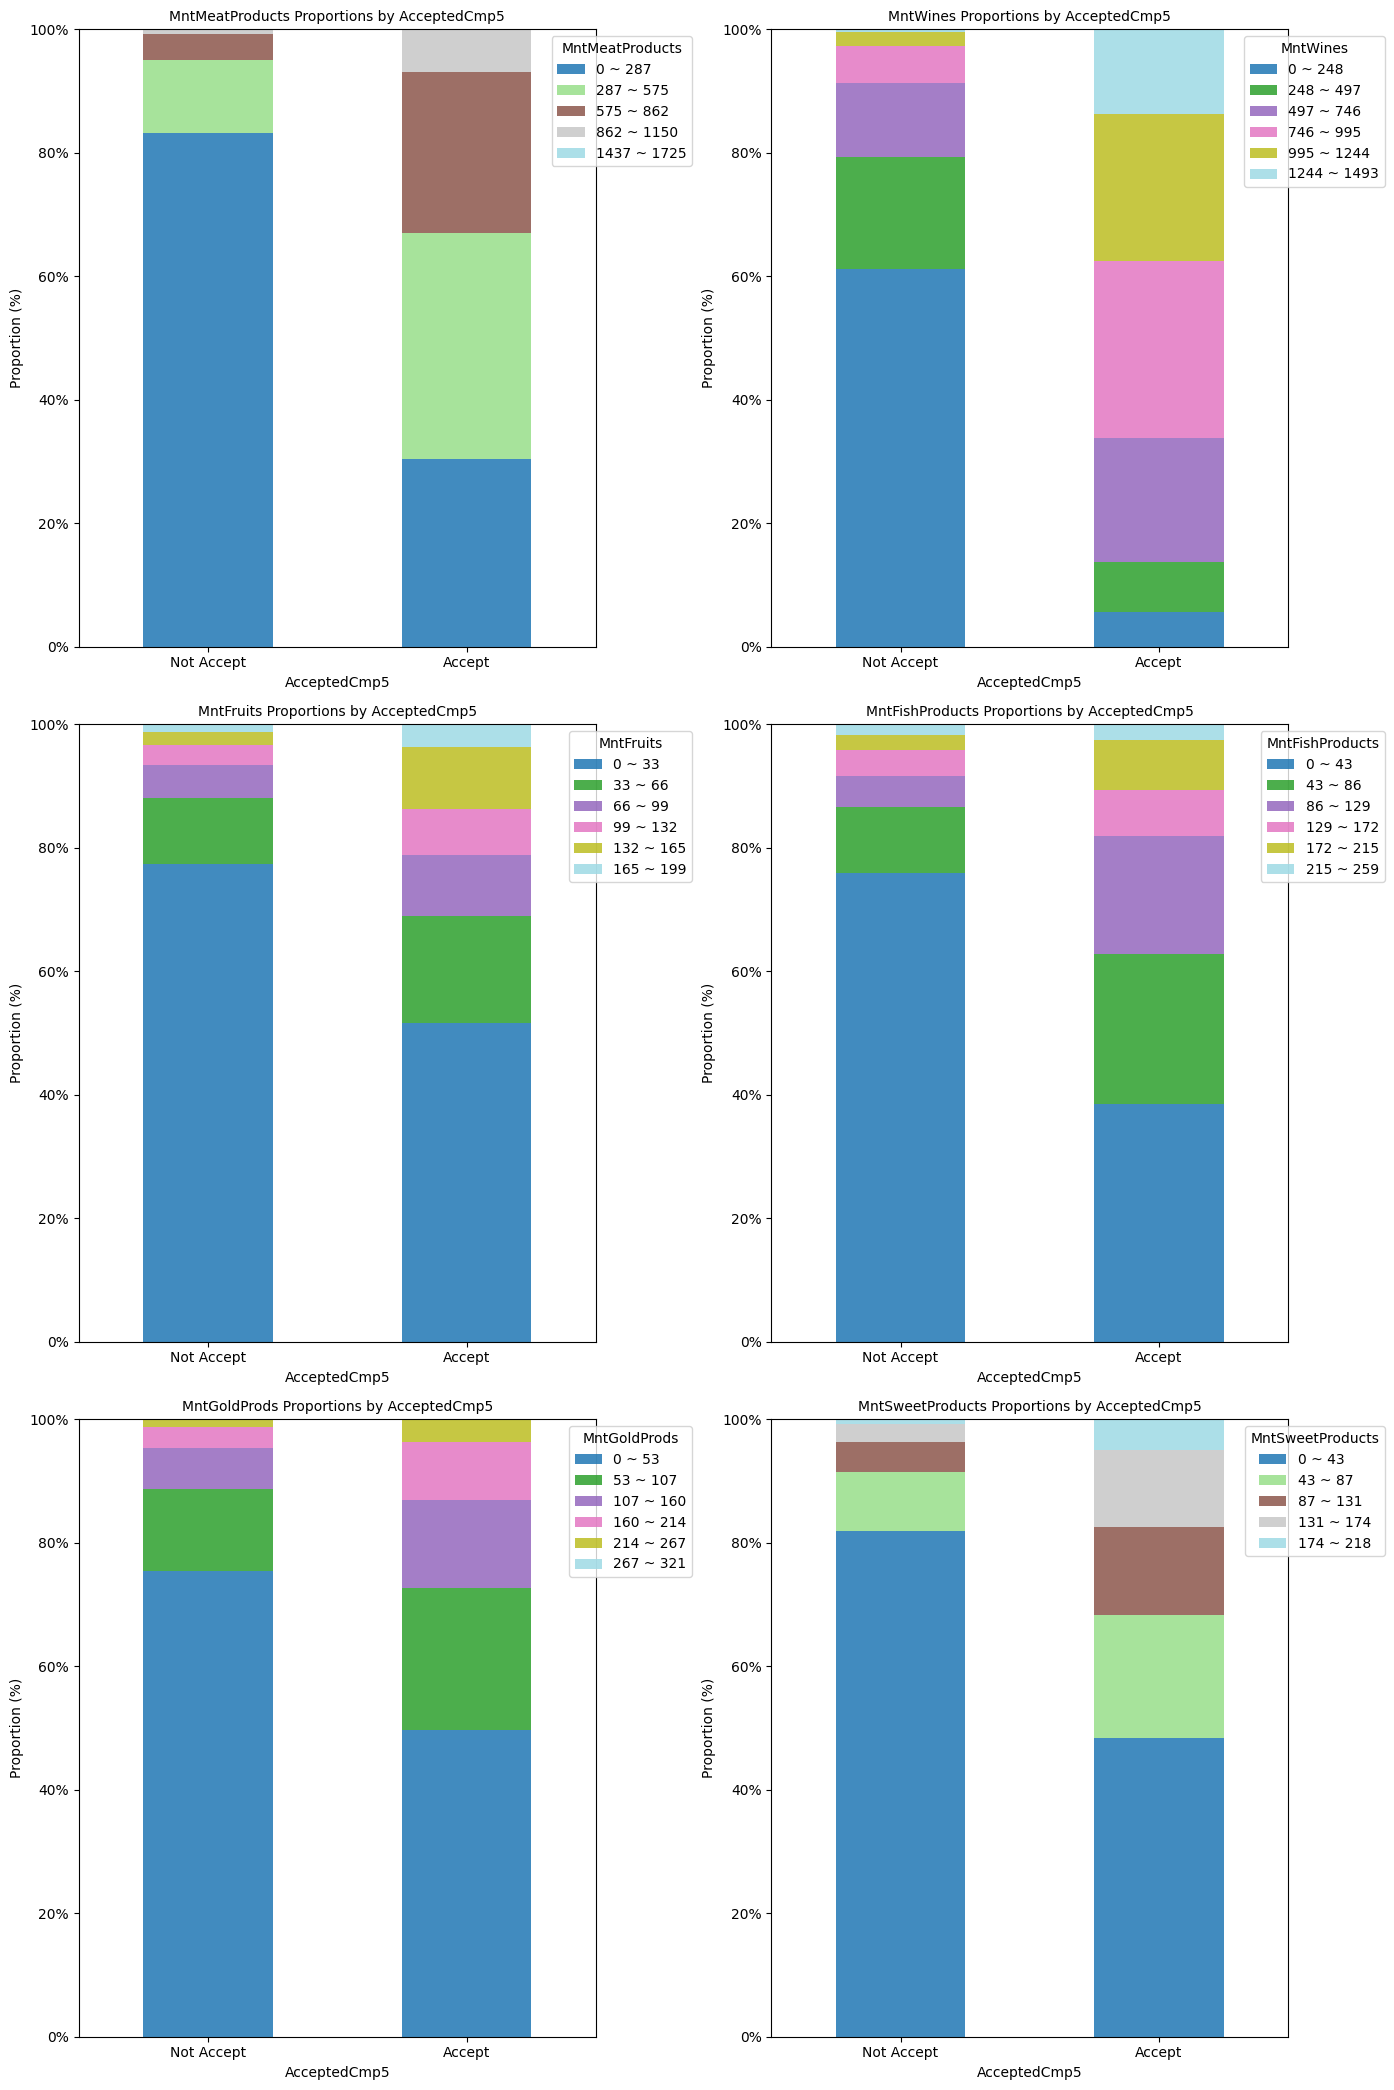

In [157]:
compare_groups_2(df2, 'AcceptedCmp5', 'MntMeatProducts', 'MntWines', 'MntFruits',\
                 'MntFishProducts', 'MntGoldProds' , 'MntSweetProducts', 10)

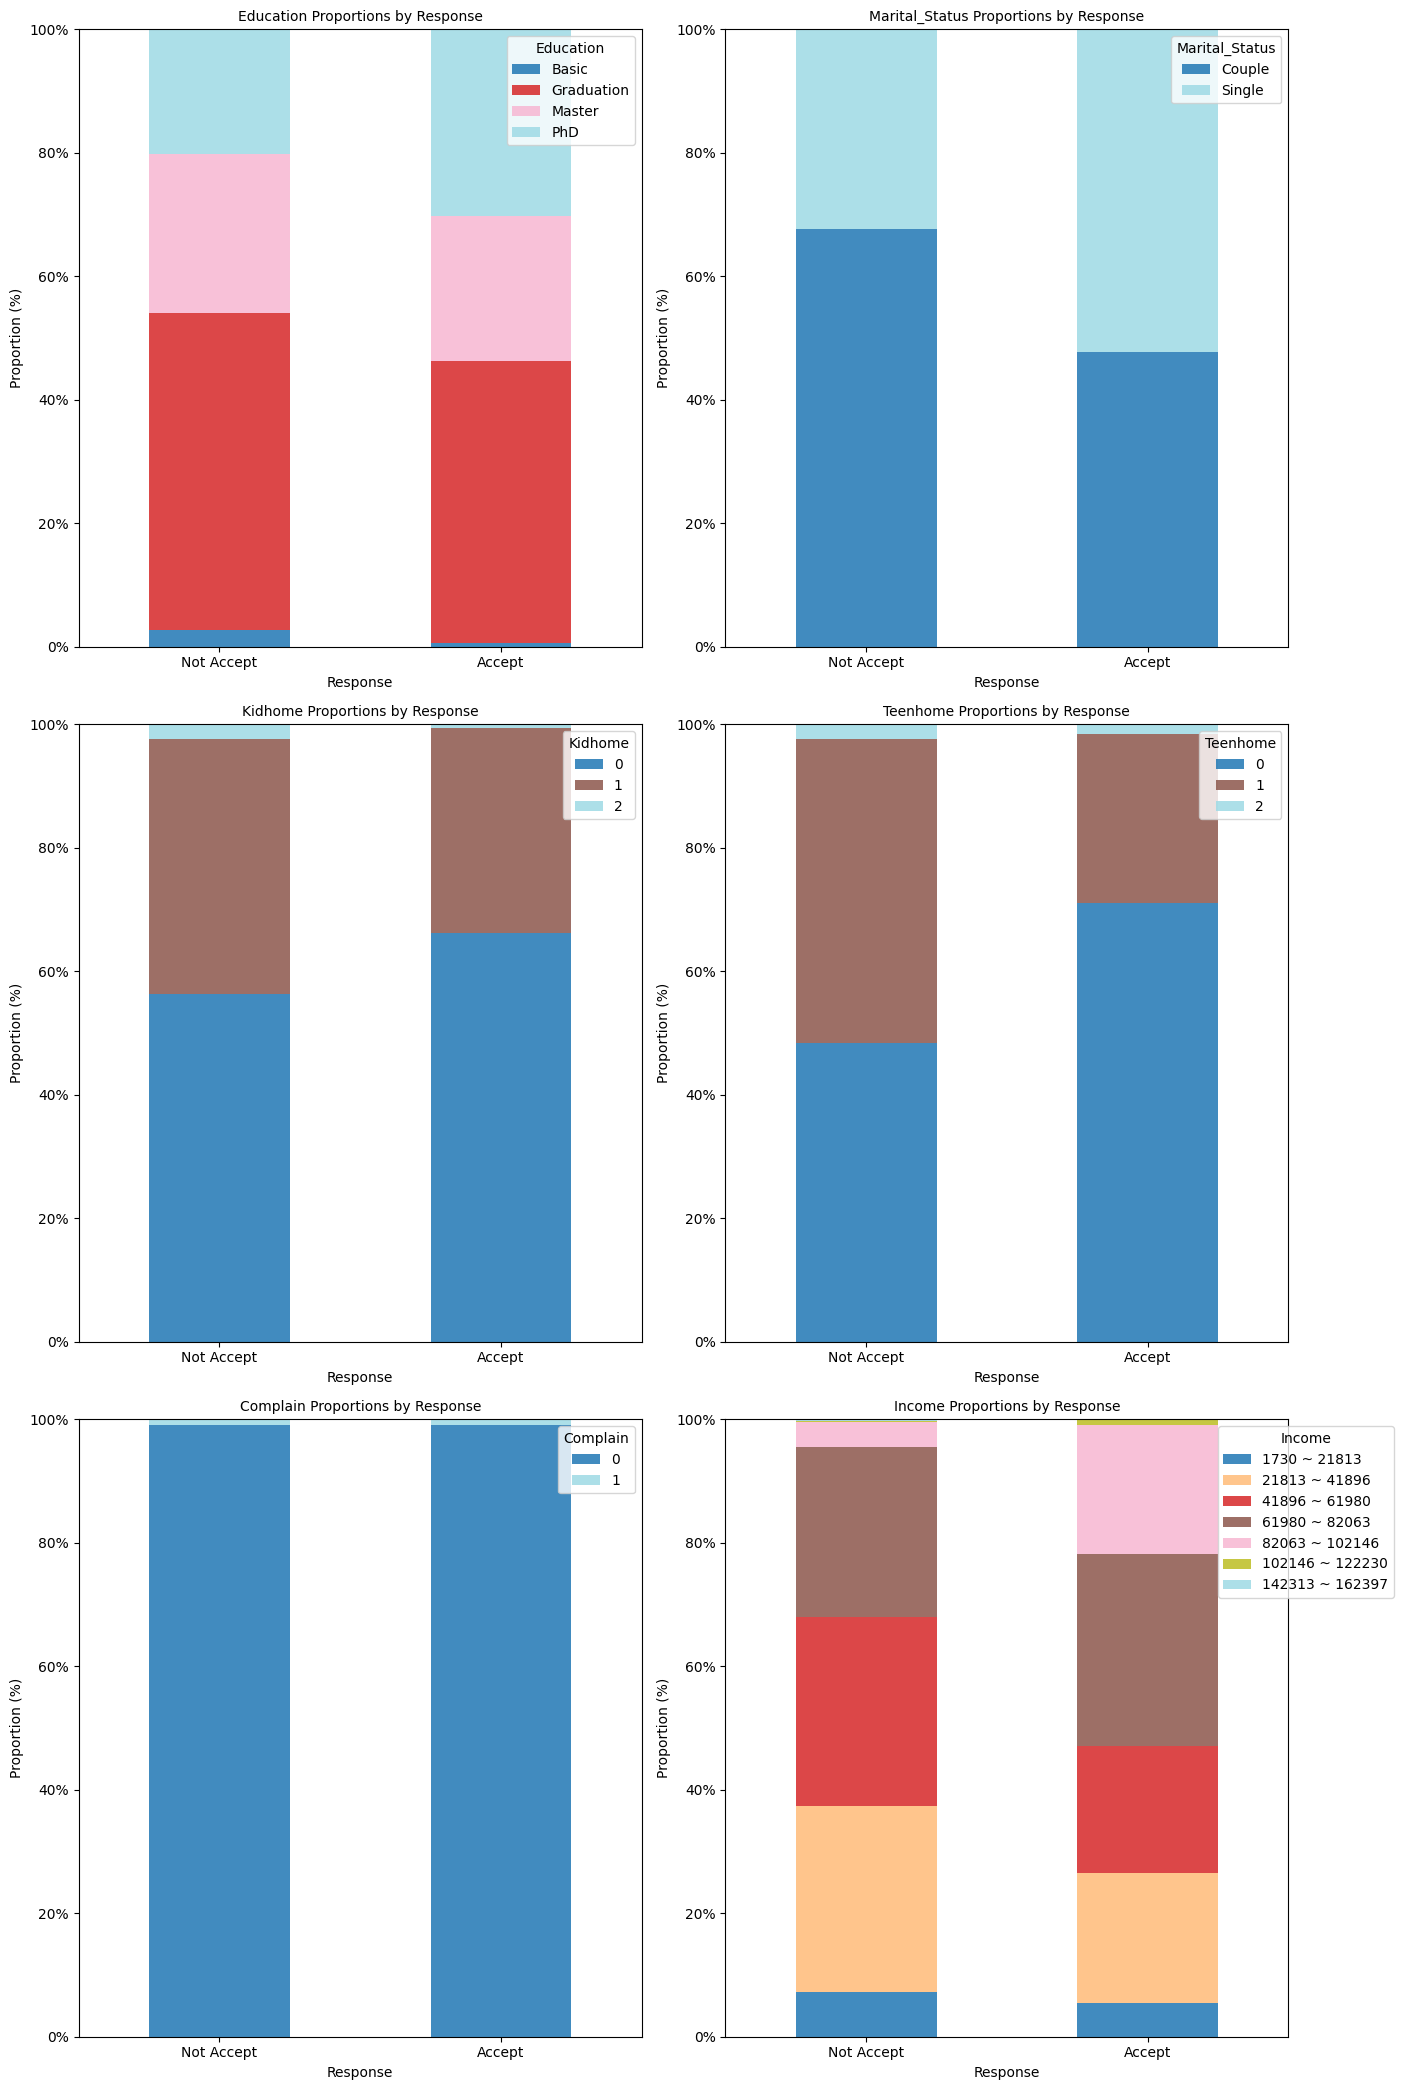

In [147]:
compare_groups_1(df2, 'Response', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',\
               'Complain', 'Income', 10)


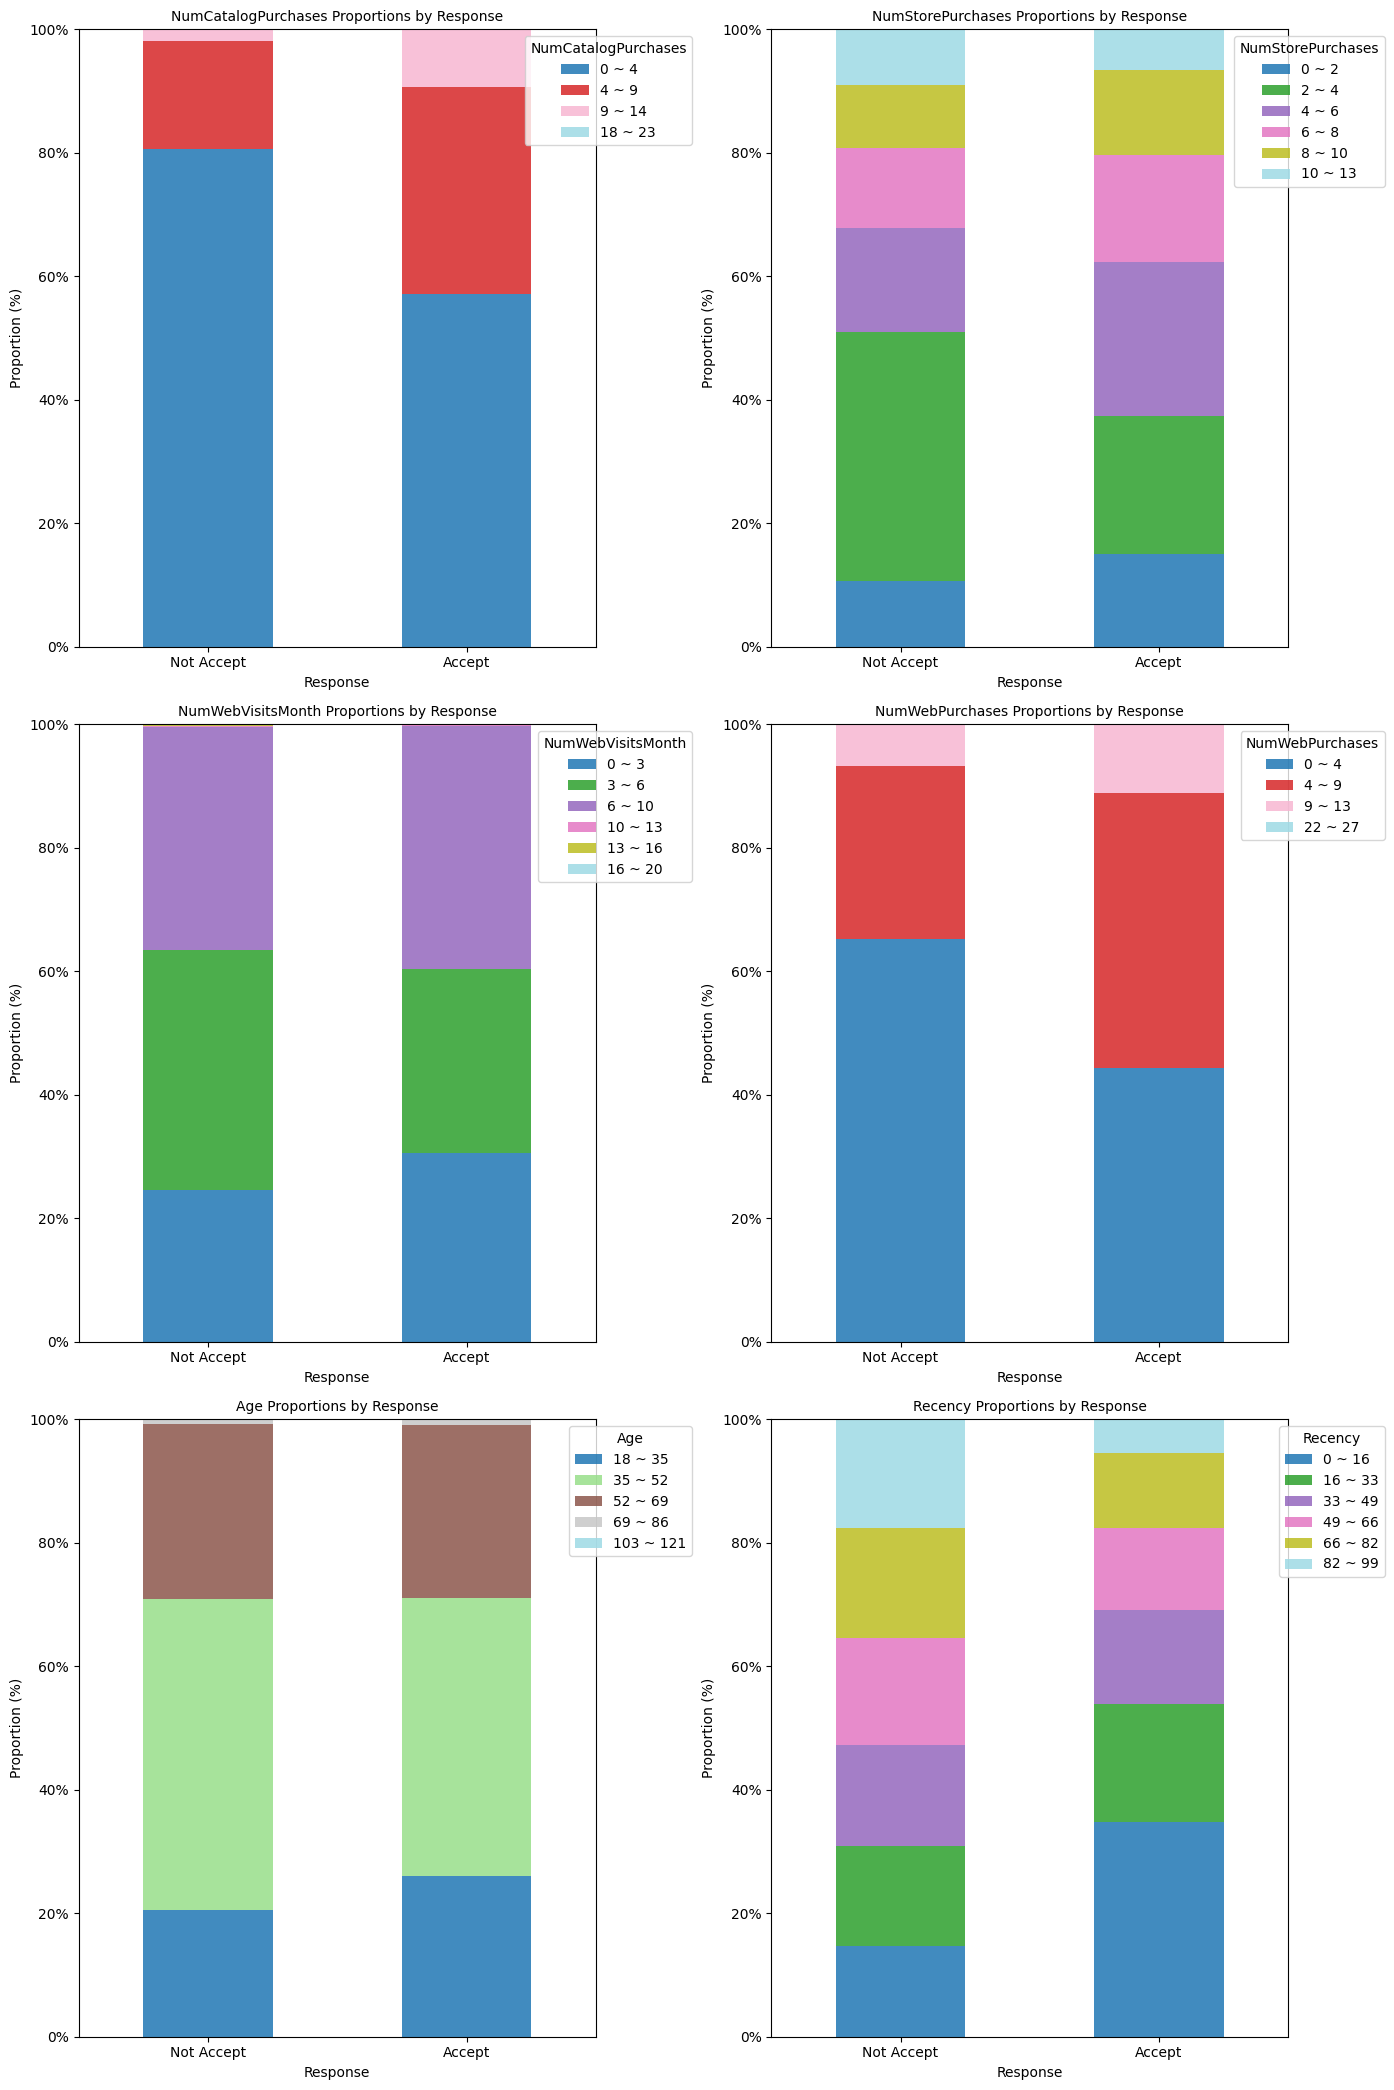

In [148]:
compare_groups_2(df2, 'Response', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
               'NumWebPurchases', 'Age', 'Recency', 10)


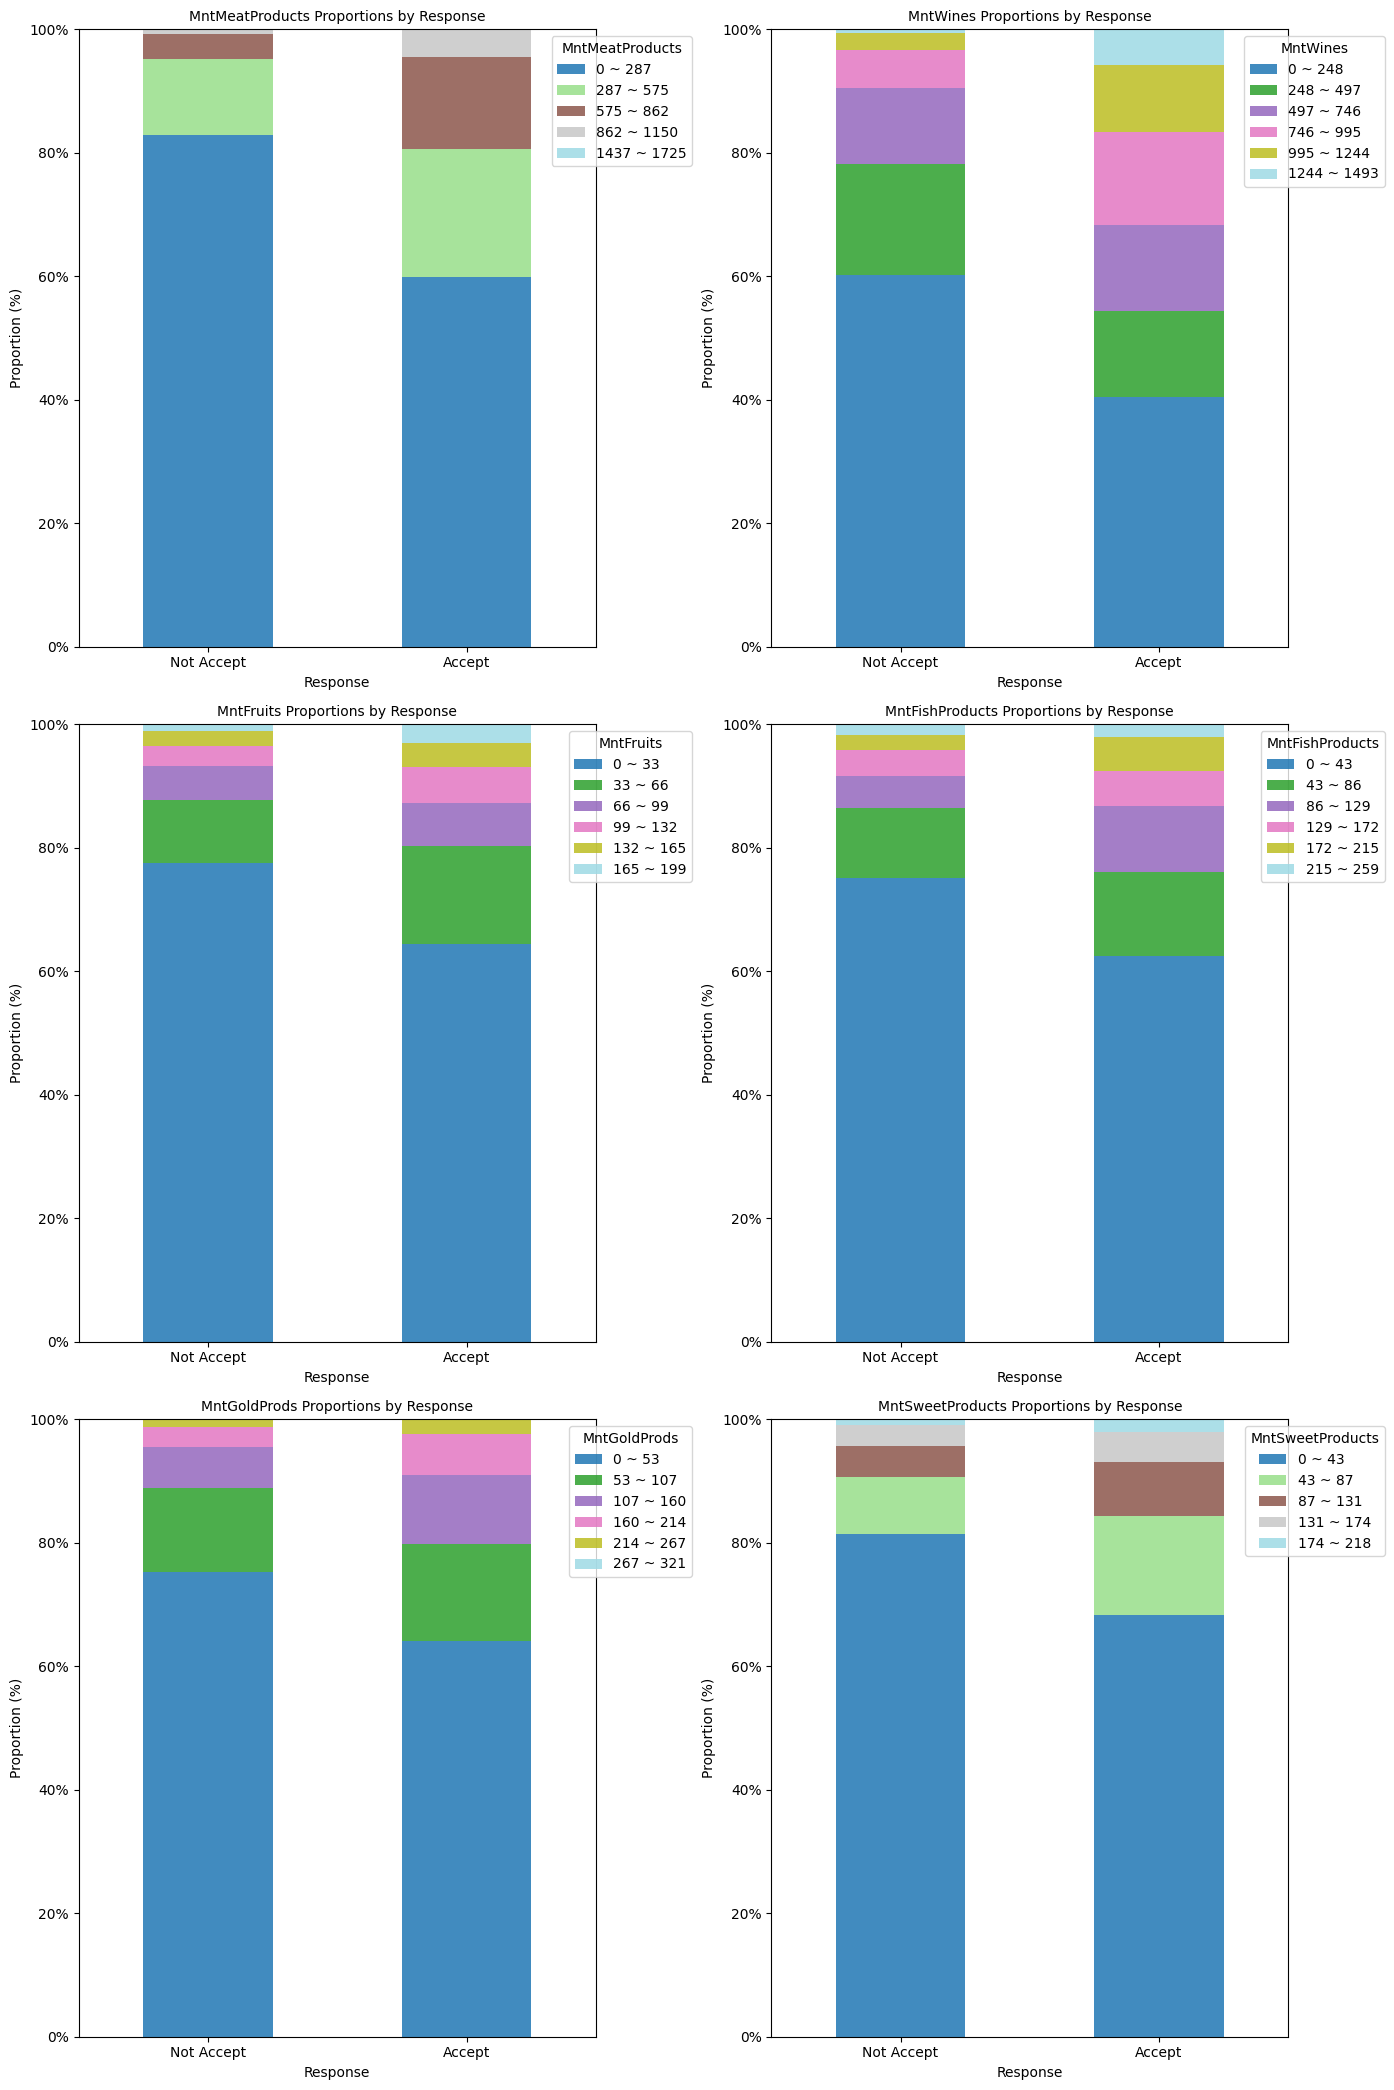

In [149]:
compare_groups_2(df2, 'Response', 'MntMeatProducts', 'MntWines', 'MntFruits',\
                 'MntFishProducts', 'MntGoldProds' , 'MntSweetProducts', 10)

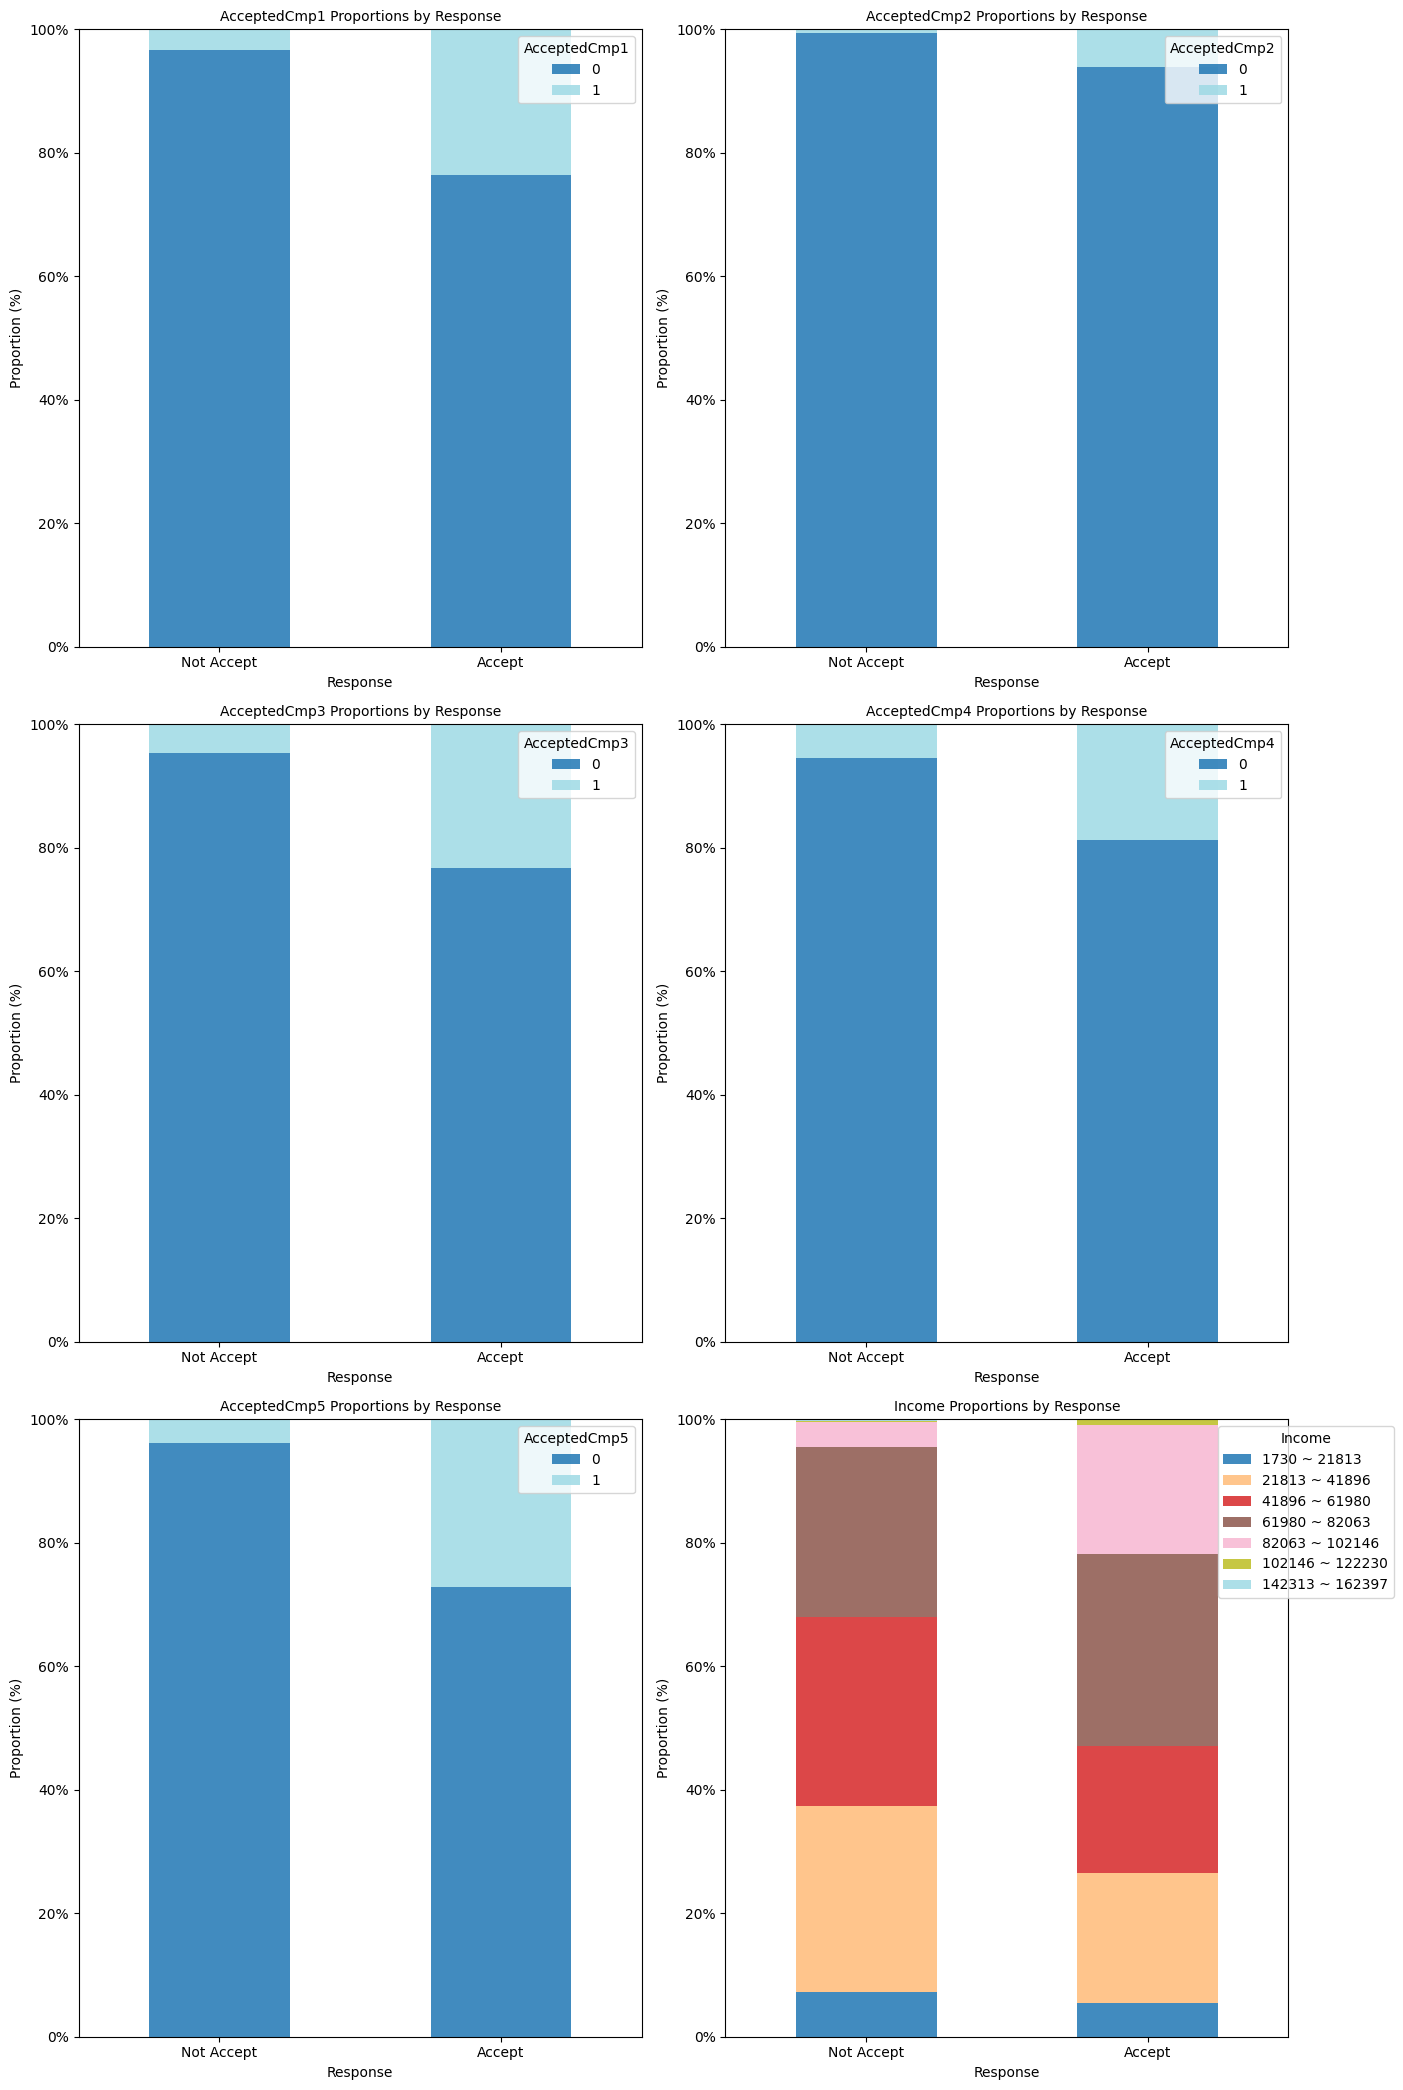

In [150]:
compare_groups_1(df2, 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',\
               'AcceptedCmp5', 'Income', 10)

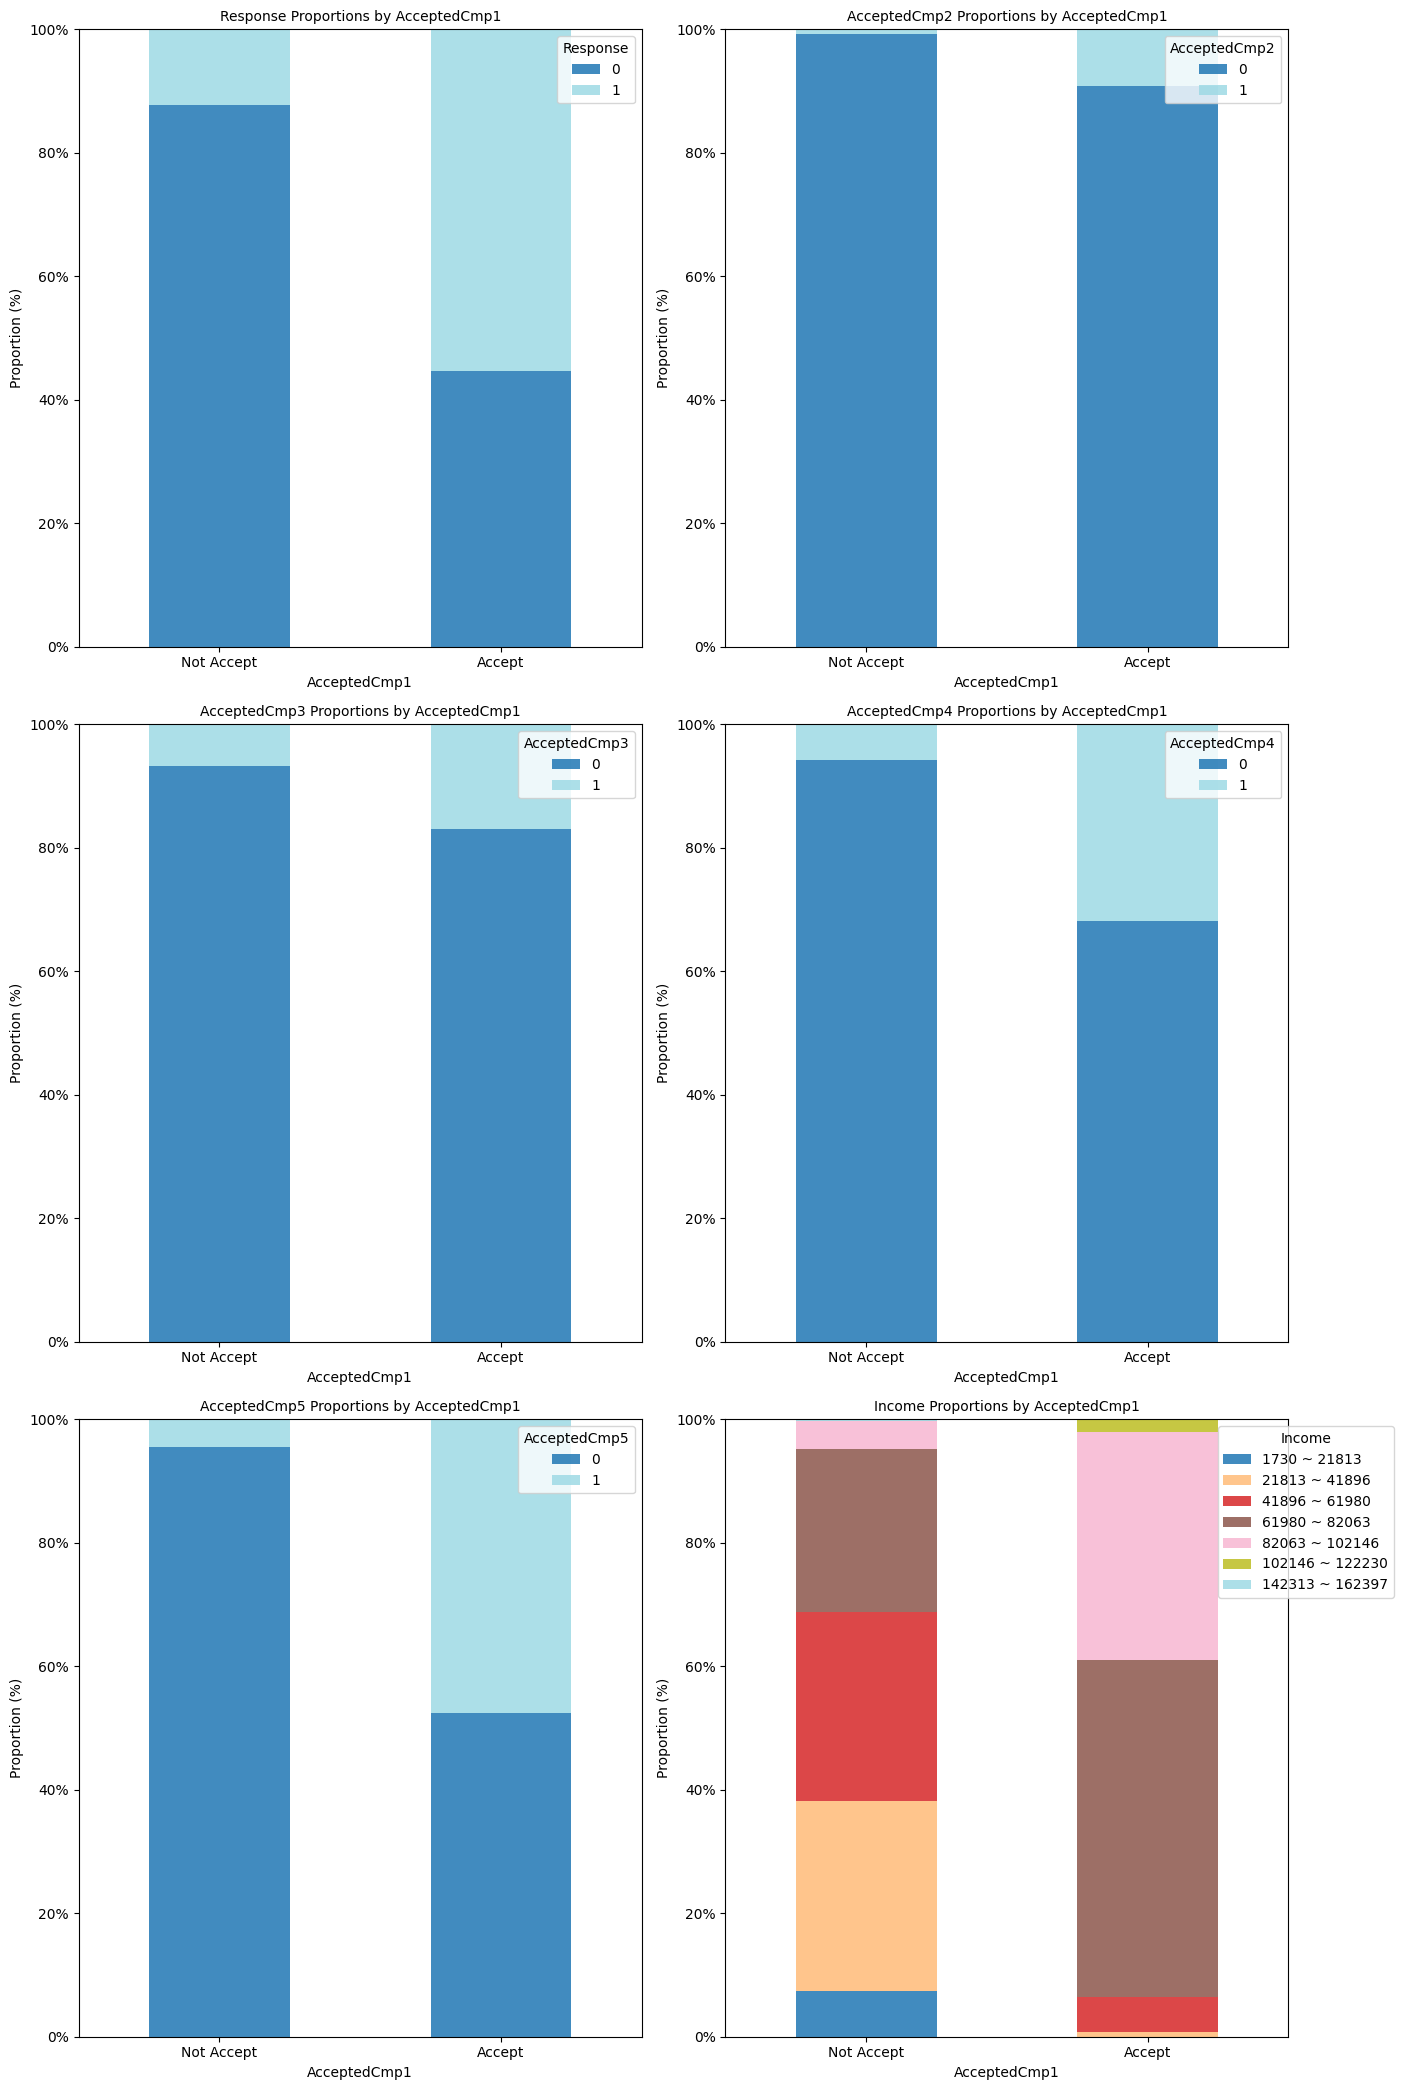

In [151]:
compare_groups_1(df2, 'AcceptedCmp1','Response',  'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',\
               'AcceptedCmp5', 'Income', 10)

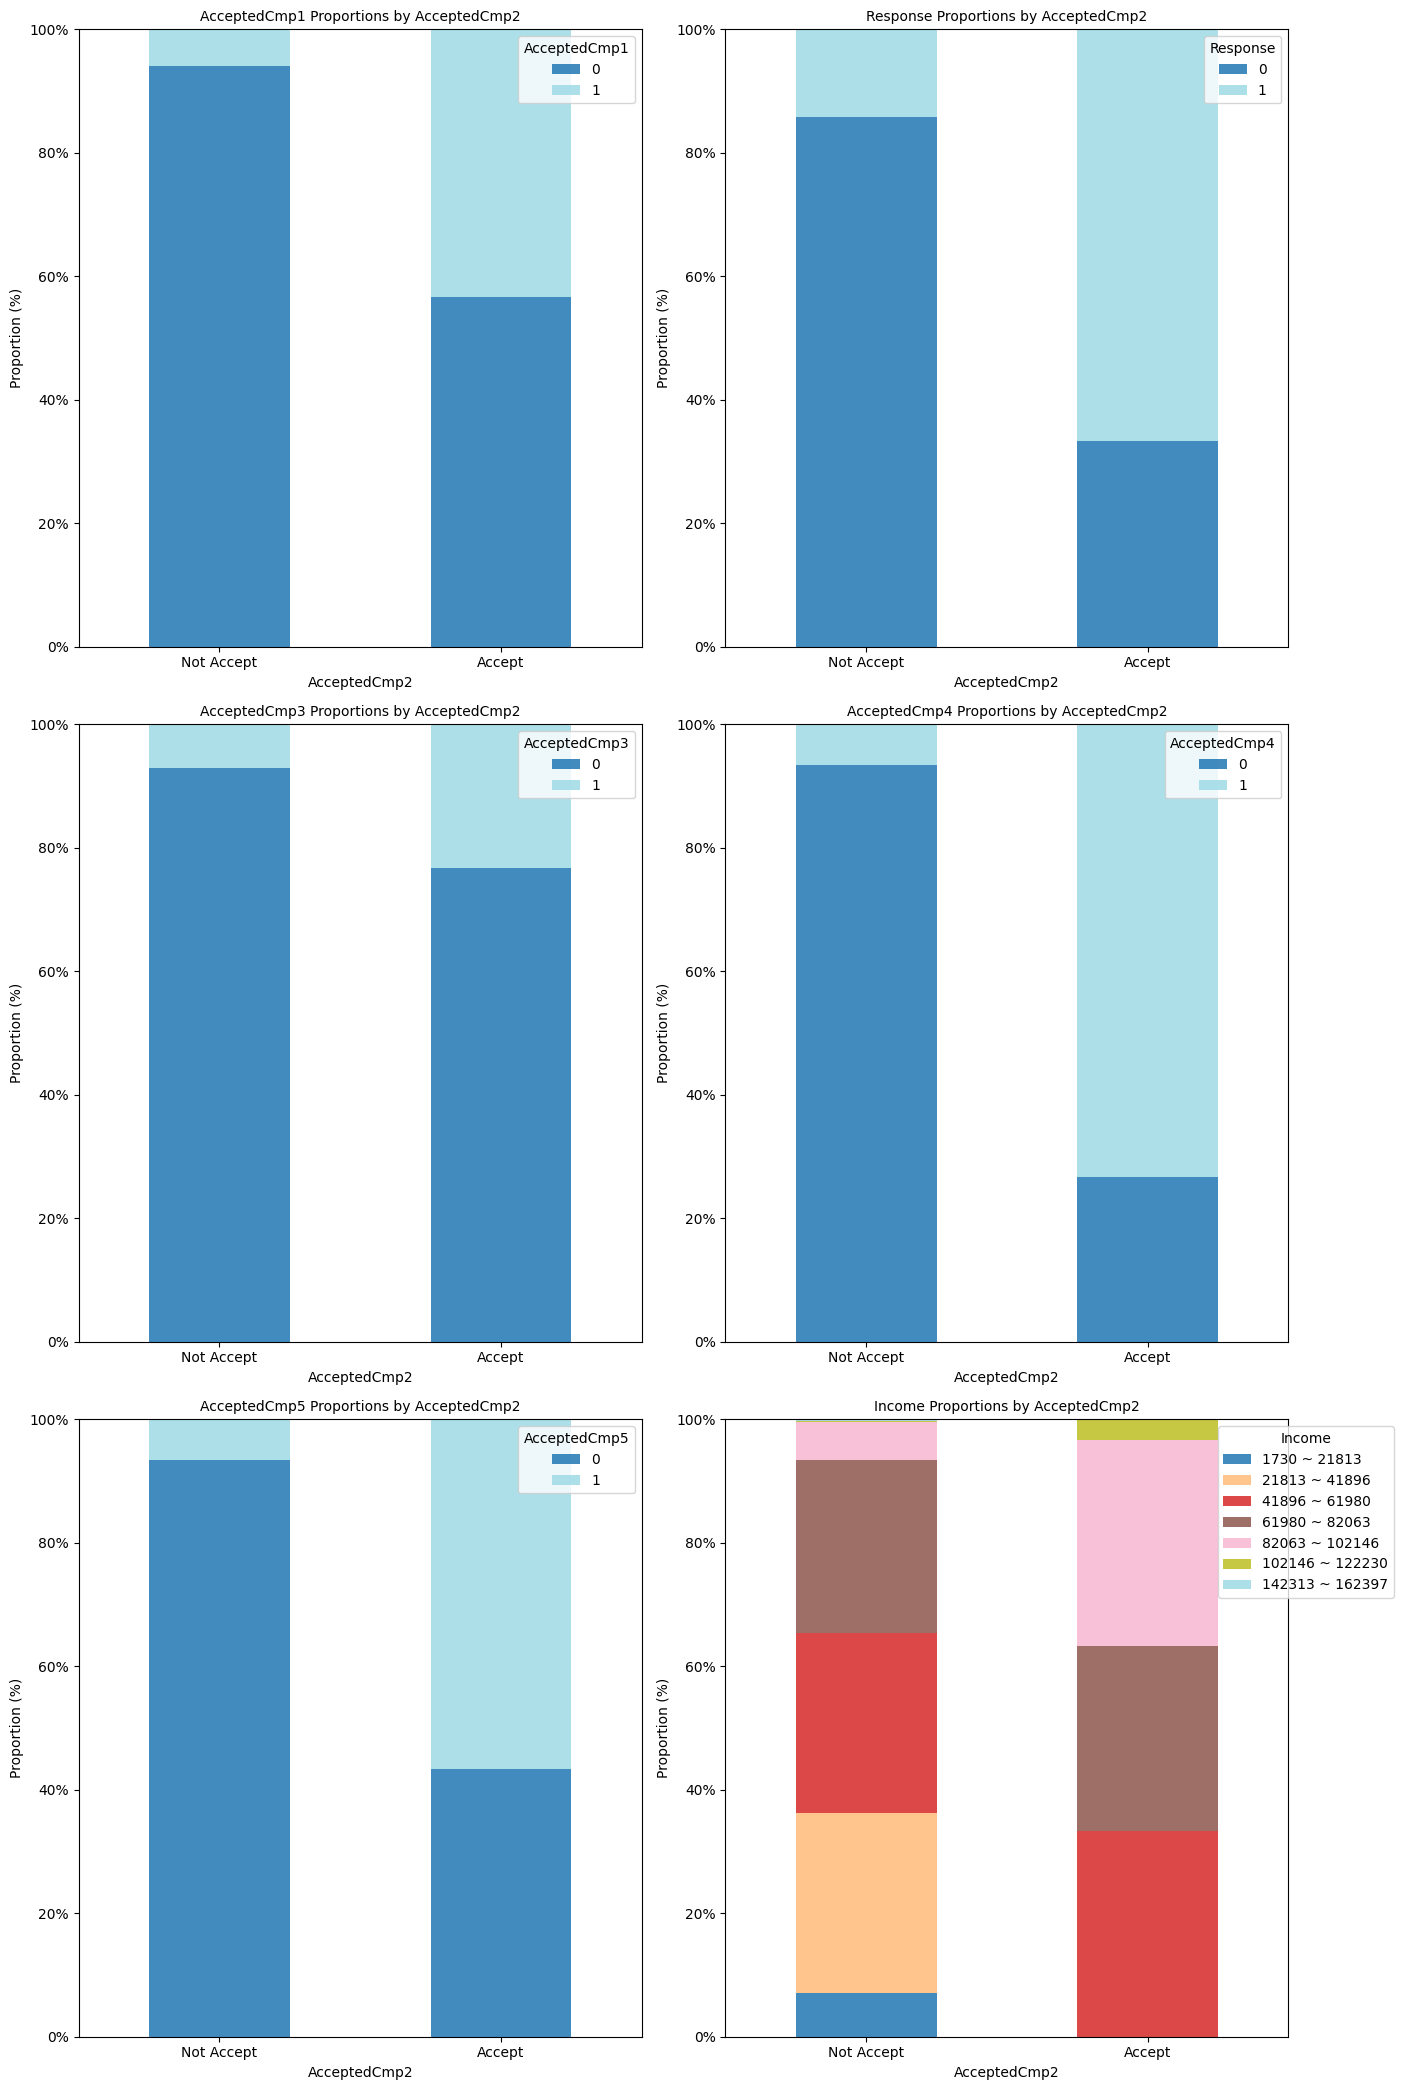

In [152]:
compare_groups_1(df2, 'AcceptedCmp2', 'AcceptedCmp1','Response',   'AcceptedCmp3', 'AcceptedCmp4',\
               'AcceptedCmp5', 'Income', 10)

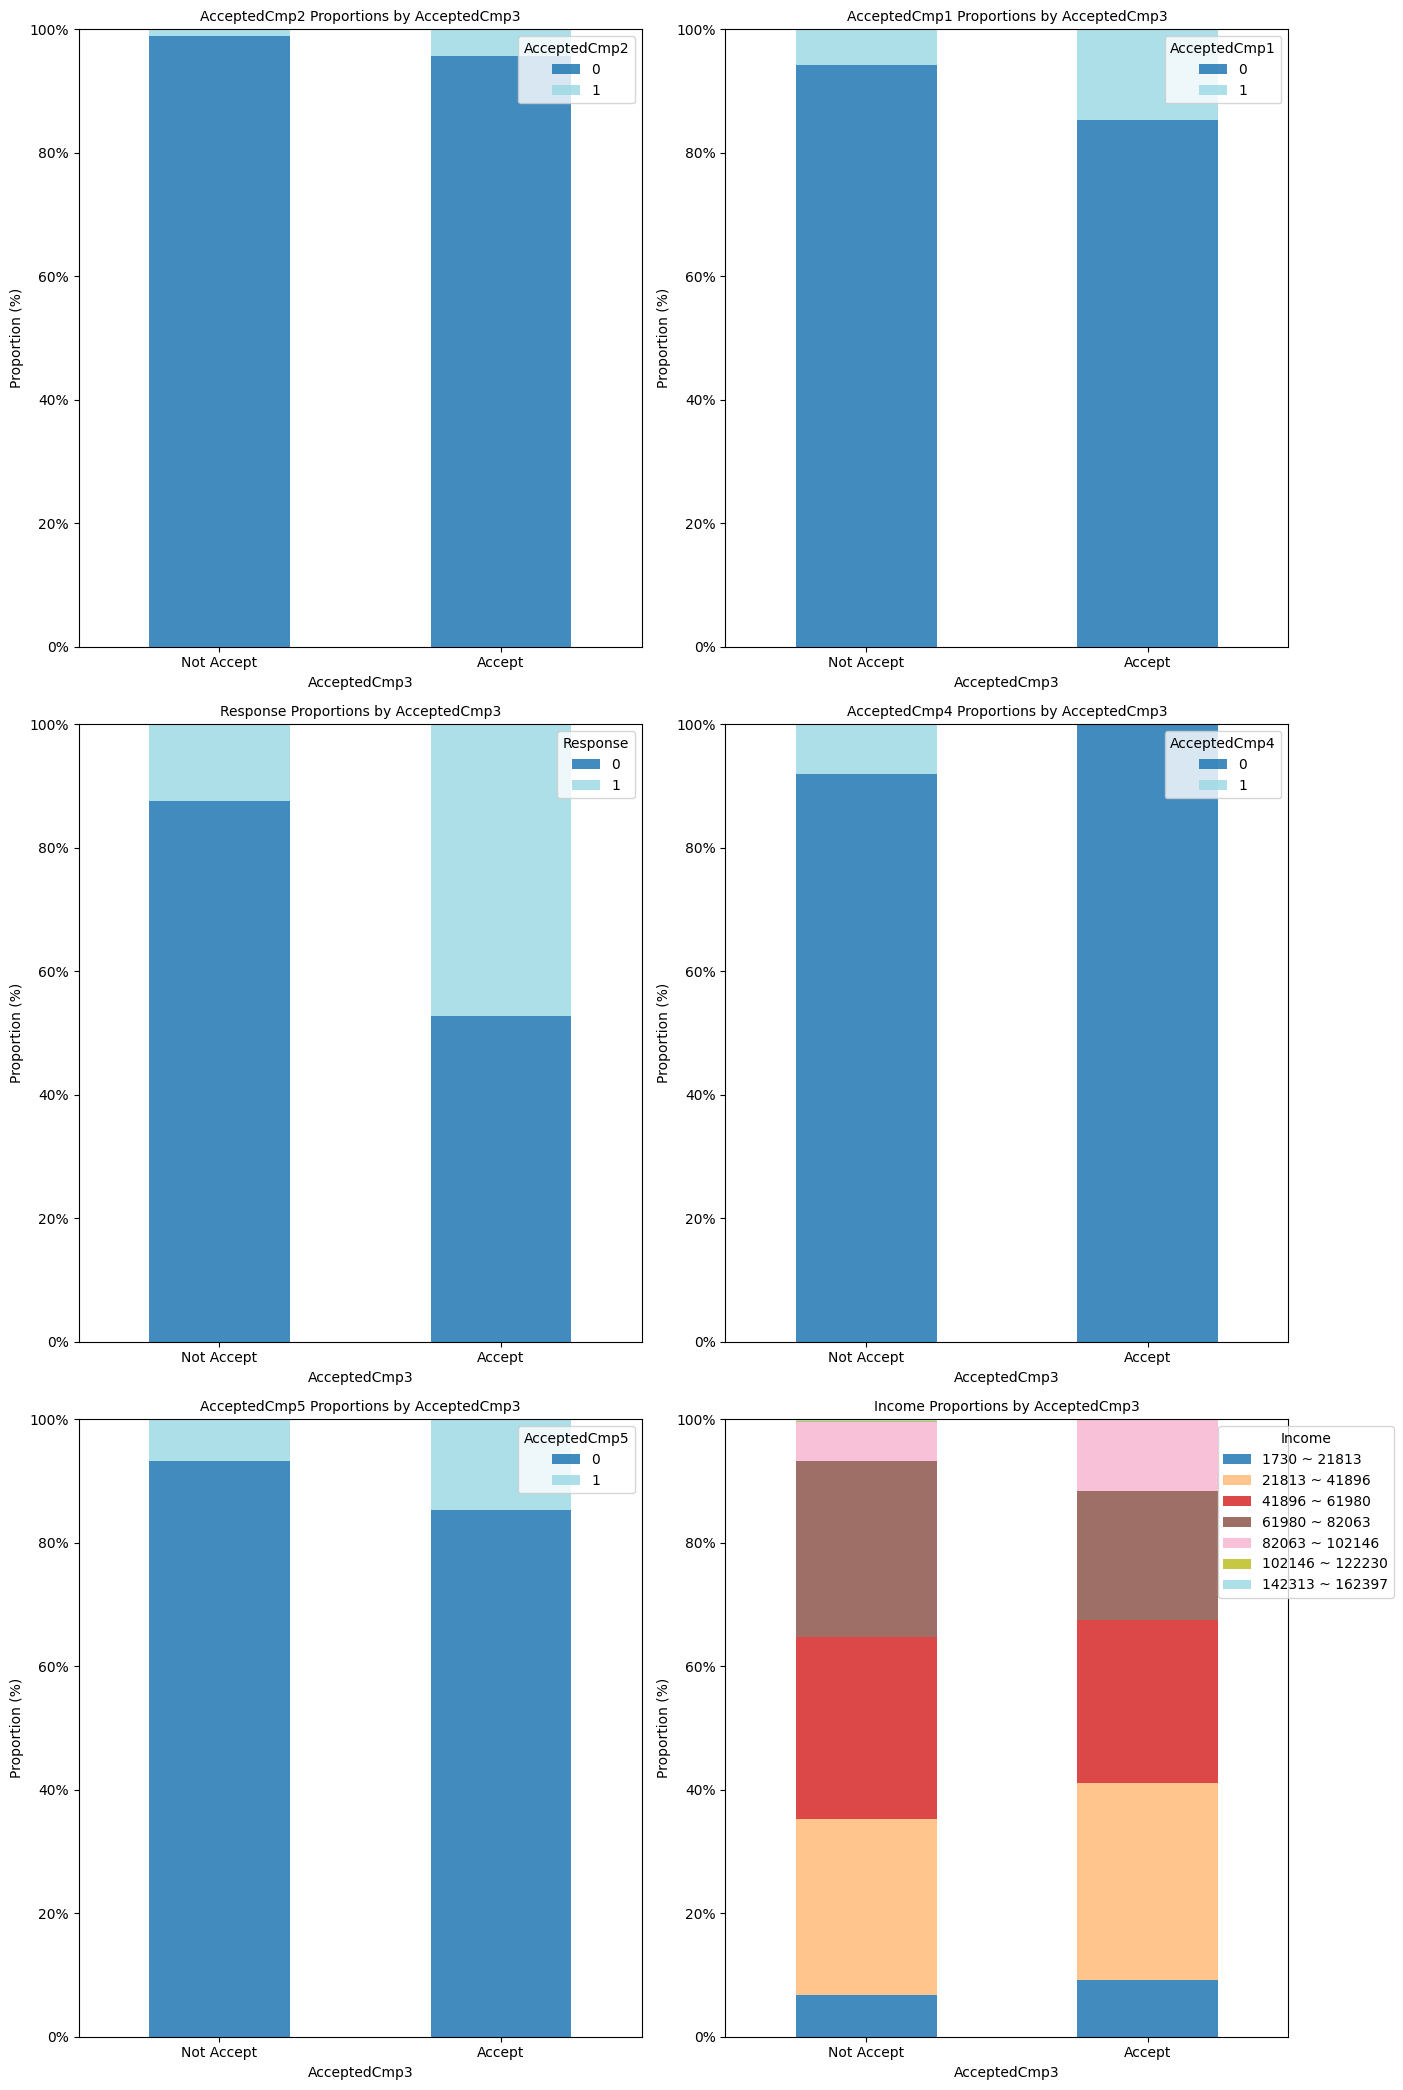

In [154]:
compare_groups_1(df2,  'AcceptedCmp3','AcceptedCmp2', 'AcceptedCmp1','Response',   'AcceptedCmp4',\
               'AcceptedCmp5', 'Income', 10)

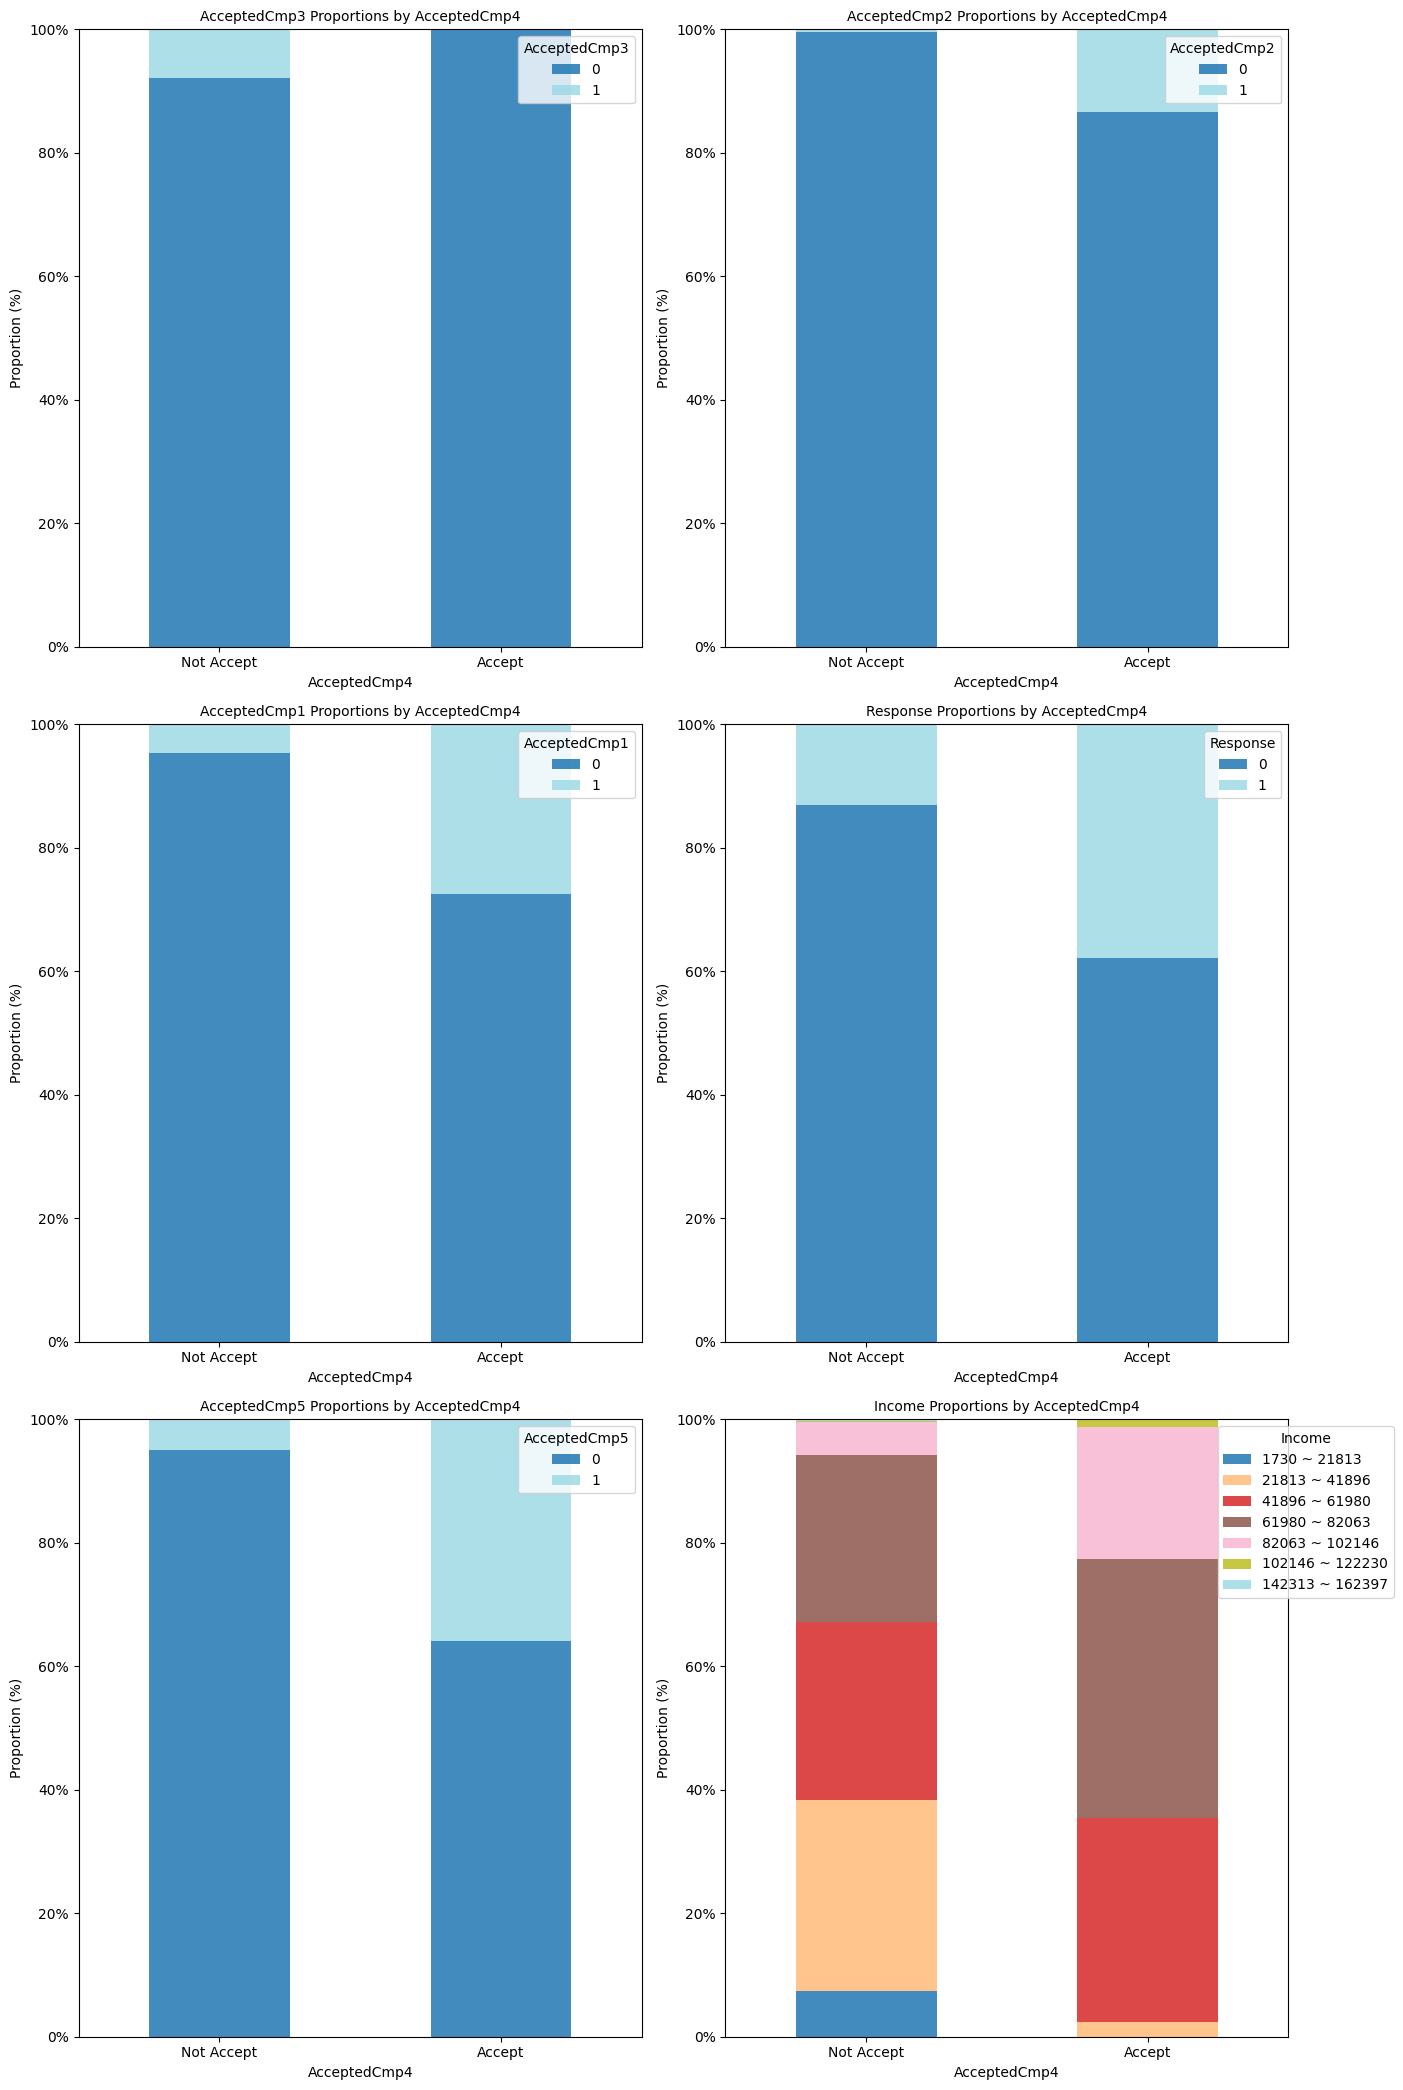

In [155]:
compare_groups_1(df2, 'AcceptedCmp4', 'AcceptedCmp3','AcceptedCmp2', 'AcceptedCmp1','Response',   \
               'AcceptedCmp5', 'Income', 10)

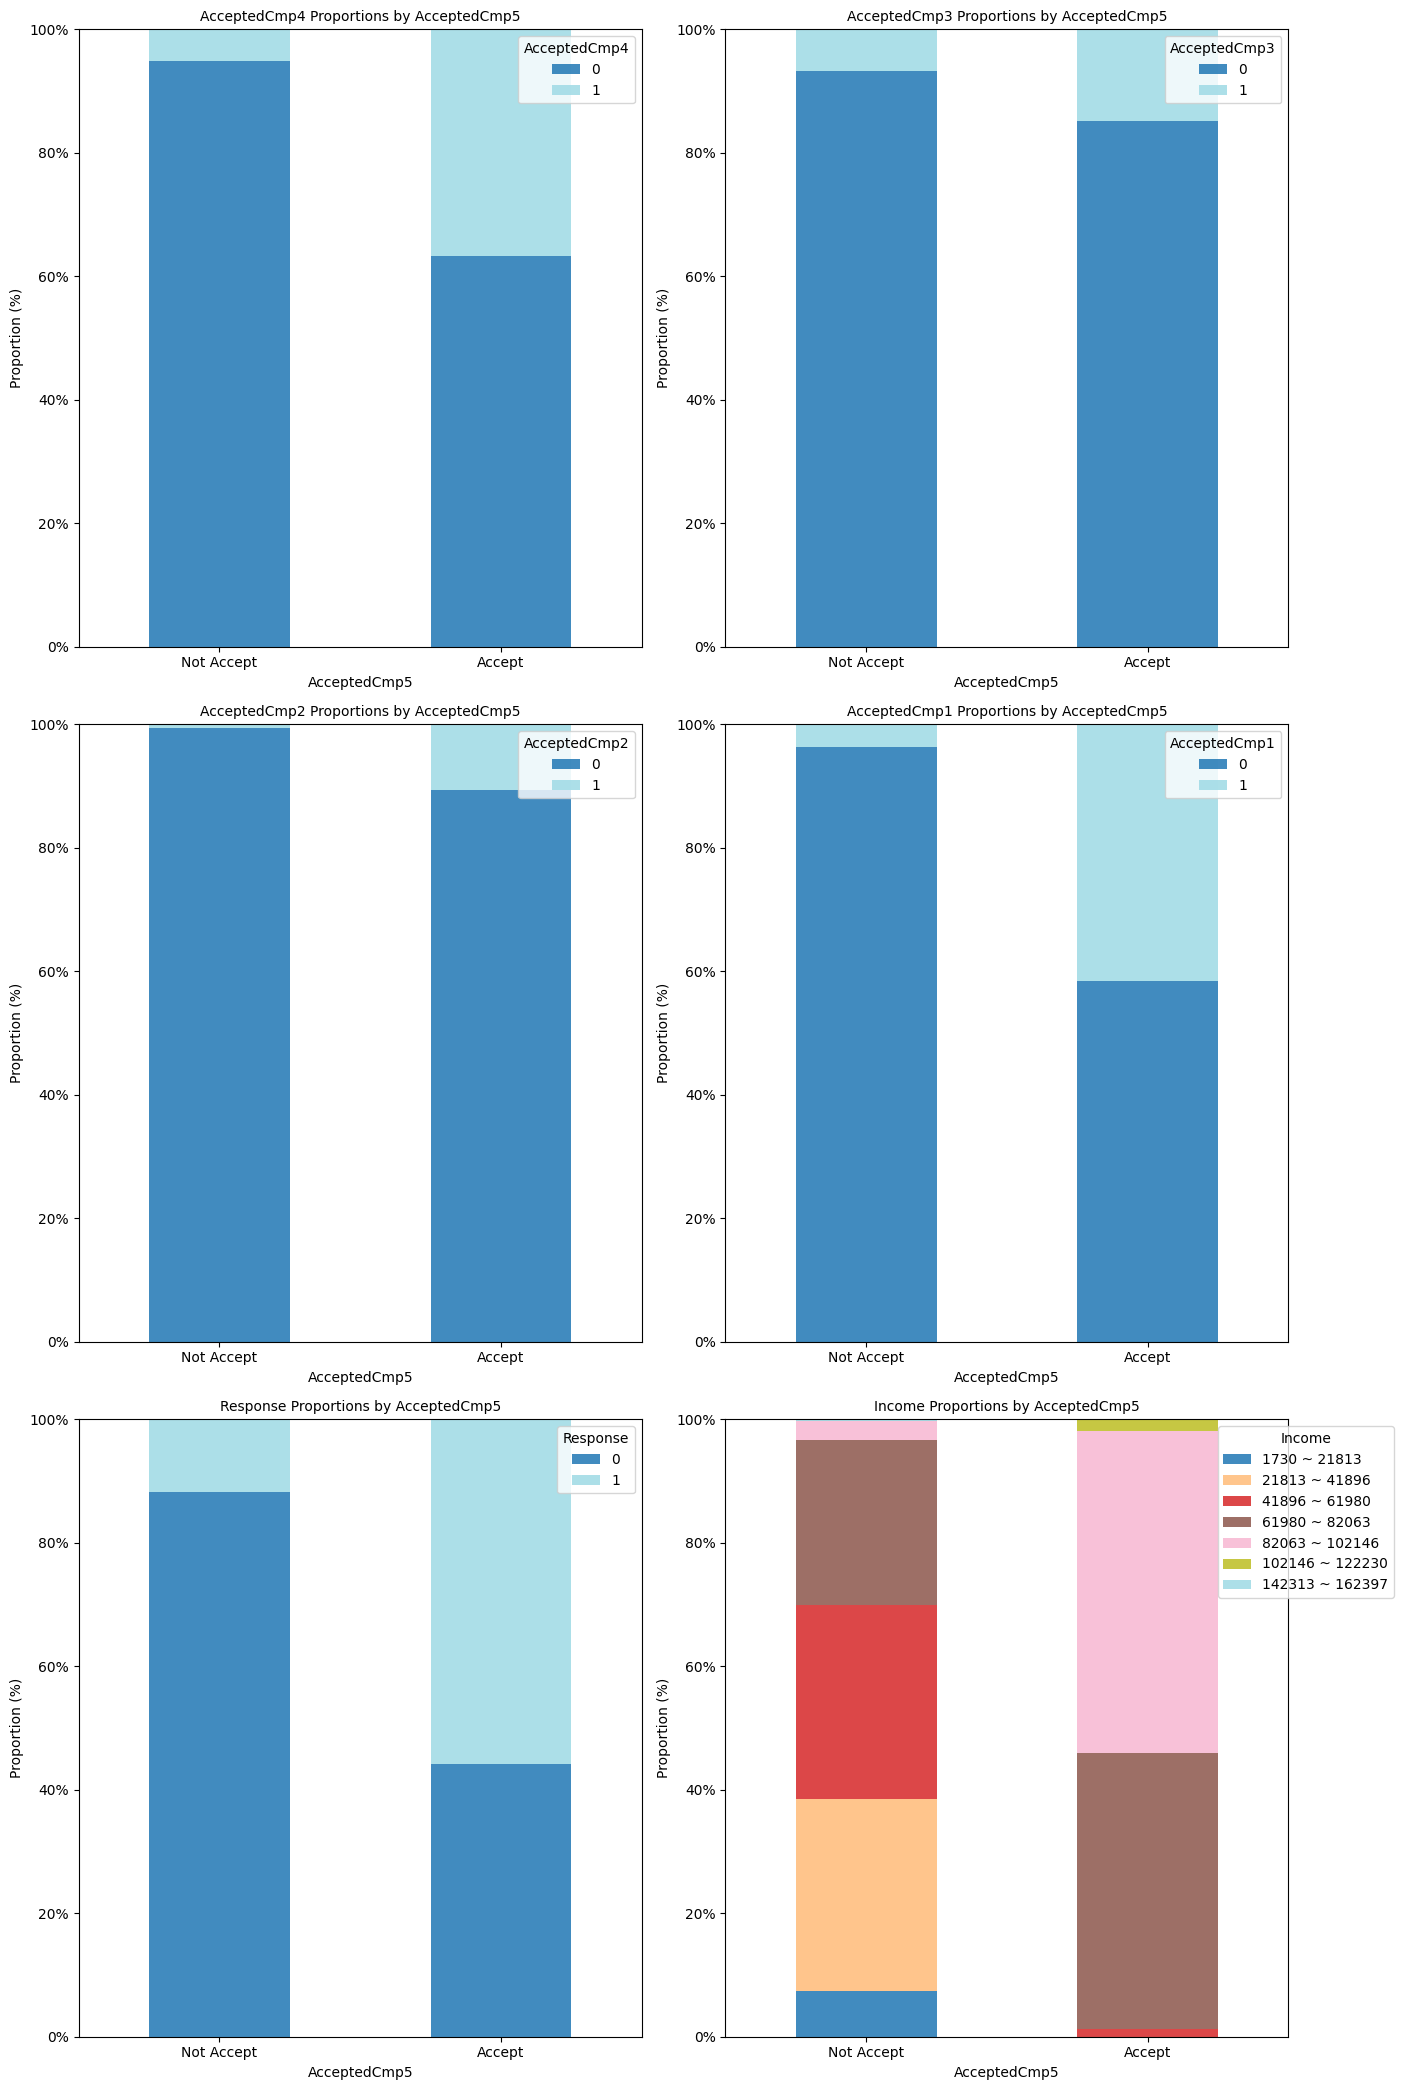

In [156]:
compare_groups_1(df2, 'AcceptedCmp5','AcceptedCmp4', 'AcceptedCmp3','AcceptedCmp2', 'AcceptedCmp1','Response',   \
                'Income', 10)